# 2021 빅데이터 통신 플랫폼 경진대회

# 상권분석? 입지분석? 아니, 배달분석!

- 포스트 코로나 시대의 자영업자들을 위한 창업 가이드
- 코로나를 겪은 뒤 대한민국의 음식, 배달 문화는 변화했다.
- 즉, 이제는 상권분석, 입지분석이 아닌 배달분석이 필수적이다!
- 배달 분석을 통해 포스트 코로나 시대의 자영업자들을 위한 창업 가이드를 만들어보자.

# BUSINESS_UNDERSTANDING

**[주제]**

**코로나 시대와 함께하는 국민의 음식, 배달 문화 변화에 대한 시각화 처리**

**[배경]**

2019년부터 3년간 약 1,500억원의 정부 예산이 투입되어 통신, 유통 등 10개 플랫폼과 100여개의 센터가 연계된 "빅데이터 플랫폼 및 센터 구축" 사업이 진행 중에 있습니다.
본 대회는 통신 분야 플랫폼으로 선정된 KT와 충북대 주최로 통신 빅데이터 플랫폼(https://www.bigdata-telecom.kr) 내 데이터를 활용하여 포스트 코로나 시대 유의미한 인사이트 도출과 빅데이터 기반의 생태계 활성화를 목적으로 합니다.

**[대회 설명]**

빅데이터를 통해 **코로나 시대 의미 있는 인사이트** 도출<br>
빅데이터 분석 생태계 활성화 및 아이디어 발굴

**[주최 / 주관]**

주최 : 충북대학교, KT 통신 빅데이터 플랫폼<br>
주관 : 충북대학교, 데이콘

|평가기준|항목|상세|배점|
|---|---|---|---|
|Insight|인사이트 도출|**국민들의 포스트 코로나 시대 준비에 도움이 되는가**|35|
| |논리의 명확성|데이터로 적절하게 설명되는가|25|
|Visualiztion|가독성|디자인이 정보 전달에 도움되는가|20|
|Application|데이터 활용|**데이터를 다양하게 활용**하였는가|10|
|Code|코드 정리|코드가 오류 없이 실행되는가|10|

# DATA_UNDERSTADING

In [357]:
kt_data_path = r'C:\Users\Wyatt\wyatt37\data\ktVisual\kt_bigdata'
covid19_path = r'C:\Users\Wyatt\wyatt37\data\ktVisual\covid_19_dataset'

In [358]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import os
import time
import datetime as dt
from datetime import datetime
from tqdm import tqdm

In [359]:
file_list = os.listdir(kt_data_path)
file_list

['dlvr_call.csv',
 'popl.csv',
 'StartupOrClosing_Region.csv',
 'StartupOrClosing_Region_ver2.csv',
 'StartupOrClosing_Shop.csv',
 'StartupOrClosing_Shop_ver2.csv',
 '전체 데이터 설명.hwp']

In [360]:
file_list = os.listdir(covid19_path)
file_list

['Case.csv',
 'PatientInfo.csv',
 'Policy.csv',
 'Region.csv',
 'SearchTrend.csv',
 'SeoulFloating.csv',
 'Time.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Weather.csv']

https://github.com/jihoo-kim/Data-Science-for-COVID-19/blob/master/dataset-detailed-description.ipynb

## dlvr_call.csv 

- 배달 호출 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 경기대학교 데이터)
- 데이터 정의 : 음식점에서 배달을 위해 배달기사를 호출하고 고객에게 배달이 완료되는 과정에서 생산되는 데이터

In [361]:
# 컬럼이 너무 많아 외우기 힘드니 한글명으로 바꿔주겠습니다.
dlvr_cols = ['순번', '처리일시', '배달요청업체ID', '배달요청상태값','배달접수업체ID','배달상점ID','배달상점업종명',
             '배달상점법정동코드','배달상점광역시도명','배달상점시군구명','배달상점법정동명','배달상점리명',
             '배달상점행정동코드','배달상점도로명주소코드','배달목적지법정동코드','배달목적지광역시도명','배달목적지시군구명',
             '배달목적지법정동명','배달목적지리명','배달목적지행정동코드','배달목적지도로명주소코드','배달자ID',
             '배달금액','호출중계수수료금액','상품금액','결제종류값','결제카드명','배달접수시간','배달배차시간',
             '배달수령시간','배달완료시간','배달취소시간']

dlvr_call = pd.read_csv(kt_data_path + '\\dlvr_call.csv', header=0, names=dlvr_cols)

In [362]:
# \N 으로 되어 있는 빈 값을 np.nan 값으로 치환해줍니다.
dlvr_call.replace({'\\N':np.nan}, inplace=True)

In [363]:
dlvr_call.head()

순번        처리일시 배달요청업체ID  배달요청상태값 배달접수업체ID    배달상점ID 배달상점업종명  \
0  3486929  2019-12-01  C000101        1  C000101  S0021950   족발/보쌈   
1  3486930  2019-12-01  C000099        1  C000099  S0039210      치킨   
2  3486932  2019-12-01  C000029        1  C000043  S0036135      치킨   
3  3486933  2019-12-01  C000105        1  C000105  S0039956  돈까스/일식   
4  3486934  2019-12-01  C000028        1  C000043  S0003074      치킨   

    배달상점법정동코드 배달상점광역시도명  배달상점시군구명 배달상점법정동명 배달상점리명   배달상점행정동코드   배달상점도로명주소코드  \
0  1156013200     서울특별시      영등포구      신길동    NaN  1156066000  115603000023   
1  4128510200       경기도  고양시 일산동구      중산동    NaN  4128552000  412854379205   
2  4115010100       경기도      의정부시     의정부동    NaN  4115051000  411504343421   
3  4128510400       경기도  고양시 일산동구      장항동    NaN  4128559000  412854379097   
4  4115010900       경기도      의정부시      금오동    NaN  4115058000  411504343342   

   배달목적지법정동코드 배달목적지광역시도명 배달목적지시군구명 배달목적지법정동명 배달목적지리명  배달목적지행정동코드  \
0  1159010800      서울특별시       동작구       대방동     NaN  1159066000   
1  4128510200        경기도  고양시 일산동구       중산동     NaN  4128552000   
2  4115011100        경기도      의정부시       녹양동     NaN  4115062000   
3  4128510500        경기도  고양시 일산동구       마두동     NaN  4128556000   
4  4115010900        경기도      의정부시       금오동     NaN  4115058000   

   배달목적지도로명주소코드     배달자ID  배달금액  호출중계수수료금액   상품금액  결제종류값      결제카드명  \
0  115904157098  D0006140  3300        200  18000      1  승인:KB국민카드   
1  412853193037  D0005898  2900          0  21900      1   승인:현대카드사   
2  411504343083  D0000864  3500        200  19500      2        NaN   
3  412854379158  D0001526  3500          0  18000      2        NaN   
4  411503181019  D0000986  3500        200  18000      3        NaN   

                배달접수시간               배달배차시간               배달수령시간  \
0  2019-12-01 20:47:52  2019-12-01 20:48:11  2019-12-01 20:55:33   
1  2019-12-01 21:58:07  2019-12-01 22:01:06  2019-12-01 22:20:53   
2  2019-12-01 22:20:31  2019-12-01 22:37:45  2019-12-01 22:58:27   
3  2019-12-01 21:40:39  2019-12-01 21:48:41  2019-12-01 22:06:35   
4  2019-12-01 19:44:37  2019-12-01 19:48:07  2019-12-01 19:54:30   

                배달완료시간 배달취소시간  
0  2019-12-01 21:00:15    NaN  
1  2019-12-01 22:26:01    NaN  
2  2019-12-01 22:58:32    NaN  
3  2019-12-01 22:17:57    NaN  
4  2019-12-01 20:00:22    NaN

In [364]:
dlvr_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296271 entries, 0 to 4296270
Data columns (total 32 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   순번            int64 
 1   처리일시          object
 2   배달요청업체ID      object
 3   배달요청상태값       int64 
 4   배달접수업체ID      object
 5   배달상점ID        object
 6   배달상점업종명       object
 7   배달상점법정동코드     int64 
 8   배달상점광역시도명     object
 9   배달상점시군구명      object
 10  배달상점법정동명      object
 11  배달상점리명        object
 12  배달상점행정동코드     int64 
 13  배달상점도로명주소코드   object
 14  배달목적지법정동코드    int64 
 15  배달목적지광역시도명    object
 16  배달목적지시군구명     object
 17  배달목적지법정동명     object
 18  배달목적지리명       object
 19  배달목적지행정동코드    object
 20  배달목적지도로명주소코드  object
 21  배달자ID         object
 22  배달금액          int64 
 23  호출중계수수료금액     int64 
 24  상품금액          int64 
 25  결제종류값         int64 
 26  결제카드명         object
 27  배달접수시간        object
 28  배달배차시간        object
 29  배달수령시간        object
 30  배달완료시간        object
 31  배달취소시간        object
dty

In [365]:
dlvr_call.describe().T

count          mean           std           min           25%  \
순번          4296271.0  6.856790e+06  1.875942e+06  3.486929e+06  5.241784e+06   
배달요청상태값     4296271.0  1.017523e+00  1.312250e-01  1.000000e+00  1.000000e+00   
배달상점법정동코드   4296271.0  3.445079e+09  1.248182e+09  1.123011e+09  4.115010e+09   
배달상점행정동코드   4296271.0  3.445125e+09  1.248178e+09  1.123065e+09  4.115051e+09   
배달목적지법정동코드  4296271.0  3.417177e+09  1.264355e+09  1.111018e+09  4.115010e+09   
배달금액        4296271.0  3.661995e+03  7.457838e+02  0.000000e+00  3.300000e+03   
호출중계수수료금액   4296271.0  2.495547e+02  9.198234e+01  0.000000e+00  2.000000e+02   
상품금액        4296271.0  2.126212e+04  1.278252e+04  0.000000e+00  1.550000e+04   
결제종류값       4296271.0  1.812849e+00  5.481259e-01  1.000000e+00  1.000000e+00   

                     50%           75%           max  
순번          6.832042e+06  8.474450e+06  1.094918e+07  
배달요청상태값     1.000000e+00  1.000000e+00  4.000000e+00  
배달상점법정동코드   4.117310e+09  4.125010e+09  4.183025e+09  
배달상점행정동코드   4.117361e+09  4.125056e+09  4.183025e+09  
배달목적지법정동코드  4.117110e+09  4.125010e+09  5.011010e+09  
배달금액        3.500000e+03  3.800000e+03  1.055000e+05  
호출중계수수료금액   3.000000e+02  3.000000e+02  1.183200e+04  
상품금액        2.000000e+04  2.650000e+04  1.235435e+06  
결제종류값       2.000000e+00  2.000000e+00  3.000000e+00

In [366]:
dlvr_call.isnull().sum()

순번                    0
처리일시                  0
배달요청업체ID              0
배달요청상태값               0
배달접수업체ID          58639
배달상점ID                0
배달상점업종명               0
배달상점법정동코드             0
배달상점광역시도명             0
배달상점시군구명              0
배달상점법정동명              0
배달상점리명          3987198
배달상점행정동코드             0
배달상점도로명주소코드       81906
배달목적지법정동코드            0
배달목적지광역시도명            0
배달목적지시군구명             1
배달목적지법정동명             0
배달목적지리명         3975632
배달목적지행정동코드          104
배달목적지도로명주소코드     181912
배달자ID             58561
배달금액                  0
호출중계수수료금액             0
상품금액                  0
결제종류값                 0
결제카드명           3177885
배달접수시간                0
배달배차시간            57651
배달수령시간            81927
배달완료시간            74847
배달취소시간          4220992
dtype: int64

In [367]:
dlvr_call.처리일시.min(), dlvr_call.처리일시.max()

('2019-12-01', '2020-05-31')

In [368]:
dlvr_call.배달접수시간.min(), dlvr_call.배달접수시간.max()

('2019-12-01 18:29:29', '2020-05-31 23:59:59')

In [369]:
# for col in dlvr_call.columns:
#     print(col)
#     print('nunique: ', dlvr_call[col].nunique())
#     print('value_count: \n', dlvr_call[col].value_counts())
#     print(' ')

- 배달상점별로 업종이나 행정동코드를 중복으로 가지고 있는 상점이 있다는 소문이 있어서 확인

In [370]:
dlvr_call.groupby(['배달상점ID', '배달상점업종명', '배달상점행정동코드'])['순번'].count().reset_index().배달상점ID.value_counts()

S0001305    1
S0037146    1
S0039622    1
S0028183    1
S0001105    1
           ..
S0041618    1
S0041571    1
S0038435    1
S0038748    1
S0037980    1
Name: 배달상점ID, Length: 9691, dtype: int64

## popl.csv

- 행정동별 생활인구 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 KT 데이터)
- 데이터 정의 : 시간대-행정동-성별-연령 구분에 따른 생활인구 데이터

In [371]:
popl_cols = ['기준년월일', '24시간대구분코드', '성별구분코드', '연령대구분코드',
             '행정동코드', '내국인수', '장기외국인수', '단기외국인수', '알수없음']
popl = pd.read_csv(kt_data_path + '\\popl.csv', encoding='cp949', header=0, names=popl_cols,
                  usecols=popl_cols[:8])

In [372]:
popl.head()

기준년월일  24시간대구분코드 성별구분코드 연령대구분코드     행정동코드  내국인수  장기외국인수  단기외국인수
0  20200212          2      F  age_50  11110515   205       0       0
1  20200212          2      F  age_15  11110515    78       0       0
2  20200212         21      F  age_10  11110515    28       0       0
3  20200212          7      F  age_10  11110515    49       0       0
4  20200212         16      M  age_25  11110515   291       0       0

In [373]:
popl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25950445 entries, 0 to 25950444
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   기준년월일      int64 
 1   24시간대구분코드  int64 
 2   성별구분코드     object
 3   연령대구분코드    object
 4   행정동코드      int64 
 5   내국인수       int64 
 6   장기외국인수     int64 
 7   단기외국인수     int64 
dtypes: int64(6), object(2)
memory usage: 1.5+ GB


In [374]:
popl.describe().T

count          mean            std         min         25%  \
기준년월일      25950445.0  2.020040e+07     155.890975  20200119.0  20200229.0   
24시간대구분코드  25950445.0  1.149965e+01       6.922254         0.0         5.0   
행정동코드      25950445.0  1.143319e+07  192124.274295  11110515.0  11260630.0   
내국인수       25950445.0  1.885166e+02     196.047348         0.0        68.0   
장기외국인수     25950445.0  5.737834e+00      48.127445         0.0         0.0   
단기외국인수     25950445.0  3.917991e-01      10.340772         0.0         0.0   

                  50%         75%         max  
기준년월일      20200410.0  20200521.0  20200630.0  
24시간대구분코드        11.0        17.0        23.0  
행정동코드      11440630.0  11620525.0  11740700.0  
내국인수            143.0       255.0      7239.0  
장기외국인수            0.0         0.0      1719.0  
단기외국인수            0.0         0.0      2594.0

In [375]:
popl.isnull().sum()

기준년월일        0
24시간대구분코드    0
성별구분코드       0
연령대구분코드      0
행정동코드        0
내국인수         0
장기외국인수       0
단기외국인수       0
dtype: int64

## StartupOrClosing_Shop.csv

- 업종/상호별 창업·폐업 유추 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 (주)네스 데이터)
- 데이터 정의 : 114에 등록된 정보 기반의 업종/상호별 창업·폐업 유추 분류 데이터

In [21]:
pd.read_csv(kt_data_path + '\\StartupOrClosing_Shop_ver2.csv')

No      DATE   INDUTY_NM         CMPNM  INDUTY_CODEM  division
0            1  20200101        CCTV       (주)실라전자        319013         1
1            2  20200101  가공식품도매(기타)  송현동1986발효이야기        452199         1
2            3  20200101    가구판매(종합)       더갤러리전주점        571100         1
3            4  20200101   가정부.파출부소개        모두인력파출        839103         1
4            5  20200101      가정부업알선        모두인력파출        839101         1
...        ...       ...         ...           ...           ...       ...
101779  101780  20200630         휴대폰     (주)엠.비텔레콤        581410         0
101780  101781  20200630         휴대폰         (주)지도        581410         0
101781  101782  20200630         휴대폰          대일통신        581410         0
101782  101783  20200630         휴대폰          이지더폰        581410         0
101783  101784  20200630         휴대폰          황소통신        581410         0

[101784 rows x 6 columns]

In [22]:
shop_cols = ['인덱스','날짜','업종명','상호','업종코드','구분']
shop = pd.read_csv(kt_data_path + '\\StartupOrClosing_Shop_ver2.csv', header=0, names=shop_cols)

In [23]:
shop

인덱스        날짜         업종명            상호    업종코드  구분
0            1  20200101        CCTV       (주)실라전자  319013   1
1            2  20200101  가공식품도매(기타)  송현동1986발효이야기  452199   1
2            3  20200101    가구판매(종합)       더갤러리전주점  571100   1
3            4  20200101   가정부.파출부소개        모두인력파출  839103   1
4            5  20200101      가정부업알선        모두인력파출  839101   1
...        ...       ...         ...           ...     ...  ..
101779  101780  20200630         휴대폰     (주)엠.비텔레콤  581410   0
101780  101781  20200630         휴대폰         (주)지도  581410   0
101781  101782  20200630         휴대폰          대일통신  581410   0
101782  101783  20200630         휴대폰          이지더폰  581410   0
101783  101784  20200630         휴대폰          황소통신  581410   0

[101784 rows x 6 columns]

- ver1에서 23만개였던 데이터가 10만개로 줄었다.

In [24]:
shop.날짜.value_counts()

20200529    64454
20200602     3320
20200630     2052
20200530     2014
20200604     1845
            ...  
20200521        2
20200103        2
20200525        2
20200218        1
20200213        1
Name: 날짜, Length: 107, dtype: int64

In [25]:
shop.업종명.nunique(), shop.날짜.nunique()

(2955, 107)

- ver1에서 업종명은 3425개, 날짜는 160일이었으나
- ver2에서 업종명은 2955개, 날짜는 107일로 줄었다.

In [26]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101784 entries, 0 to 101783
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   인덱스     101784 non-null  int64 
 1   날짜      101784 non-null  int64 
 2   업종명     101784 non-null  object
 3   상호      101783 non-null  object
 4   업종코드    101784 non-null  int64 
 5   구분      101784 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.7+ MB


## StartupOrClosing_Region.csv

- 업종/지역별 창업·폐업 유추 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 (주)네스 데이터)
- 데이터 정의 : 114에 등록된 정보 기반의 업종/지역별 창업·폐업 유추 분류 데이터

In [27]:
region_cols = ['인덱스','날짜','업종명','광역시도명','시군구명','읍면동','위도값','경도값','구분']
region = pd.read_csv(kt_data_path + '\\StartupOrClosing_Region_ver2.csv', header=0, names=region_cols)

In [28]:
region

인덱스        날짜        업종명 광역시도명       시군구명   읍면동        위도값  \
0          1  20200101        부동산    경기    용인시 처인구   봉명리  37.109***   
1          2  20200101  토목공학엔지니어링    인천         서구   오류동  37.598***   
2          3  20200101         한식    강원    영월군 영월읍   영흥리  37.187***   
3          4  20200101      보일러판매    대전         중구    목동  36.336***   
4          5  20200101       돼지국밥    경남  창원시 마산합포구    현동  35.147***   
...      ...       ...        ...   ...        ...   ...        ...   
67252  67253  20200630        부동산    경남       김해시    삼문동  35.190***   
67253  67254  20200630         호프    경기    용인시 기흥구   공세동  37.240***   
67254  67255  20200630        떡볶이    경기    성남시 분당구   야탑동  37.412***   
67255  67256  20200630   악기제조(종합)    인천         중구  관동3가  37.471***   
67256  67257  20200630        예식장    서울        강동구   암사동  37.550***   

              경도값  구분  
0      127.131***   1  
1      126.613***   1  
2      128.473***   1  
3      127.403***   1  
4      128.557***   1  
...           ...  ..  
67252  128.810***   0  
67253  127.108***   0  
67254  127.129***   0  
67255  126.624***   0  
67256  127.128***   0  

[67257 rows x 9 columns]

- ver1에서 8.7만개였던 데이터가
- ver2에서 6.7만개로 줄었다.

In [29]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67257 entries, 0 to 67256
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   인덱스     67257 non-null  int64 
 1   날짜      67257 non-null  int64 
 2   업종명     67257 non-null  object
 3   광역시도명   67257 non-null  object
 4   시군구명    67257 non-null  object
 5   읍면동     67257 non-null  object
 6   위도값     67257 non-null  object
 7   경도값     67257 non-null  object
 8   구분      67257 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.6+ MB


In [30]:
region.업종명.nunique(), region.날짜.nunique()

(1991, 149)

- ver1에서 3006개였던 업종명, 150개의 날짜가
- ver2에서 1991개의 업종명, 149개의 날짜로 바뀌었습니다.

정확히 뭐가 사라졌는지, 새로 생긴 건 혹시 없는지 찾아봐야겠습니다.

## DIFFERENCE

In [29]:
region_old = pd.read_csv(kt_data_path + '\\StartupOrClosing_Region.csv', encoding='cp949', header=0, names=region_cols)

In [30]:
shop_old = pd.read_csv(kt_data_path + '\\StartupOrClosing_Shop.csv', encoding='cp949', header=0, names=shop_cols)

In [31]:
shop.columns

Index(['인덱스', '날짜', '업종명', '상호', '업종코드', '구분'], dtype='object')

In [39]:
# region 에서는
# 날짜, 업종명, 광역시도명, 시군구명, 읍면동 를 확인할 것입니다.
check = ['날짜', '업종명', '광역시도명', '시군구명', '읍면동']
for col in check:
    print(col, '에 대한 필드값 비교')
    print('------------------------------------------------------------------')
    print('old에 없었는데요, new에 있었습니다.')
    print(set(region[col].unique()).difference(region_old[col].unique()))
    print('old에 있었는데요, new에 없었습니다.')
    print(set(region_old[col].unique()).difference(region[col].unique()))
    print('')

날짜 에 대한 필드값 비교
------------------------------------------------------------------
old에 없었는데요, new에 있었습니다.
set()
old에 있었는데요, new에 없었습니다.
{20200622}

업종명 에 대한 필드값 비교
------------------------------------------------------------------
old에 없었는데요, new에 있었습니다.
set()
old에 있었는데요, new에 없었습니다.
{'음반도매', '도로교통공단', '수중촬영.탐사', '고무벨트도매', '실내야구연습장', '비데제조', '영어조합', '환경보호단체', '머릿고기', '전기애자제조', '섬유기계장비도매', '식품의약품안전처', '온천개발', '가스총제조', '뇌호흡', '국립의료원', '회계.세법학원', '노인회', '견인차량보관소', '항공기술학원', '장애인이용복지시설', '양초제조', '시계부품제조(기타)', '봉사단체', '곡물작물재배(기타)', '아스팔트제품', '건전지제조', '스크린필름', '장애인돌보미교육', '비파괴검사', '탁주도매', '당구재료제조', '전자오락기구', '컴퓨터입력대행', '기획재정부', '휴양림', '한방기구제조', '연극극장', '경보기제조', '생식', '초밥부페', '공연장', '엔터테인먼트', '산업안전관리대행', '연기학원', '고래고기', '용접기제조', '천문대', '말더듬학원', '내연기관제조', '만년필.볼펜제조', '기도원', '도축업', '모형기계', '리스', '연예단체', '특수교육기관(종합)', '그리스.윤활유제조', '인터넷TV', '태양열보일러판매.수리', '농림축산식품부', '폐유리가공처리', '절연도기제조(종합)', '노인이용복지시설', '단독주택임대', '컴퓨터용토너제조', '곡물창고', '이벤트용품', '캔버스제품제조(기타)', '질소화합물제조(기타)', '모조장신품제조(종합)', '쓰레기소각장', '

In [38]:
# shop에서는
# 날짜, 업종명, 업종코드 를 확인할 것입니다.
check = ['날짜', '업종명', '업종코드']
for col in check:
    print(col, '에 대한 필드값 비교')
    print('------------------------------------------------------------------')
    print('old에 없었는데요, new에 있었습니다.')
    print(set(shop[col].unique()).difference(shop_old[col].unique()))
    print('old에 있었는데요, new에 없었습니다.')
    print(set(shop_old[col].unique()).difference(shop[col].unique()))
    print('')

날짜 에 대한 필드값 비교
------------------------------------------------------------------
old에 없었는데요, new에 있었습니다.
set()
old에 있었는데요, new에 없었습니다.
{20200507, 20200509, 20200513, 20200516, 20200523, 20200104, 20200105, 20200111, 20200118, 20200119, 20200124, 20200125, 20200126, 20200127, 20200201, 20200202, 20200208, 20200209, 20200215, 20200216, 20200222, 20200223, 20200226, 20200229, 20200622, 20200301, 20200307, 20200308, 20200309, 20200310, 20200311, 20200312, 20200314, 20200315, 20200317, 20200321, 20200322, 20200323, 20200326, 20200401, 20200404, 20200405, 20200407, 20200408, 20200411, 20200412, 20200415, 20200416, 20200418, 20200419, 20200425, 20200426, 20200429}

업종명 에 대한 필드값 비교
------------------------------------------------------------------
old에 없었는데요, new에 있었습니다.
set()
old에 있었는데요, new에 없었습니다.
{nan, '노인상담', '면모제조', '보호관찰소', '음식점-연탄구이전문', '중학교', '쇄석채취', '저작권협회', '산림청', '도로교통공단', '선불교', '폐목재수집', '로터리클럽', '헌법재판소', '외국인노동자센터', '영어조합', '환경보호단체', '종친회', '식품의약품안전처', '방염처리', '교회', '대법원', '판지도매

- 결론적으로 새로 생겨난 필드값은 없고, 주로 데이터를 제거한 것으로 보입니다.

In [105]:
# region과 shop의 업종명을 비교해봐야겠습니다.
print('------------------------------------------------------------------')
print('shop에 없었는데요, region에 있었습니다.')
print(set(region.업종명.unique()).difference(shop.업종명.unique()))
print('')
print('shop에 있었는데요, region에 없었습니다.')
print(set(shop.업종명.unique()).difference(region.업종명.unique()))
print('')

------------------------------------------------------------------
shop에 없었는데요, region에 있었습니다.
{'세탁업-출장', '무인숙박시스템', '경기용품도매'}

shop에 있었는데요, region에 없었습니다.
{'조화.장식품제조(종합)', '음반도매', '수중촬영.탐사', '고무벨트도매', '실내야구연습장', '비데제조', '머릿고기', '전기애자제조', '섬유기계장비도매', '가정용연료소매(기타)', '인명구조대', '온천개발', '가스총제조', '뇌호흡', '회계.세법학원', '통신사', '견인차량보관소', '항공기술학원', '와플전문점', '속기학원', '양초제조', '시계부품제조(기타)', '곡물작물재배(기타)', '아스팔트제품', '건전지제조', '스크린필름', '장애인돌보미교육', '비파괴검사', '탁주도매', '당구재료제조', '전자오락기구', '컴퓨터입력대행', '휴양림', '동물원', '한방기구제조', '연극극장', '경보기제조', '생식', '초밥부페', '공연장', '엔터테인먼트', '연기학원', '고래고기', '용접기제조', '호스텔', '섬유라벨제조', '천문대', '말더듬학원', '내연기관제조', '만년필.볼펜제조', '공방', '도축업', '모형기계', '리스', '그리스.윤활유제조', '인터넷TV', '태양열보일러판매.수리', '세탁업', '폐유리가공처리', '원적외선제품', '절연도기제조(종합)', '놀이터시설공사', '축제', '지상권임대', '단독주택임대', '컴퓨터용토너제조', '곡물창고', '이벤트용품', '캔버스제품제조(기타)', '모조장신품제조(종합)', '질소화합물제조(기타)', '선반도매', '만화가게', 'LCD검사장비판매', '콩국수', '기와제조', '우산판매', '광섬유제조', '기성양복제조', '비철금속제련(기타)', '소고기국밥', '가방도매', '3D인쇄', '케이크전문점', '자동차수리-출장', '종교용품제조', '도료제작(기타)',

# PREPROCESSING

배달 지역, 배달 시간에 집중해보고 싶습니다.

In [376]:
def object_to_datetime(df, columns):
    df[columns] = pd.to_datetime(df[columns])
    return df

In [377]:
columns = ['배달접수시간', '배달배차시간', '배달수령시간', '배달완료시간', '배달취소시간']
for col in columns:
    dlvr_call = object_to_datetime(dlvr_call, col)

In [378]:
(dlvr_call.배달완료시간 - dlvr_call.배달접수시간).mean()

Timedelta('0 days 00:26:18.309251333')

접수부터 완료까지 걸리는 시간은 평균 26분 18초. 코로나 초기였던 2020년 1/4분기라는 걸 감안하면 적절한 수치일 것 같다. 지금보다 훨씬 빠른 배송이 이루어지고 있다.

In [379]:
(dlvr_call.배달취소시간 - dlvr_call.배달접수시간).mean()

Timedelta('0 days 00:29:34.829713465')

접수부터 취소까지 걸리는 시간은 평균 29분 34초. 취소라는 것이 배송이 늦어서 생기는 이슈라는 것을 보여주는 지표이다.

In [380]:
(dlvr_call.배달배차시간 - dlvr_call.배달접수시간).mean()

Timedelta('0 days 00:04:33.700896518')

접수부터 배차까지 걸리는 시간은 평균 4분 33초. 주문을 받고 메뉴를 올린 다음 바로 배차를 신청하는 것으로 알 수 있다.

In [381]:
(dlvr_call.배달수령시간 - dlvr_call.배달접수시간).mean()

Timedelta('0 days 00:18:24.938703627')

접수부터 라이더가 수령하는 시간은 평균 18분 24초. 20분 안으로 조리에 포장까지 완료되는 것으로 보인다.

In [382]:
(dlvr_call.배달완료시간 - dlvr_call.배달수령시간).mean()

Timedelta('0 days 00:07:20.743734534')

라이더가 수령하고 배달 완료까지 걸리는 시간은 평균 7분 20초. 생각보다 굉장히 빠르다.

In [383]:
# 시간이 초단위로 집계되다가 분단위로 집계됩니다. 어쩔 수 없이 초 단위를 절삭하겠습니다.
dlvr_call['배달접수시간'] = dlvr_call.배달접수시간.dt.floor('T')
dlvr_call['배달배차시간'] = dlvr_call.배달배차시간.dt.floor('T')
dlvr_call['배달수령시간'] = dlvr_call.배달수령시간.dt.floor('T')
dlvr_call['배달완료시간'] = dlvr_call.배달완료시간.dt.floor('T')
dlvr_call['배달취소시간'] = dlvr_call.배달취소시간.dt.floor('T')

In [384]:
# 소요시간 컬럼을 따로 만듭시다.
dlvr_call['접수to배차'] = dlvr_call.배달배차시간 - dlvr_call.배달접수시간
dlvr_call['접수to수령'] = dlvr_call.배달수령시간 - dlvr_call.배달접수시간
dlvr_call['접수to완료'] = dlvr_call.배달완료시간 - dlvr_call.배달접수시간
dlvr_call['배차to수령'] = dlvr_call.배달수령시간 - dlvr_call.배달배차시간
dlvr_call['배차to완료'] = dlvr_call.배달완료시간 - dlvr_call.배달배차시간
dlvr_call['수령to완료'] = dlvr_call.배달완료시간 - dlvr_call.배달수령시간

# 취소 칼럼입니다.
dlvr_call['접수to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달접수시간
dlvr_call['배차to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달배차시간
dlvr_call['수령to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달수령시간
dlvr_call['완료to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달완료시간

In [385]:
%%time

# 분으로 변환합니다.
dlvr_call['접수to배차minutes'] = dlvr_call.접수to배차.apply(lambda x: x.total_seconds()/60)
dlvr_call['접수to수령minutes'] = dlvr_call.접수to수령.apply(lambda x: x.total_seconds()/60)
dlvr_call['접수to완료minutes'] = dlvr_call.접수to완료.apply(lambda x: x.total_seconds()/60)
dlvr_call['배차to수령minutes'] = dlvr_call.배차to수령.apply(lambda x: x.total_seconds()/60)
dlvr_call['배차to완료minutes'] = dlvr_call.배차to완료.apply(lambda x: x.total_seconds()/60)
dlvr_call['수령to완료minutes'] = dlvr_call.수령to완료.apply(lambda x: x.total_seconds()/60)

# 분으로 변환합니다.
dlvr_call['접수to취소minutes'] = dlvr_call.접수to취소.apply(lambda x: x.total_seconds()/60)
dlvr_call['배차to취소minutes'] = dlvr_call.배차to취소.apply(lambda x: x.total_seconds()/60)
dlvr_call['수령to취소minutes'] = dlvr_call.수령to취소.apply(lambda x: x.total_seconds()/60)
dlvr_call['완료to취소minutes'] = dlvr_call.완료to취소.apply(lambda x: x.total_seconds()/60)

Wall time: 3min 47s


In [386]:
# dt를 활용해서 배달월, 배달일, 배달시간, 배달요일 을 추가로 만들겠습니다.

dlvr_call['주문월'] = dlvr_call.배달접수시간.dt.month
dlvr_call['주문일'] = dlvr_call.배달접수시간.dt.day
dlvr_call['주문시간'] = dlvr_call.배달접수시간.dt.hour
dlvr_call['주문요일'] = dlvr_call.배달접수시간.dt.weekday
dlvr_call['주문주차'] = dlvr_call.배달접수시간.dt.weekofyear

In [387]:
# 19년 12월은 순서에 맞게 음수로 변환해줍니다.
# 19년 12월 1일은 일요일이라 따로 잡힙니다.
dlvr_call['주문주차'] = dlvr_call.주문주차.replace({48:-4, 49:-3, 50:-2, 51:-1, 52:0})

In [388]:
dlvr_call.접수to배차.value_counts()

0 days 00:01:00    1229210
0 days 00:00:00    1181680
0 days 00:02:00     311725
0 days 00:03:00     202759
0 days 00:04:00     157784
                    ...   
0 days 08:46:00          1
0 days 04:32:00          1
0 days 10:38:00          1
0 days 14:42:00          1
0 days 06:00:00          1
Name: 접수to배차, Length: 659, dtype: int64

배차까지 시간 단위로 소요된 건들은 뭐야..?

In [389]:
dlvr_call.배차to수령.value_counts()

0 days 00:10:00    253942
0 days 00:11:00    253284
0 days 00:12:00    248670
0 days 00:09:00    245533
0 days 00:13:00    238411
                    ...  
0 days 18:24:00         1
0 days 11:43:00         1
0 days 09:41:00         1
0 days 15:02:00         1
0 days 08:43:00         1
Name: 배차to수령, Length: 691, dtype: int64

수령까지 시간이 왜 이렇게 걸려..?

In [390]:
dlvr_call[['접수to배차minutes','접수to수령minutes', '접수to완료minutes', '배차to수령minutes', '배차to완료minutes',
       '수령to완료minutes', '접수to취소minutes', '배차to취소minutes', '수령to취소minutes', '완료to취소minutes']].describe().T

count       mean         std  min    25%   50%   75%  \
접수to배차minutes  4238620.0   4.561583   11.035873  0.0   0.00   1.0   5.0   
접수to수령minutes  4214344.0  18.415817   14.181000  0.0  11.00  16.0  23.0   
접수to완료minutes  4221424.0  26.305373   27.656181  0.0  18.00  24.0  31.0   
배차to수령minutes  4214344.0  13.936546   11.379456  0.0   8.00  13.0  18.0   
배차to완료minutes  4220893.0  21.752371   23.972710  0.0  15.00  20.0  26.0   
수령to완료minutes  4212975.0   7.345521    9.820261  0.0   1.00   6.0  11.0   
접수to취소minutes    75279.0  29.591373  122.185039  0.0   2.00   8.0  19.0   
배차to취소minutes    18159.0  12.089873   32.327193  0.0   2.00   6.0  14.0   
수령to취소minutes     1793.0  22.387619   58.000527  0.0   2.00   7.0  22.0   
완료to취소minutes      432.0  40.368056  100.092283  0.0   1.75   7.0  30.0   

                  max  
접수to배차minutes  1199.0  
접수to수령minutes  1221.0  
접수to완료minutes  1389.0  
배차to수령minutes  1203.0  
배차to완료minutes  1378.0  
수령to완료minutes  1359.0  
접수to취소minutes  1919.0  
배차to취소minutes  1159.0  
수령to취소minutes   805.0  
완료to취소minutes   779.0

max값이 말이 되지 않습니다. 아무리 길어도 배달은 90분 안에 끝납니다.

In [391]:
min_cols = ['접수to배차minutes','접수to수령minutes', '접수to완료minutes', '배차to수령minutes', '배차to완료minutes',
            '수령to완료minutes', '접수to취소minutes', '배차to취소minutes', '수령to취소minutes', '완료to취소minutes']

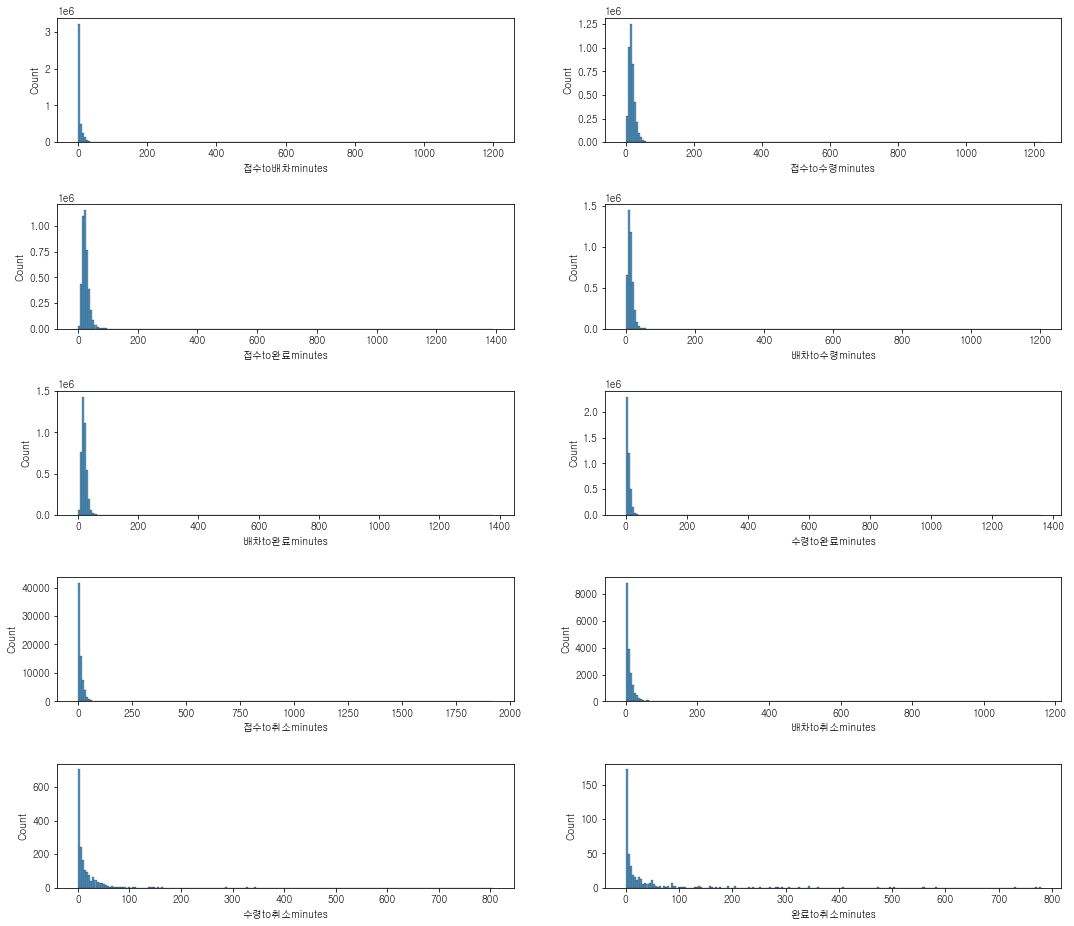

In [44]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(min_cols):
    plt.subplot(12, 2, i+1)
    plt.subplots_adjust(hspace=0.5)
    #plt.title("{}".format(n))
    sns.histplot(data=dlvr_call, x=n, bins=200)

취소 분포를 제외하고는 대체로 60분 안에 끝납니다. 이상치를 전부 제외시켜야겠습니다.

In [392]:
remove_cols = ['접수to배차minutes','접수to수령minutes', '접수to완료minutes',
               '배차to수령minutes', '배차to완료minutes','수령to완료minutes']

In [393]:
dlvr = dlvr_call.copy()

In [394]:
# z-score를 구하고 3이 넘어가는 값을 제외하겠습니다.
print(dlvr_call.shape)
for col in remove_cols:
    mean_ = dlvr[col].mean()
    std_ = dlvr[col].std()
    dlvr.loc[:, 'temp'] = abs((dlvr.loc[:, col] - mean_) / std_)
    dlvr = dlvr.loc[dlvr.temp < 3]
    print(dlvr.shape)
dlvr.drop(['temp'], axis=1, inplace=True)

(4296271, 57)
(4204928, 58)
(4163058, 58)
(4144176, 58)
(4094605, 58)
(4063034, 58)
(4024447, 58)


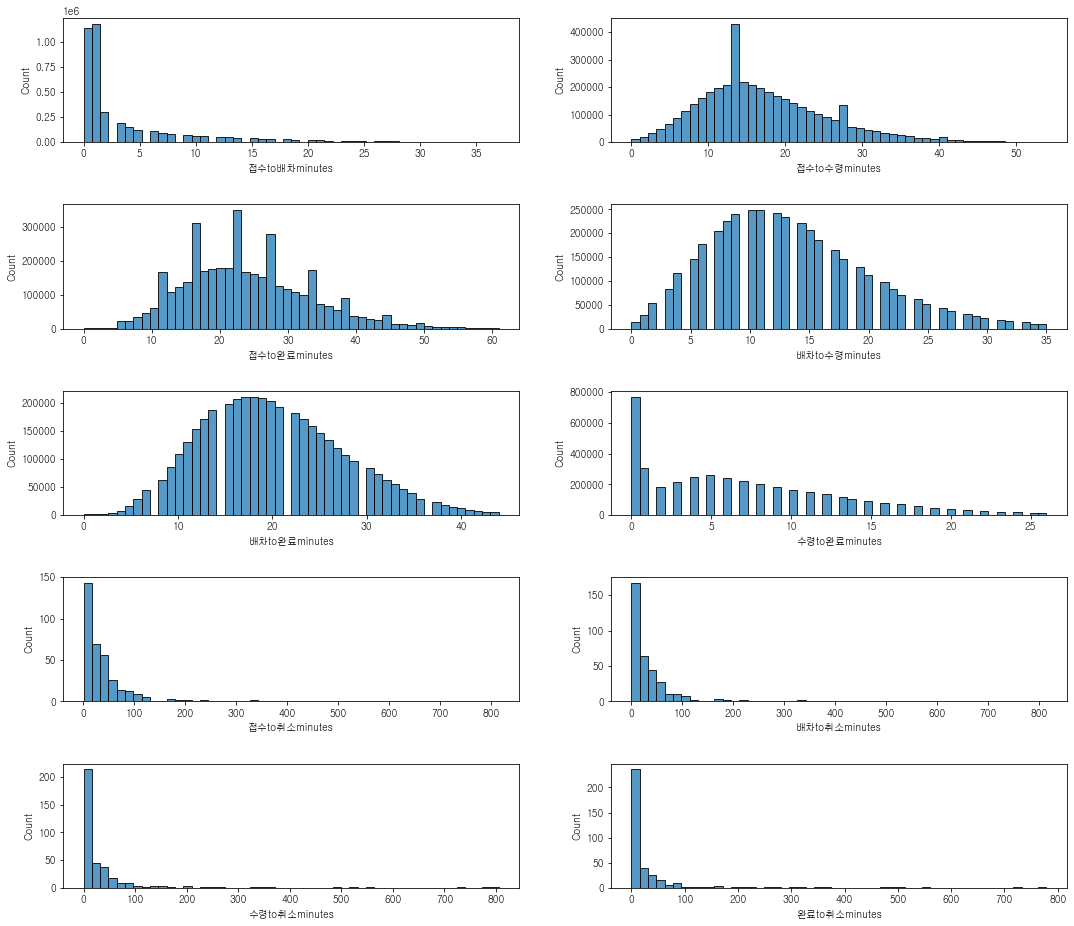

In [395]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(min_cols):
    plt.subplot(12, 2, i+1)
    plt.subplots_adjust(hspace=0.5)
    #plt.title("{}".format(n))
    sns.histplot(data=dlvr, x=n, bins=50)

In [396]:
# 취소 레코드를 지운 df를 하나 더 만들어주겠습니다.

dlvr_uncanceled = dlvr.loc[dlvr.배달취소시간.isnull()]
dlvr_uncanceled.shape

(4024088, 57)

In [397]:
# 취소에 대해서도 알아봐야겠습니다.

dlvr_canceled = dlvr_call.loc[~dlvr_call.배달취소시간.isnull()]
dlvr_canceled.shape

(75279, 57)

In [398]:
# for col in dlvr_uncanceled.columns:
#     print(col)
#     print('nunique: ', dlvr_uncanceled[col].nunique())
#     print('value_count: \n', dlvr_uncanceled[col].value_counts())
#     print(' ')

# INVESTIGATION

## BASE ANALYSIS

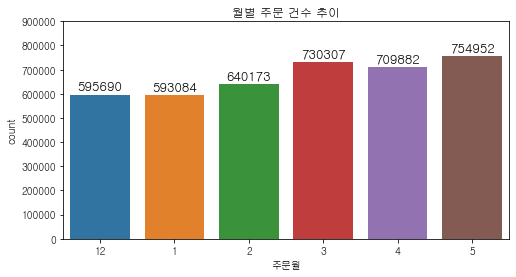

In [87]:
plt.figure(figsize=(8, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='주문월', order=[12, 1, 2, 3, 4, 5])

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top=900000)
plt.title('월별 주문 건수 추이')
plt.show()

- 4월을 제외하고서는 꾸준히 증가세를 보였습니다.
- 보통 영업일수가 적은 2월이 다른 월보다 주문건수가 적어야 맞지만, 2020년 2월은 윤달이었기 때문에 영업일수가 29일이었으며, 2020년은 1월에 설날이 있었기 때문에 영업일수가 2월보다 적었습니다.
- 또한 4월은 영업일수가 30일이고(주말포함), 공휴일은 총선과 석가탄신일이 있었습니다. 그렇기에 영업일수가 많이 부족했습니다.
- 제대로 비교를 하려면 월별로 1일당 주문건수를 산출해보면 됩니다.

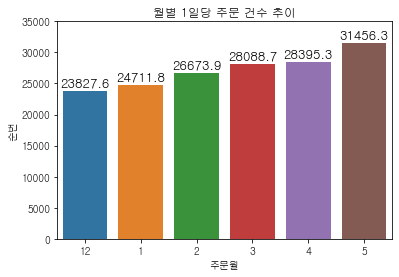

In [88]:
# 빨간날(기념일, 일요일 등)을 제외한 날을 영업일수로 산출
# 20년1월부터 20년5월, 19년12월 순. 24, 24, 26, 25, 24, 25

plots= sns.barplot(data=(dlvr_uncanceled.groupby(['주문월'])['순번'].count() / [24, 24, 26, 25, 24, 25]).reset_index(),
            x='주문월', y='순번', order=[12, 1, 2, 3, 4, 5])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(top=35000)
plt.title('월별 1일당 주문 건수 추이')
plt.show()

- 1일당 주문건수로 보면 12월부터 5월까지 꾸준히 성장한 것을 확인할 수 있습니다.

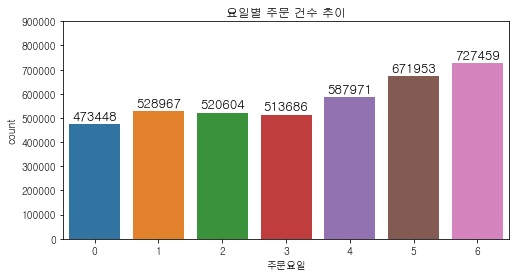

In [91]:
plt.figure(figsize=(8, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='주문요일')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=900000)
plt.title('요일별 주문 건수 추이')
plt.show()

- 요일별로는 주말로 향할수록 배달건수가 급격히 증가합니다.
- 배달건수가 적은 요일은 월, 목요일입니다.

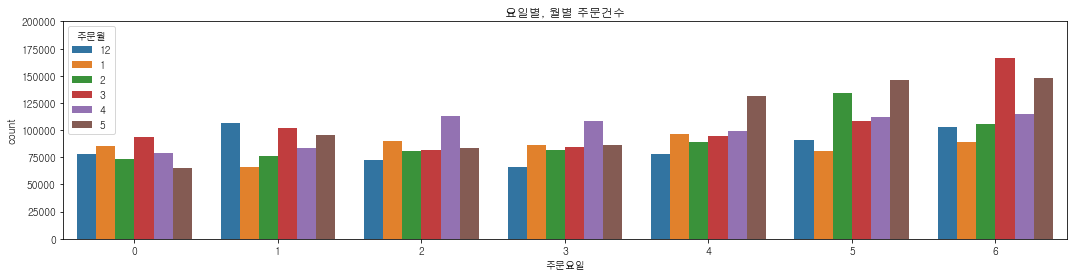

In [115]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='주문요일', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5])
plt.title('요일별, 월별 주문건수')
plt.ylim(top=200000)
plt.show()

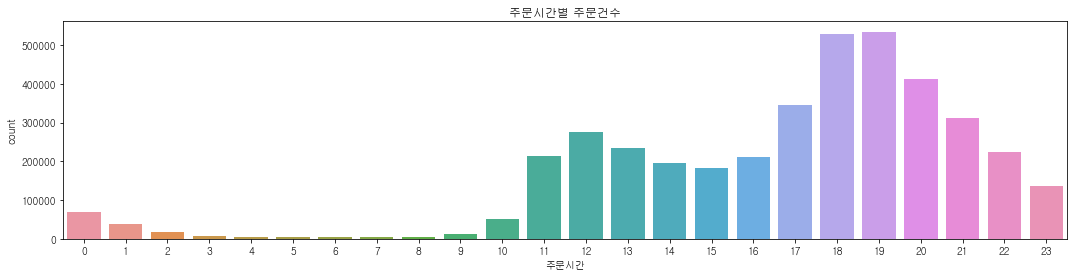

In [117]:
plt.figure(figsize=(18, 4))
sns.countplot(data=dlvr_uncanceled, x='주문시간')
plt.title('주문시간별 주문건수')
plt.show()

- 예상과 크게 다르지 않는 시간대별 주문건수입니다.

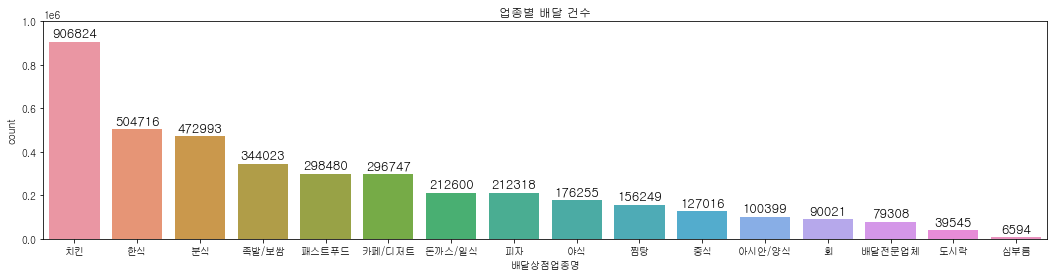

In [87]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='배달상점업종명',
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별 배달 건수')
plt.ylim(top=1000000)
plt.show()

- 역시 치킨은 배달 음식의 최강자입니다.
- 한식, 분식, 족발/보쌈, 패스트푸드가 뒤를 잇습니다.
- 중식은 배달중개업체를 쓰는 경우가 적고 업장에 고용된 배달기사가 있기 때문에 건수가 적은 것으로 판단 됩니다.

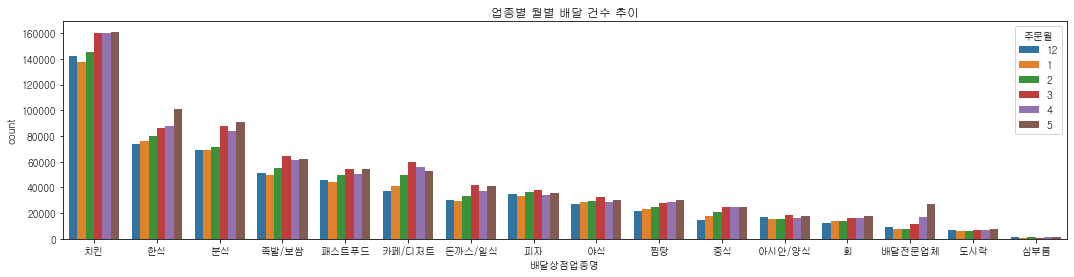

In [91]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='배달상점업종명', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5],
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

plt.title('업종별 월별 배달 건수 추이')
plt.show()

- 치킨은 3, 4, 5월의 주문량이 크게 변하지 않았습니다.
- 주문량이 많이 증가한 업종은 한식입니다. 한식은 매달 꾸준히 증가했으며 5월에 특히 많이 증가했습니다.
- 마찬가지로 꾸준히 증가한 업종은 찜탕입니다.
- 이는 장기화되는 코로나로 인해 치킨이나 패스트푸드, 피자, 돈까스/일식 등 보다는 주식으로 먹는 한식, 찜탕의 수요가 증가한 것으로 추정할 수 있습니다.
- 배달전문업체도 꾸준히 증가했네요?

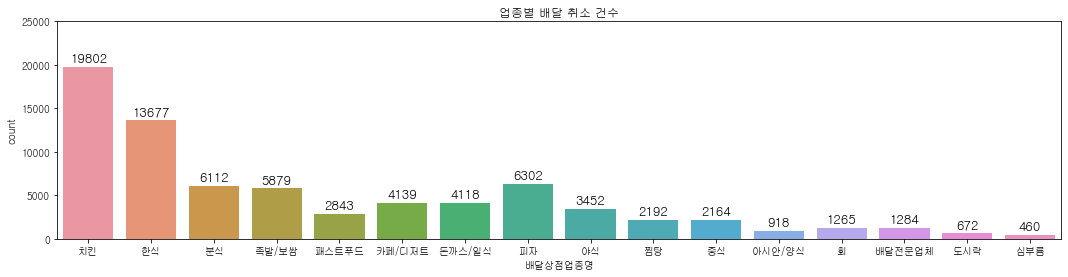

In [96]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_canceled, x='배달상점업종명',
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별 배달 취소 건수')
plt.ylim(top=25000)
plt.show()

- 취소 건수를 살펴보겠습니다.
- 총 주문 건수 대비 한식, 족발/보쌈, 피자 등의 업종에서 취소가 다소 많습니다.
- 패스트푸드는 취소 건수가 적은 편에 속하는 것을 알 수 있습니다.

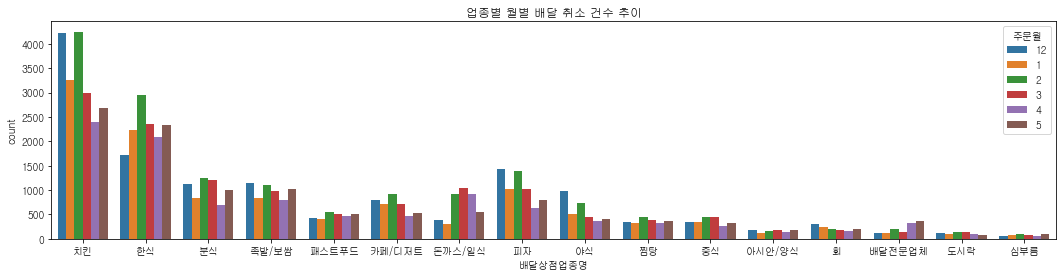

In [98]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_canceled, x='배달상점업종명', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5],
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

plt.title('업종별 월별 배달 취소 건수 추이')
plt.show()

- 전체적으로 12 ~ 2월보다 3 ~ 5월의 취소 건수가 적습니다.
- 다만 대다수의 업종에서 4월보다 5월의 취소건수가 증가하고 있음을 알 수 있습니다.

## DELIVERY TIME

### HOUR

- 16개 업종을 4개씩 살펴보겠습니다.

In [140]:
shop_type = dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index

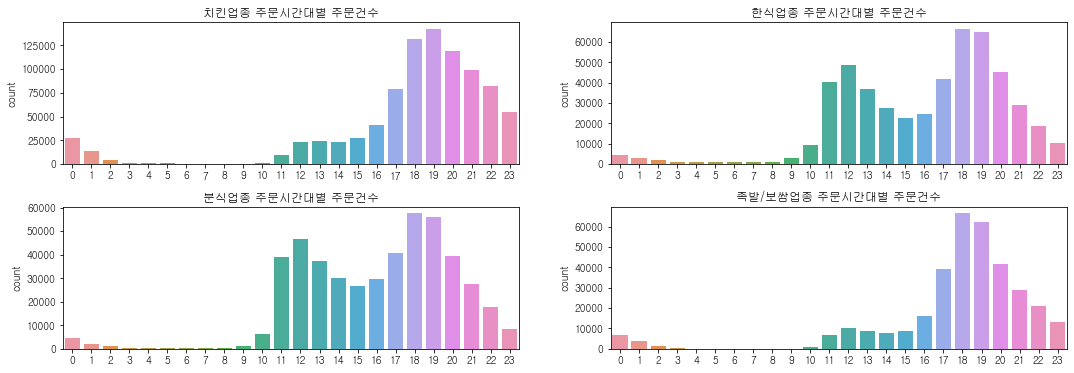

In [147]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_type[:4]):
    plt.subplot(12, 2, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문시간')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.title('{}업종 주문시간대별 주문건수'.format(n))

- 치킨과 족발/보쌈은 저녁시간에 주문이 몰려 있습니다.
- 분식과 한식은 점심과 저녁 모두 주문이 몰린 쌍봉 형태를 취합니다.

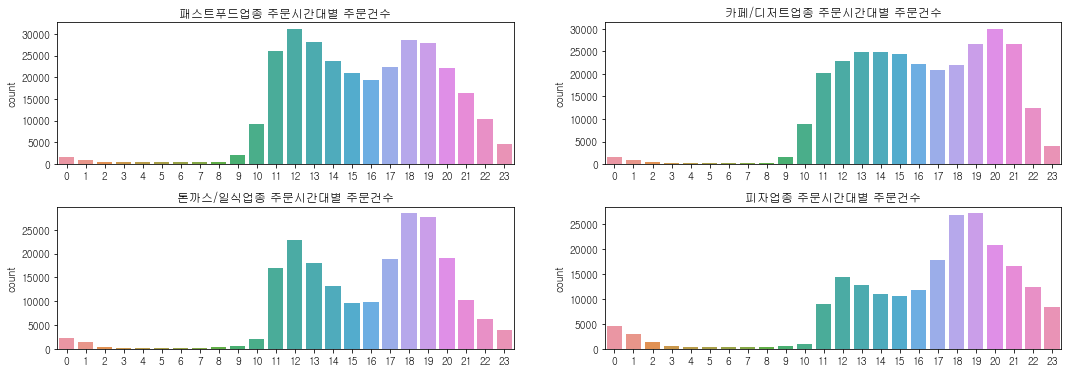

In [148]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_type[4:8]):
    plt.subplot(12, 2, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문시간')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.title('{}업종 주문시간대별 주문건수'.format(n))

- 패스트푸드도 쌍봉형태이지만 점심시간이 저녁시간보다 주문이 더 몰려 있습니다.
- 카페/디저트 업종은 오전부터 밤까지 꾸준히 주문이 유지 됩니다.

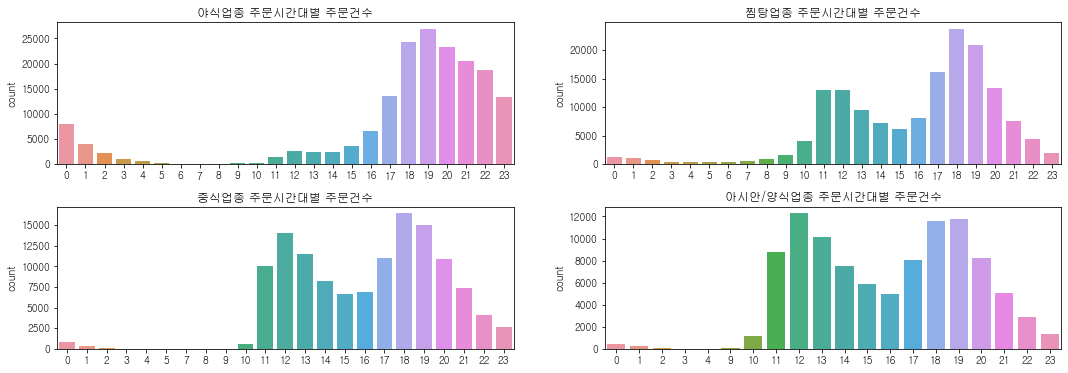

In [149]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_type[8:12]):
    plt.subplot(12, 2, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문시간')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.title('{}업종 주문시간대별 주문건수'.format(n))

- 야식업종은 의외로 상대적으로 야간에 주문량이 많긴하지만 새벽에 주문이 들어오지는 않네요.
- 중식, 찜탕, 아시안/양식도 쌍봉형태를 취합니다.

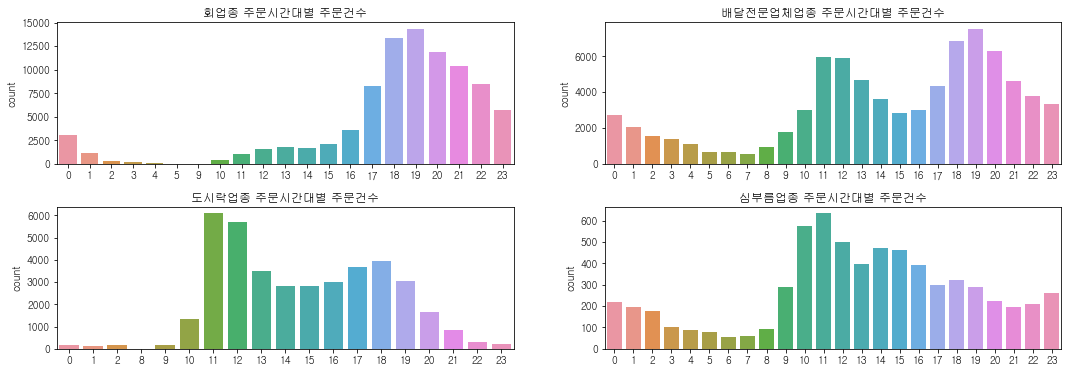

In [150]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_type[12:]):
    plt.subplot(12, 2, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문시간')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.title('{}업종 주문시간대별 주문건수'.format(n))

- 회는 저녁에만 주문이 몰리는 단봉형태입니다.
- 도시락업종은 점심에 유독 주문량이 몰리는 것으로 보아 회사나 단체 주문 건수의 수요가 많을 것으로 추정됩니다. 평균 주문 금액을 살펴봐야겠습니다.
- 특이한점은 배달전문업체업종과 심부름업종인데 새벽에도 주문이 지속되며, 식사시간대에 수요가 높다는 점입니다.

### WEEKDAY

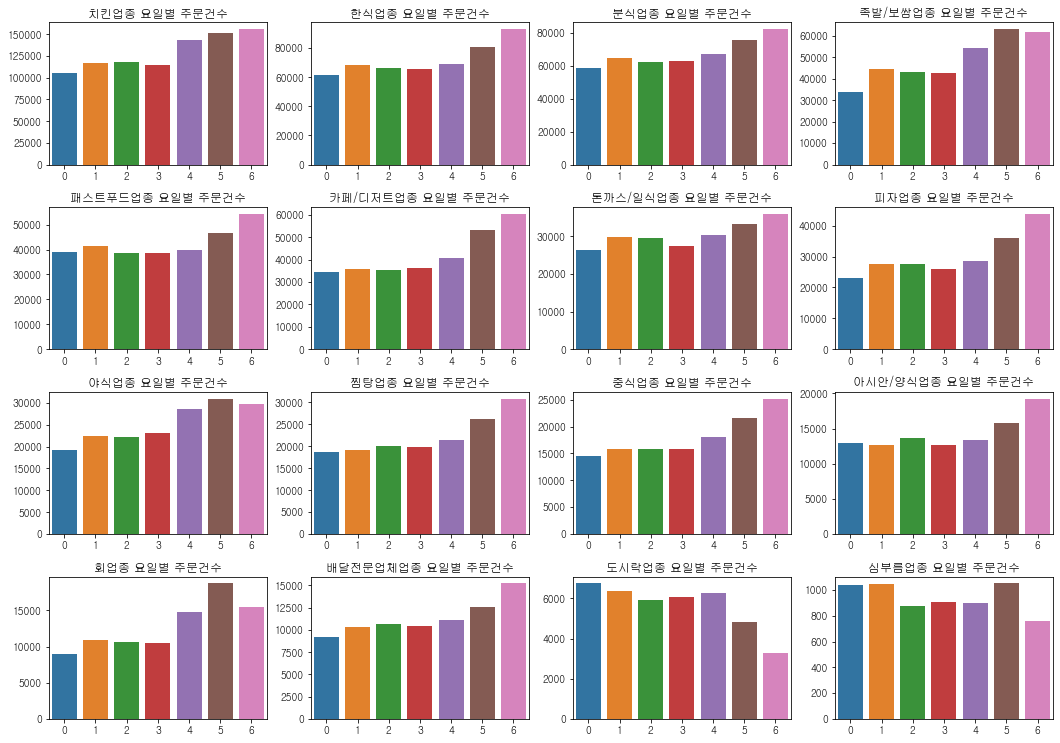

In [156]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_type):
    plt.subplot(12, 4, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문요일')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('{}업종 요일별 주문건수'.format(n))

- 대다수의 업종이 주말에 주문건수가 늘어나는 패턴을 보입니다.
- 주목할점은 회업종은 토요일이 유독 높다는 것
- 도시락업종은 역시 평일에 주문건수가 많고 주말에는 급격히 줄어든다는 것
- 심부름업종은 월, 화요일에 주문건수가 많고 일요일에는 줄어든다는 것입니다.

## TOTAL PRICE

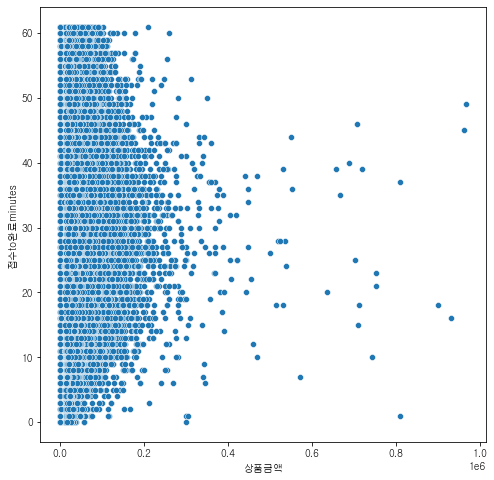

In [168]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=dlvr_uncanceled, x='상품금액', y='접수to완료minutes')
plt.show()

- 상품금액이 높을수록 많은 양의 음식을 주문했다고 추정할 수 있습니다.
- 그러나 상품금액이 높다고 해서 배달소요시간이 오래 걸리지는 않는다는 것을 알 수 있습니다.

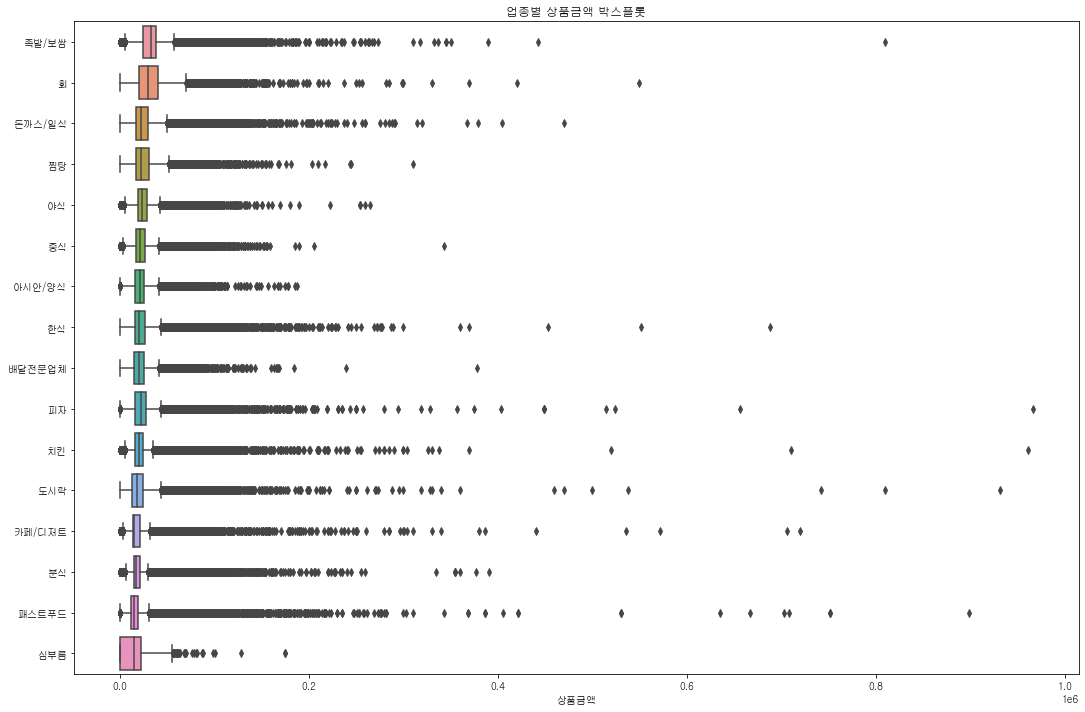

In [185]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=dlvr_uncanceled, y='배달상점업종명', x='상품금액',
           order=dlvr_uncanceled.groupby(['배달상점업종명'])['상품금액'].mean().sort_values(ascending=False).index)
plt.ylabel('')
plt.title('업종별 상품금액 박스플롯')
plt.show()

### TOTAL PRICE == 100,000 W

- 평균 주문금액은 족발/보쌈, 회 등이 높습니다. 반대로 패스트푸드, 분식, 카페/디저트 등은 상대적으로 낮습니다.
- 최대 100만원대까지 주문한 건수가 있습니다.
- 자세히 살펴봐야겠습니다.

In [253]:
# 10만원 이상 금액의 주문건수와 10만원 미만 금액의 주문건수에 대한 조리시간을 살펴보겠습니다.
dlvr_uncanceled.loc[dlvr_uncanceled.상품금액 >= 100000, 'PRICE_TEMP'] = '10만원이상주문건수'
dlvr_uncanceled.loc[dlvr_uncanceled.상품금액 < 100000, 'PRICE_TEMP'] = '10만원미만주문건수'

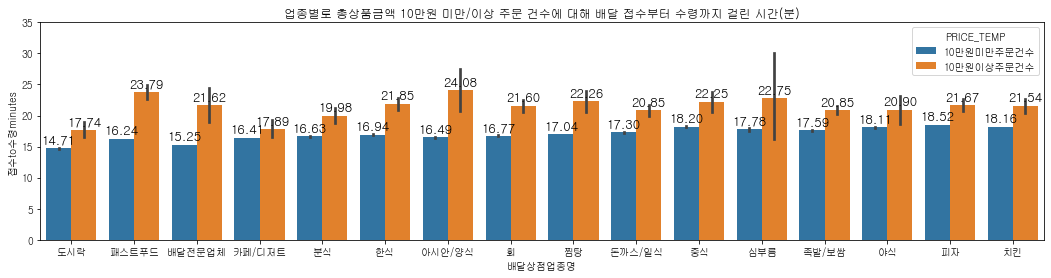

In [103]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='배달상점업종명', y='접수to수령minutes',
                    hue='PRICE_TEMP',
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.title('업종별로 총상품금액 10만원 미만/이상 주문 건수에 대해 배달 접수부터 수령까지 걸린 시간(분)')
plt.ylim(top=35)
plt.show()

- 배달 접수부터 배달 수령까지 걸린 시간에 대해서는 모든 업종에서 차이가 명확합니다.
- 10만원이상 주문건수에 대해서 3~4분 정도 더 소요되었습니다.

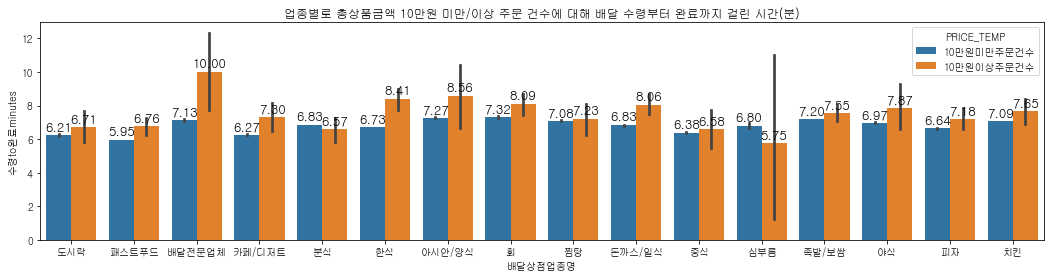

In [104]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='배달상점업종명', y='수령to완료minutes',
                    hue='PRICE_TEMP',
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.title('업종별로 총상품금액 10만원 미만/이상 주문 건수에 대해 배달 수령부터 완료까지 걸린 시간(분)')

plt.show()

- 배달수령시간부터 배달완료시간까지도 미세하게 차이가 존재합니다.
- 10만원이상 주문건수가 보통 30초 정도 오래 걸립니다.
- 다만 수령전까지의 시간보다는 차이가 적습니다.

## DELIVERY DURATION

### 접수부터 완료까지

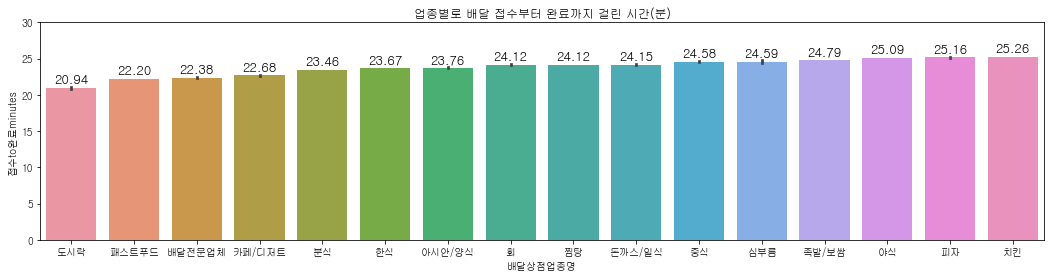

In [59]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='배달상점업종명', y='접수to완료minutes',
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별로 배달 접수부터 완료까지 걸린 시간(분)')
plt.ylim(top=30)
plt.show()

- 접수부터 완료까지 가장 짧은 시간에 배송된 업종은 도시락, 패스트푸드 등입니다.
- 야식, 피자, 치킨 등은 접수부터 완료까지 가장 오랜 시간이 걸린 업종입니다.
- 조리 시간의 영향이 있을 것으로 판단 됩니다.

### 접수부터 배차까지

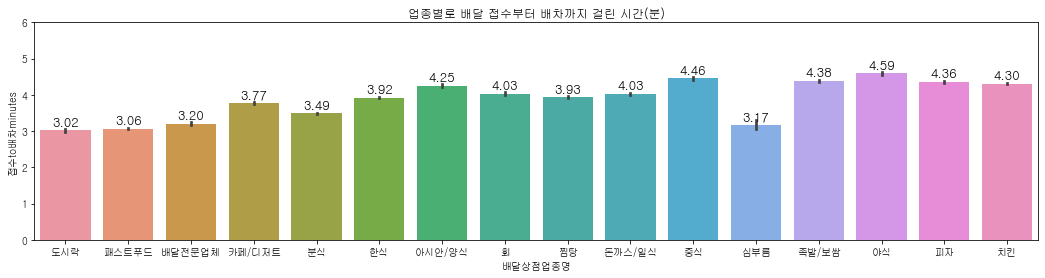

In [66]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='배달상점업종명', y='접수to배차minutes',
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별로 배달 접수부터 배차까지 걸린 시간(분)')
plt.ylim(top=6)

plt.show()

- 배차의 정의가 정확하지 않습니다.
- 접수->배차->수령->완료의 순으로 이루어집니다. 접수는 업체가 고객으로부터 주문을 받은 시간이고 수령은 배달기사가 물건을 업체로부터 수령한 시간입니다. 그렇다면 배차가 업체가 배차를 신청한 시간인지, 배달업체로부터 배차를 확정받은 시간인지를 명확히 해야 합니다.
- 여기서는 배차를 확정받은 시간으로 해석하고 분석을 하겠습니다.


- 도시락, 패스트푸드 업종이 빠른 이유는 배차 시간도 짧기 때문으로 해석됩니다.
- 그러나 배차 시간이 크게 영향력이 있을지는 다른 요소들을 함께 살펴봐야 할 것 같습니다.
- 배차가 가장 오래 걸리는 업종은 야식인데, 야간에 배달기사가 많지 않아 생기는 현상으로 추정해봅니다.
- 그러나 이는 업종별 주요 배송 시간을 분석해봐야겠습니다.


- 배차시간이 짧다는 것은 배달기사의 공급이 많거나, 배달기사가 선호하는 업종을 골라서 선택할 수 있거나, 여러가지 요소가 있을 것입니다.

### 배차부터 수령까지

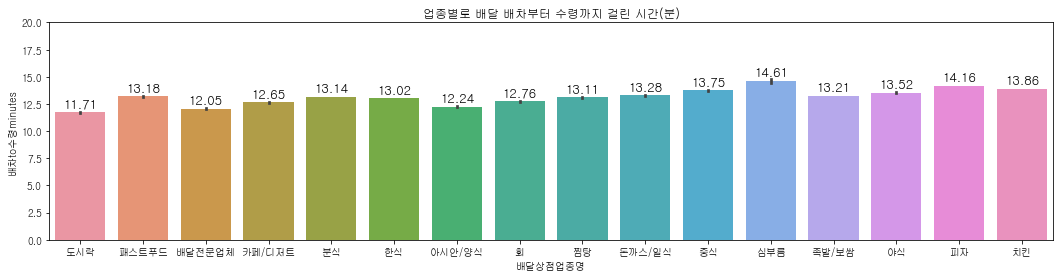

In [67]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='배달상점업종명', y='배차to수령minutes',
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.title('업종별로 배달 배차부터 수령까지 걸린 시간(분)')
plt.ylim(top=20)


plt.show()

- 배차가 완료되고 배달기사가 수령을 완료하는 시간입니다.

### 접수부터 수령까지(조리및세팅시간)

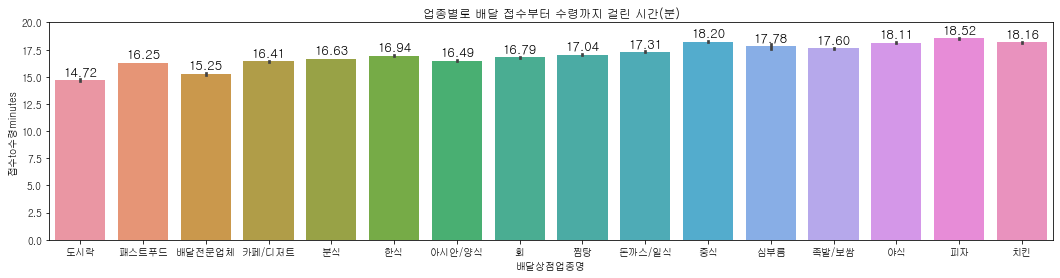

In [69]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='배달상점업종명', y='접수to수령minutes',
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.title('업종별로 배달 접수부터 수령까지 걸린 시간(분)')
plt.ylim(top=20)


plt.show()

- 주문을 접수하는 순간부터 배달기사가 수령하는 순간까지걸리는 시간입니다.
- 도시락과 야식, 피자, 치킨 업종은 거의 3분이 넘게 차이가 납니다.
- 패스트푸드는 수령까지 시간이 꽤 걸리지만 실제 배송 시간이 가장 짧아 두 번째로 빠른 업종이 되었습니다.

### 수령부터 완료까지(실제배송소요시간)

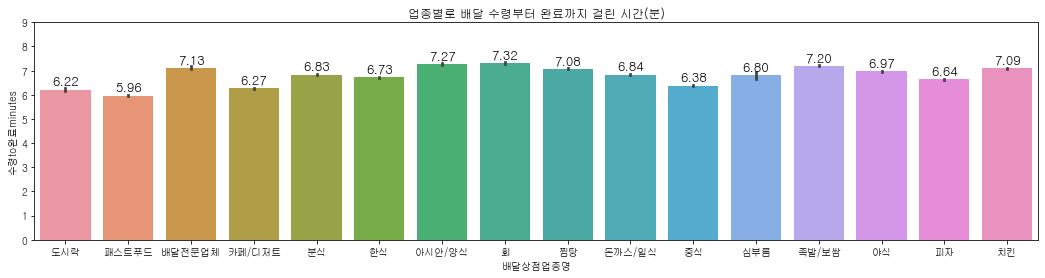

In [68]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='배달상점업종명', y='수령to완료minutes',
                   order=dlvr_uncanceled.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.title('업종별로 배달 수령부터 완료까지 걸린 시간(분)')
plt.ylim(top=9)

plt.show()

- 실질적인 배달기사의 배송 소요 시간입니다.
- 가장 빠른 업종은 패스트푸드로 약 6분이 걸리며, 가장 오래 걸리는 업종은 회 업종이며 약 7분 20초가 걸립니다.
- 접수부터 완료까지 가장 적은 시간이 소요되던 도시락과 가장 많은 시간이 소요되던 치킨, 피자 등은 실질 배송 소요 시간에는 1분이 채 차이나지 않습니다.

### 시간단위 배송시간 확인

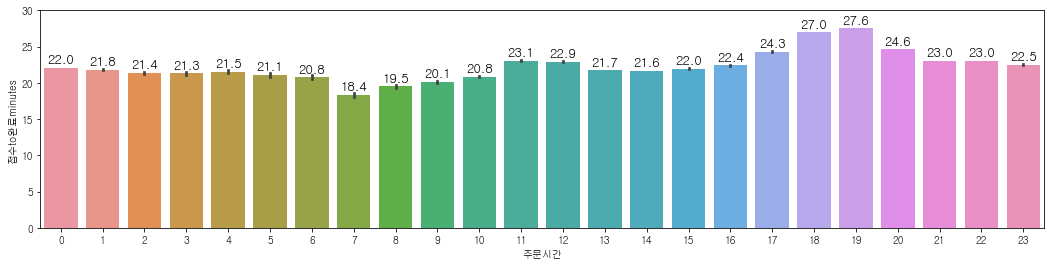

In [76]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='주문시간', y='접수to완료minutes')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=30)
plt.show()

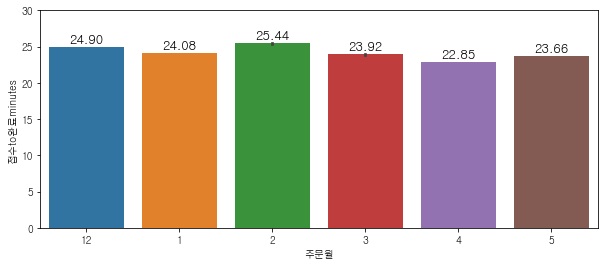

In [77]:
plt.figure(figsize=(10, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='주문월', y='접수to완료minutes',
           order=[12, 1, 2, 3, 4, 5])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=30)

plt.show()

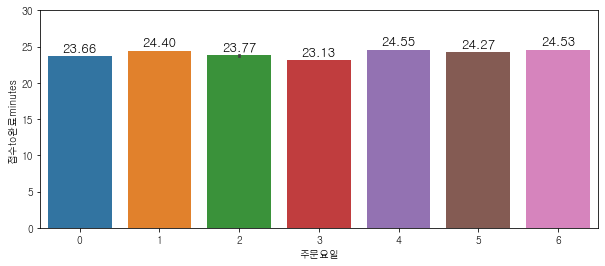

In [78]:
plt.figure(figsize=(10, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='주문요일', y='접수to완료minutes')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=30)

plt.show()

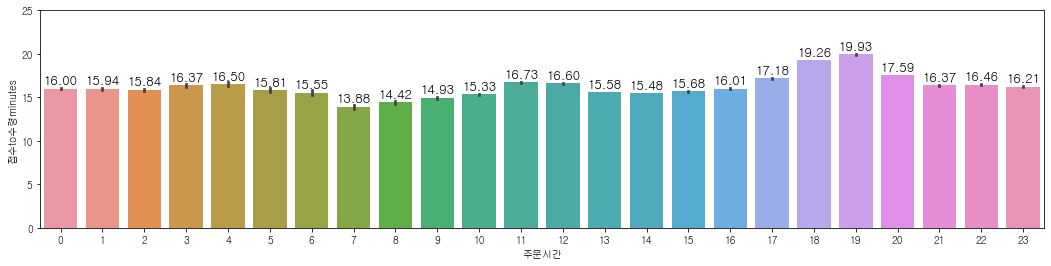

In [79]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='주문시간', y='접수to수령minutes')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=25)

plt.show()

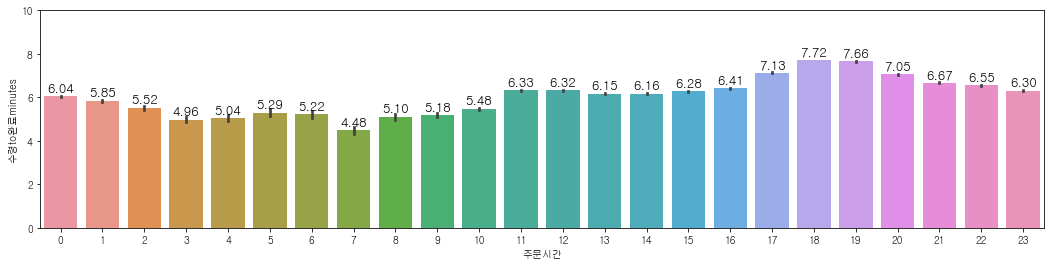

In [484]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='주문시간', y='수령to완료minutes')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=10)
plt.show()

## WEATHER

- 기상상태에 따른 배달소요시간은 어떤 차이가 있는지 확인해보겠습니다.
- 서울특별시만 살펴보겠습니다.
- 기상데이터는 기상청데이터를 가져왔습니다.

In [254]:
weather = pd.read_csv(r'C:\Users\Wyatt\wyatt37\data\ktVisual\OBS_ASOS_TIM.csv', encoding='cp949').fillna(0)

In [255]:
weather.columns = ['지점', '지점명', '일시', '기온', '강수량', '풍속', '습도', '일조', '적설', '지면온도']

In [256]:
weather.head()

지점 지점명                일시   기온  강수량   풍속  습도   일조   적설  지면온도
0  108  서울  2019-12-01 01:00  5.1  0.0  0.7  54  0.0  0.0   4.2
1  108  서울  2019-12-01 02:00  4.9  0.0  0.0  55  0.0  0.0   4.3
2  108  서울  2019-12-01 03:00  4.6  0.0  1.3  66  0.0  0.0   3.7
3  108  서울  2019-12-01 04:00  4.6  0.0  1.0  65  0.0  0.0   4.3
4  108  서울  2019-12-01 05:00  4.8  0.0  1.1  65  0.0  0.0   4.5

In [258]:
weather['눈비'] = weather.강수량 + weather.적설

In [260]:
weather['배달시간'] = pd.to_datetime(weather.일시)

In [261]:
weather['배달시간월'] = weather.배달시간.dt.month
weather['배달시간일'] = weather.배달시간.dt.day
weather['배달시간시'] = weather.배달시간.dt.hour

In [262]:
weather.loc[weather.눈비 == 0, '눈비여부'] = False
weather.loc[weather.눈비 != 0, '눈비여부'] = True

In [263]:
dlvr_seoul_uncanceled = dlvr_uncanceled.loc[dlvr_uncanceled.배달상점광역시도명 == '서울특별시']

In [264]:
# merge 해줄 키 컬럼은 배달수령시간을 round 한 컬럼으로 하겠습니다.
dlvr_seoul_uncanceled['배달시간'] = dlvr_seoul_uncanceled.배달수령시간.dt.round('H')

In [265]:
dlvr_seoul_uncanceled_weather = pd.merge(dlvr_seoul_uncanceled, weather.iloc[:, 3:], how='left', on='배달시간')

### RAINY

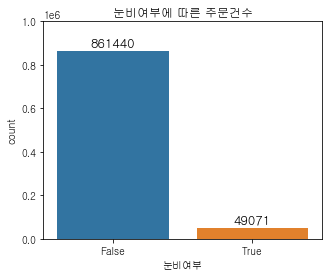

In [161]:
plt.figure(figsize=(5, 4))
plots = sns.countplot(data=dlvr_seoul_uncanceled_weather, x='눈비여부')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top=1000000)
plt.title('눈비여부에 따른 주문건수')
plt.show()

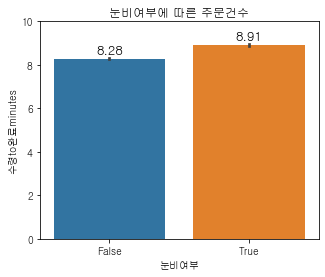

In [164]:
plt.figure(figsize=(5, 4))
plots = sns.barplot(data=dlvr_seoul_uncanceled_weather, x='눈비여부', y='수령to완료minutes')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top=10)
plt.title('눈비여부에 따른 주문건수')
plt.show()

## ★DESTINATION

- 중요한 건 서울시이기 때문에 배달상점광역시도명이 서울특별시인 데이터만 보겠습니다.

In [509]:
dlvr_seoul = dlvr.loc[dlvr.배달상점광역시도명 == '서울특별시']

In [510]:
dlvr_seoul['count'] = 1

In [511]:
dlvr_seoul.배달목적지광역시도명.value_counts()

서울특별시    867556
경기도       43190
인천광역시         4
전라북도          2
대전광역시         1
Name: 배달목적지광역시도명, dtype: int64

In [512]:
# 배달목적지에 인천, 전북, 대전은 지워주겠습니다.
dlvr_seoul = dlvr_seoul.loc[dlvr_seoul.배달목적지광역시도명.isin(['서울특별시', '경기도'])]

In [513]:
dlvr_seoul.배달상점시군구명.value_counts()

구로구     337734
금천구     159027
영등포구    141338
도봉구      86117
은평구      79384
동작구      39353
관악구      24749
양천구      15894
노원구      14191
강북구       6531
서초구       2533
성북구       2188
강남구       1491
강동구        108
서대문구        75
강서구         32
송파구          1
Name: 배달상점시군구명, dtype: int64

- 상점 수가 너무 적은 강동구, 서대문구, 강서구, 송파구는 삭제하겠습니다.
- 절대수가 차이가 크니, 무조건 비율로 분석해야겠습니다.

In [515]:
dlvr_seoul = dlvr_seoul.loc[~dlvr_seoul.배달상점시군구명.isin(['강동구', '서대문구', '강서구', '송파구'])]

In [516]:
dlvr_seoul.배달목적지시군구명.value_counts()

구로구        292831
금천구        139196
영등포구       118554
은평구         79382
도봉구         71372
관악구         45570
광명시         40998
동작구         40618
양천구         33157
노원구         26276
강북구          7186
서초구          6765
성북구          3863
강서구          1248
강남구          1103
안양시 만안구      1025
부천시           811
의정부시          311
송파구           128
성동구            76
과천시            39
중랑구            15
남양주시            3
고양시 덕양구         1
종로구             1
서대문구            1
Name: 배달목적지시군구명, dtype: int64

- 배달목적지시군구명에서 통계적으로 유의하지 않은 과천시, 중랑구, 남양주시, 덕양구, 서대문구는 제외하겠습니다.

### 배달목적지비율

In [517]:
dlvr_seoul = dlvr_seoul.loc[~dlvr_seoul.배달목적지시군구명.isin(['과천시', '중랑구', '남양주시',
                                                        '고양시 덕양구', '종로구', '서대문구'])]

In [518]:
temp = pd.pivot_table(data=dlvr_seoul,
                      index='배달상점시군구명',
                      columns='배달목적지시군구명',
                      values='count',
                      aggfunc='sum').fillna(0)

In [519]:
temp['총배달건수'] = temp.sum(axis=1)

In [520]:
for col in list(temp.columns):
    temp['{}_비중'.format(col)] = temp[col] / temp.총배달건수

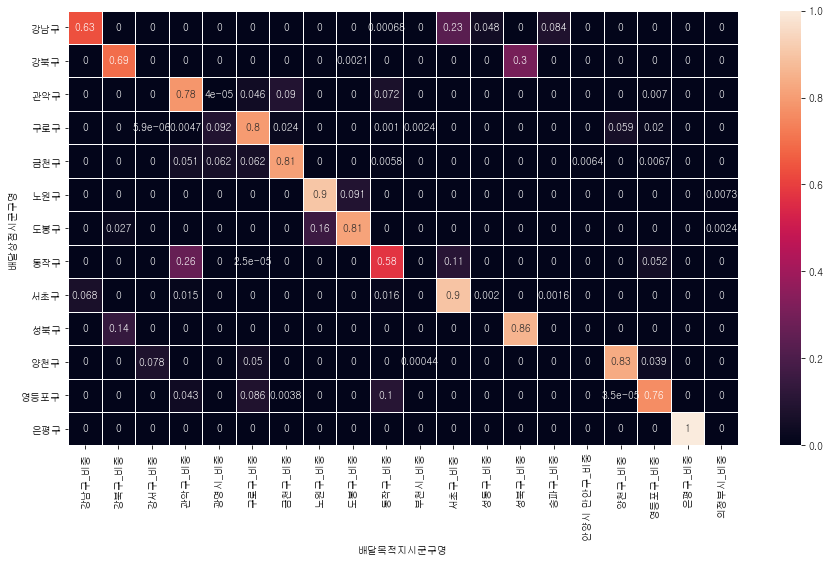

In [524]:
plt.figure(figsize=(15, 8))
sns.heatmap(temp.iloc[:, 21:-1],
           annot=True, linewidths=.5, vmin=0)
plt.show()

- 배달상점이 소재한 지역구 외에 타 지역구로 배달을 많이 가는 강남구, 강북구, 동작구, 영등포구 등이 있습니다.
- 배달상점이 소재한 지역구 내에 배달을 많이 가는 은평구, 서초구, 노원구, 성북구 등이 있습니다.

### 배달소요시간

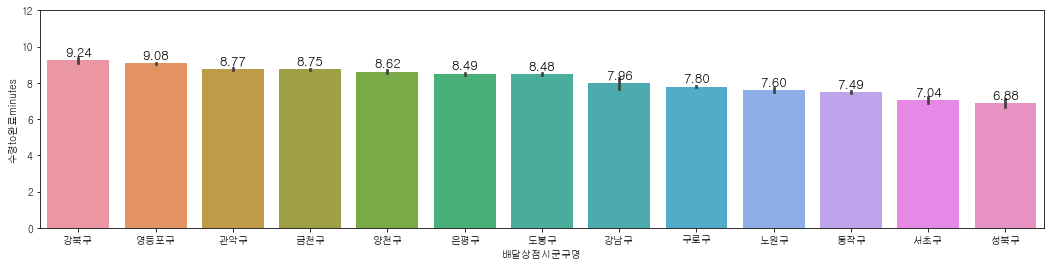

In [528]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점시군구명', y='수령to완료minutes',
                   order=dlvr_seoul.groupby(['배달상점시군구명'])['수령to완료minutes'].mean().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=12)
plt.show()

- 타 지역구 배달 비율이 비교적 높은 강북구, 영등포구는 배달 시간이 오래 걸립니다.
- 그러나 강남구와 동작구는 타 지역구 배달 비율이 높음에도 배달 시간이 매우 짧습니다.


- 타 지역구 배달 비율이 비교적 낮은 은평구, 노원구, 서초구, 성북구는 배달시간이 매우 적게 걸립니다.
- 그나마 은평구가 8.5분이지만, 노원 7.6, 서초 7.0, 성북 6.9 입니다.

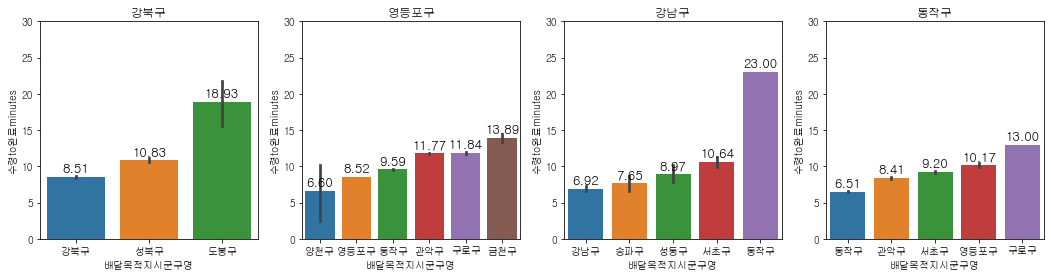

In [541]:
# 타지역 배달 비율이 비교적 높은 지역구
# 강북구, 영등포구, 강남구, 동작구
abroad_goo = ['강북구', '영등포구', '강남구', '동작구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='수령to완료minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['수령to완료minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 30)
    plt.title('{}'.format(n))

- 네 지역 모두 관외 배달 지역 비율이 높지만, 배달시간의 차이가 나는 이유는 기본적인 관내 배달 시간의 차이입니다.
- 강북구와 영등포구는 8.5분, 강남구와 동작구는 각각 6.9, 6.5 분이 걸립니다.


- 관외 지역 배달 시간도 당연히 차이가 큽니다.
- 강북구-> 성북구는 10.8분, 영등포구->동작구는 9.6분, 영등포구->관악구는 11.7분이 걸립니다.
- 반면에 강남구->송파구는 7.7분, 동작구->관악구는 8.4분이 걸립니다.

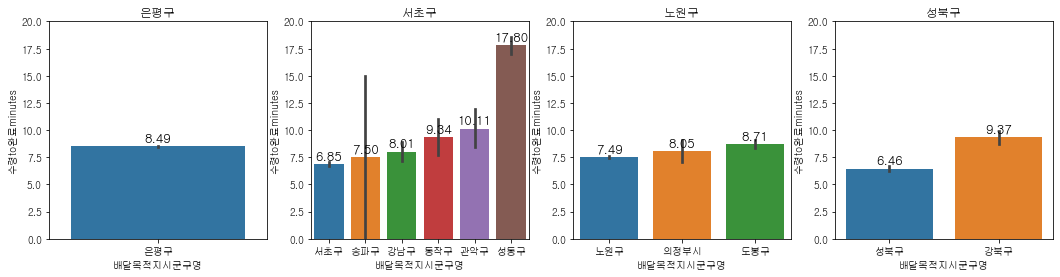

In [545]:
# 타지역 배달 비율이 비교적 낮은 지역구
# 은평구, 서초구, 노원구, 성북구
abroad_goo = ['은평구', '서초구', '노원구', '성북구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='수령to완료minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['수령to완료minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 20)
    plt.title('{}'.format(n))

- 관내 배달 비중이 높은 지역구는 배달 시간도 매우 적게 걸리는 것으로 파악되었습니다.
- 서초구와 성북구는 관내 배달 시간이 채 7분이 되지 않으며, 노원구는 7.5분 가량이 걸리지만 관외 배달시간도 큰 차이가 없습니다.

### 배차소요시간

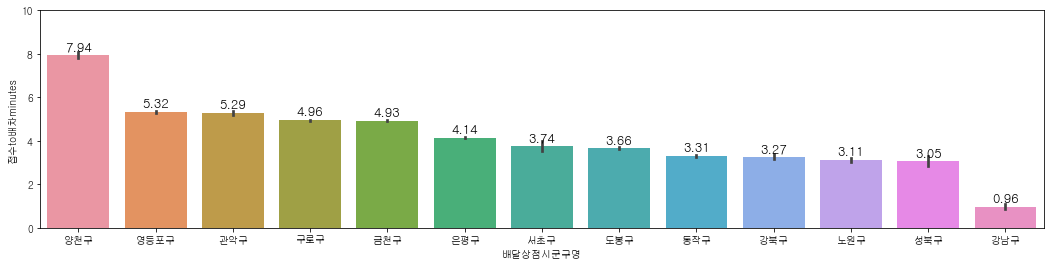

In [548]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점시군구명', y='접수to배차minutes',
                   order=dlvr_seoul.groupby(['배달상점시군구명'])['접수to배차minutes'].mean().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=10)
plt.show()

- 4분을 기점으로 4분보다 적게 걸리면 배차가 빨리 잡히는 편이고, 4분이 넘으면 오래 걸리는 편입니다.
- 강남구와 양천구는 대척점에 있습니다. 1분도 안 걸리는 강남구, 8분이나 걸리는 양천구입니다.


- 타지역 배달 비율이 높은 지역구 중 영등포구를 제외하고, 강북, 강남, 동작구는 전부 4분이 걸리지 않습니다.
- 타지역 배달 비율이 낮은 은평, 서초, 노원, 성북구도 배차 시간은 4분이 걸리지 않습니다.

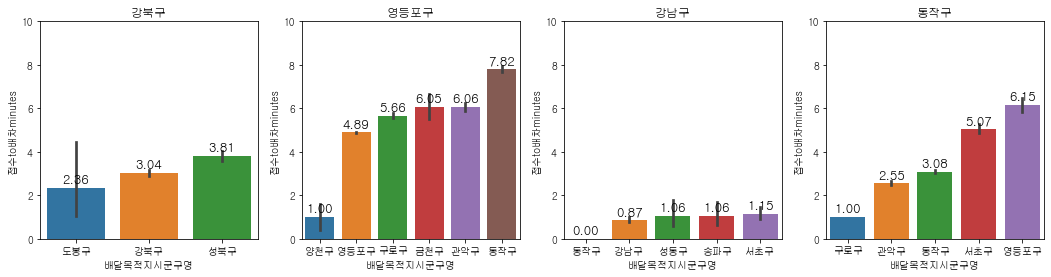

In [550]:
# 타지역 배달 비율이 비교적 높은 지역구
# 강북구, 영등포구, 강남구, 동작구
abroad_goo = ['강북구', '영등포구', '강남구', '동작구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='접수to배차minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['접수to배차minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 10)
    plt.title('{}'.format(n))

- 영등포구, 동작구는 타 지역구 배달 건수에 대해서는 배차 시간이 조금 걸리는 편입니다.
- 강남구는 타 지역구 배달 건수도 1분 밖에 걸리지 않습니다.

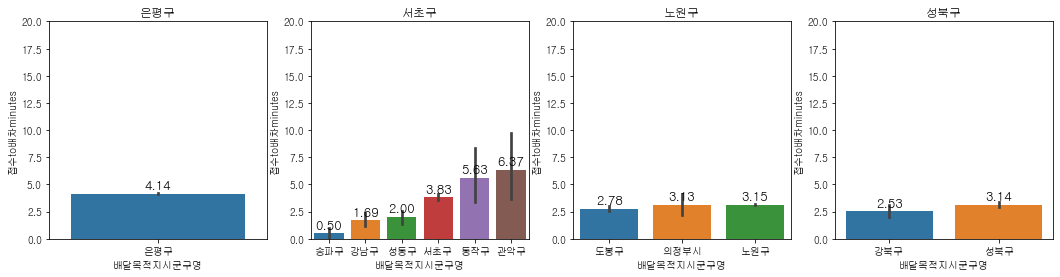

In [551]:
# 타지역 배달 비율이 비교적 낮은 지역구
# 은평구, 서초구, 노원구, 성북구
abroad_goo = ['은평구', '서초구', '노원구', '성북구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='접수to배차minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['접수to배차minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 20)
    plt.title('{}'.format(n))

## ★REVENUE

In [422]:
dlvr_seoul.배달접수업체ID.value_counts()

C000049    270103
C000209    158196
C000026     87188
C000129     79384
C000101     79290
C000104     26254
C000260     25545
C000103     19079
C000210     18832
C000102     18669
C000133     16202
C000237     14182
C000332     14083
C000168     13532
C000303     12915
C000347      8604
C000080      7847
C000300      7620
C000295      7069
C000263      5922
C000264      5603
C000166      4520
C000259      1931
C000455      1807
C000077      1616
C000167      1357
C000249      1170
C000213       802
C000250       480
C000366       297
C000218       147
C000483       112
C000482        92
C000436        41
C000253        32
C000466         5
C000309         1
Name: 배달접수업체ID, dtype: int64

In [552]:
dlvr_seoul.groupby(['배달상점시군구명', '배달상점업종명', '배달상점ID'])['상품금액'].sum().sort_values(ascending=False).to_frame().head(10)

상품금액
배달상점시군구명 배달상점업종명 배달상점ID             
금천구      분식      S0022229  467764307
         치킨      S0022364  370518999
구로구      패스트푸드   S0022426  327387404
         치킨      S0022418  321806811
도봉구      피자      S0039845  318283500
구로구      패스트푸드   S0022429  303509530
         족발/보쌈   S0022407  293381507
영등포구     아시안/양식  S0021973  266652600
금천구      족발/보쌈   S0019618  266050500
구로구      분식      S0022436  263986900

### 객단가분석

In [555]:
dlvr_seoul_10k = dlvr_seoul.loc[dlvr_seoul.상품금액 <= 100000]

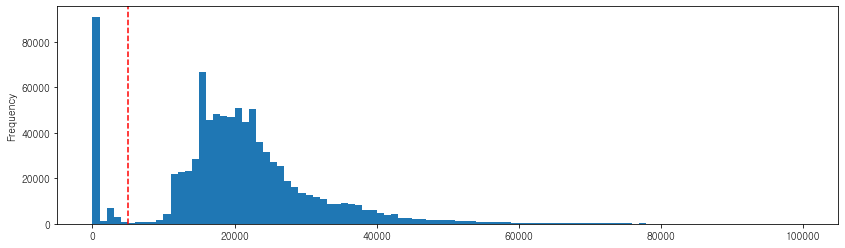

In [566]:
dlvr_seoul_10k.상품금액.plot(kind='hist', bins=100, figsize=(14, 4))
plt.axvline(x = 5000, color = 'r', linestyle = '--',)
plt.show()

In [568]:
# 상품금액 중에서 5000원 이하는 제외하겠습니다.
dlvr_seoul_10k = dlvr_seoul_10k.loc[dlvr_seoul_10k.상품금액 >= 5000]

In [571]:
(
    dlvr_seoul_10k
    .groupby(['배달상점ID', '배달상점업종명', '배달상점시군구명', '배달상점법정동명'])['상품금액', '배달금액'].mean()
    .sort_values(by='상품금액', ascending=False)
).head(50)

상품금액         배달금액
배달상점ID   배달상점업종명 배달상점시군구명 배달상점법정동명                           
S0022366 한식      금천구      가산동       76662.500000  4200.000000
S0041063 한식      영등포구     여의도동      73240.000000  3266.666667
S0033425 한식      도봉구      쌍문동       56084.745763  3257.627119
S0039995 도시락     양천구      신정동       55479.411765  4645.098039
S0039988 도시락     영등포구     당산동5가     53704.444444  4777.777778
S0039118 족발/보쌈   영등포구     여의도동      50833.333333  3433.333333
S0022445 한식      구로구      고척동       50700.000000  3300.000000
S0001256 회       구로구      오류동       49125.000000  3350.000000
S0041399 회       영등포구     신길동       47198.347107  3836.776860
S0029511 족발/보쌈   은평구      갈현동       46000.000000  4950.000000
S0000279 회       구로구      고척동       45000.000000  5300.000000
S0026233 야식      도봉구      도봉동       43204.545455  3704.545455
S0028228 회       강북구      미아동       42956.896552  3395.689655
S0041885 회       영등포구     신길동       42927.835052  4711.340206
S0029508 족발/보쌈   은평구      갈현동       42053.016143  4056.074766
S0001682 치킨      구로구      오류동       42000.000000  3300.000000
S0039835 족발/보쌈   도봉구      창동        41949.745547  3383.460560
S0033420 찜탕      도봉구      쌍문동       41862.632870  3486.426819
S0029509 족발/보쌈   은평구      갈현동       41526.315789  4268.623482
S0000277 회       구로구      고척동       41400.000000  3696.000000
S0029507 족발/보쌈   은평구      갈현동       41334.724005  3900.757381
S0000278 회       구로구      고척동       40741.379310  3693.103448
S0021974 족발/보쌈   영등포구     대림동       40627.131783  3579.155900
S0000205 회       구로구      고척동       40595.454545  3374.318182
S0029719 찜탕      영등포구     대림동       40595.238095  3504.761905
S0029167 한식      영등포구     신길동       40581.395349  4220.930233
S0028336 회       도봉구      방학동       40537.913907  3539.238411
S0000004 한식      강북구      미아동       40500.000000  3250.000000
S0022407 족발/보쌈   구로구      개봉동       40226.850250  3609.955506
S0039982 회       영등포구     신길동       40034.482759  3751.724138
S0000045 회       구로구      개봉동       39948.275862  3517.241379
S0019300 족발/보쌈   금천구      가산동       39500.000000  3300.000000
S0035886 족발/보쌈   영등포구     대림동       39375.490196  3417.810458
S0029166 한식      영등포구     신길동       38915.512465  4313.019391
S0022910 족발/보쌈   은평구      갈현동       38895.561358  3664.229765
S0023925 찜탕      영등포구     대림동       38892.204042  3558.229066
S0000282 야식      구로구      궁동        38866.666667  3769.333333
S0001279 족발/보쌈   구로구      오류동       38833.333333  3300.000000
S0022406 족발/보쌈   구로구      개봉동       38813.793103  3596.551724
S0033402 회       은평구      갈현동       38727.082461  3779.321892
S0039106 족발/보쌈   영등포구     여의도동      38453.289110  3372.526258
S0033426 족발/보쌈   도봉구      쌍문동       38439.880952  3899.107143
S0001278 족발/보쌈   구로구      오류동       38290.065604  3402.061856
S0022145 족발/보쌈   구로구      구로동       38265.822785  3817.046414
S0022915 족발/보쌈   은평구      갈현동       38243.010753  3605.376344
S0029506 족발/보쌈   은평구      갈현동       38230.769231  4180.000000
S0001255 회       구로구      오류동       38219.262295  3627.561475
S0022147 족발/보쌈   금천구      독산동       38180.456491  3876.405136
S0028346 한식      도봉구      방학동       38173.038229  3619.416499
S0026001 한식      영등포구     여의도동      38055.611111  3322.222222

In [578]:
# 주평균 주문건수를 뽑아보겠습니다.
(
    dlvr_seoul_10k
    .groupby(['배달상점ID', '배달상점업종명', '배달상점시군구명', '배달상점법정동명', '주문주차'])['count'].sum().unstack()
    .dropna()
)

주문주차                                 -4     -3    -2     -1      0      1   \
배달상점ID   배달상점업종명 배달상점시군구명 배달상점법정동명                                           
S0000054 카페/디저트  구로구      개봉동        4.0   18.0  27.0   30.0   25.0   34.0   
S0000058 찜탕      구로구      개봉동        2.0   12.0   7.0    5.0    9.0    8.0   
S0000061 치킨      구로구      개봉동        5.0   21.0  34.0   24.0   35.0   24.0   
S0000097 족발/보쌈   구로구      개봉동        7.0  104.0  90.0   93.0  118.0  100.0   
S0000129 피자      구로구      개봉동        6.0   57.0  53.0   90.0   81.0   61.0   
...                                  ...    ...   ...    ...    ...    ...   
S0040978 야식      영등포구     대림동        2.0   40.0  38.0   49.0   37.0   44.0   
S0041533 치킨      영등포구     신길동       16.0   95.0  84.0  116.0  109.0   83.0   
S0041839 패스트푸드   영등포구     당산동        4.0   56.0  65.0   72.0   68.0   69.0   
S0041861 분식      은평구      갈현동       13.0  119.0  99.0  106.0  107.0   94.0   
S0041885 회       영등포구     신길동        1.0    3.0   2.0    4.0    1.0    4.0   

주문주차                                   2      3     4      5      6      7   \
배달상점ID   배달상점업종명 배달상점시군구명 배달상점법정동명                                            
S0000054 카페/디저트  구로구      개봉동        28.0   26.0  43.0   29.0   24.0   23.0   
S0000058 찜탕      구로구      개봉동         9.0    4.0  10.0    7.0    8.0    4.0   
S0000061 치킨      구로구      개봉동        40.0   29.0  37.0   36.0   50.0   33.0   
S0000097 족발/보쌈   구로구      개봉동       103.0   85.0  58.0  131.0  105.0  105.0   
S0000129 피자      구로구      개봉동        90.0   55.0  38.0   75.0   85.0   76.0   
...                                   ...    ...   ...    ...    ...    ...   
S0040978 야식      영등포구     대림동        42.0   51.0  61.0   49.0   37.0   47.0   
S0041533 치킨      영등포구     신길동        92.0   69.0  53.0   70.0   89.0   74.0   
S0041839 패스트푸드   영등포구     당산동        50.0   24.0  20.0   48.0   43.0   45.0   
S0041861 분식      은평구      갈현동        95.0  121.0  76.0  104.0  109.0  115.0   
S0041885 회       영등포구     신길동         3.0    2.0   3.0    3.0    5.0    2.0   

주문주차                                   8      9      10     11     12     13  \
배달상점ID   배달상점업종명 배달상점시군구명 배달상점법정동명                                             
S0000054 카페/디저트  구로구      개봉동        15.0   31.0   23.0   27.0   24.0   17.0   
S0000058 찜탕      구로구      개봉동         3.0    9.0    4.0    7.0    5.0   11.0   
S0000061 치킨      구로구      개봉동        33.0   37.0   35.0   21.0   26.0   28.0   
S0000097 족발/보쌈   구로구      개봉동        84.0  128.0  107.0   93.0  102.0  120.0   
S0000129 피자      구로구      개봉동        48.0   50.0   32.0   40.0   38.0   38.0   
...                                   ...    ...    ...    ...    ...    ...   
S0040978 야식      영등포구     대림동        53.0   68.0   48.0   60.0   55.0   43.0   
S0041533 치킨      영등포구     신길동        77.0   91.0   68.0   66.0   65.0   55.0   
S0041839 패스트푸드   영등포구     당산동        47.0   58.0   49.0   36.0   34.0   36.0   
S0041861 분식      은평구      갈현동       127.0  180.0  122.0  131.0   65.0   74.0   
S0041885 회       영등포구     신길동         4.0    8.0    1.0    4.0    3.0    4.0   

주문주차                                  14     15    16    17    18     19  \
배달상점ID   배달상점업종명 배달상점시군구명 배달상점법정동명                                         
S0000054 카페/디저트  구로구      개봉동       24.0   23.0  25.0  23.0  23.0   11.0   
S0000058 찜탕      구로구      개봉동        7.0   10.0  10.0   7.0  17.0    9.0   
S0000061 치킨      구로구      개봉동       42.0   59.0  57.0  50.0  39.0   28.0   
S0000097 족발/보쌈   구로구      개봉동       95.0   88.0  95.0  93.0  92.0  102.0   
S0000129 피자      구로구      개봉동       48.0   30.0  47.0  39.0  57.0   57.0   
...                                  ...    ...   ...   ...   ...    ...   
S0040978 야식      영등포구     대림동       52.0   44.0  56.0  35.0  37.0   52.0   
S0041533 치킨      영등포구     신길동       76.0   74.0  77.0  85.0  88.0   66.0   
S0041839 패스트푸드   영등포구     당산동       41.0   48.0  42.0  39.0  43.0   40.0   
S0041861 분식      은평구      갈현동       95.0  113.0  75.0  56.0  42.0   38.0   
S004

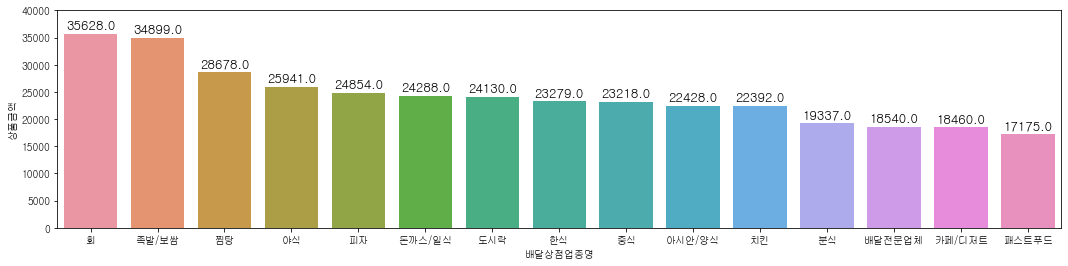

In [682]:
# 업종별 객단가 비교
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul_10k.groupby(['배달상점업종명'])['상품금액'].mean().reset_index().sort_values(by='상품금액',
                                                                                              ascending=False).round(),
            x='배달상점업종명', y='상품금액')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(top=40000)
plt.show()

### 주차별 객단가 추이

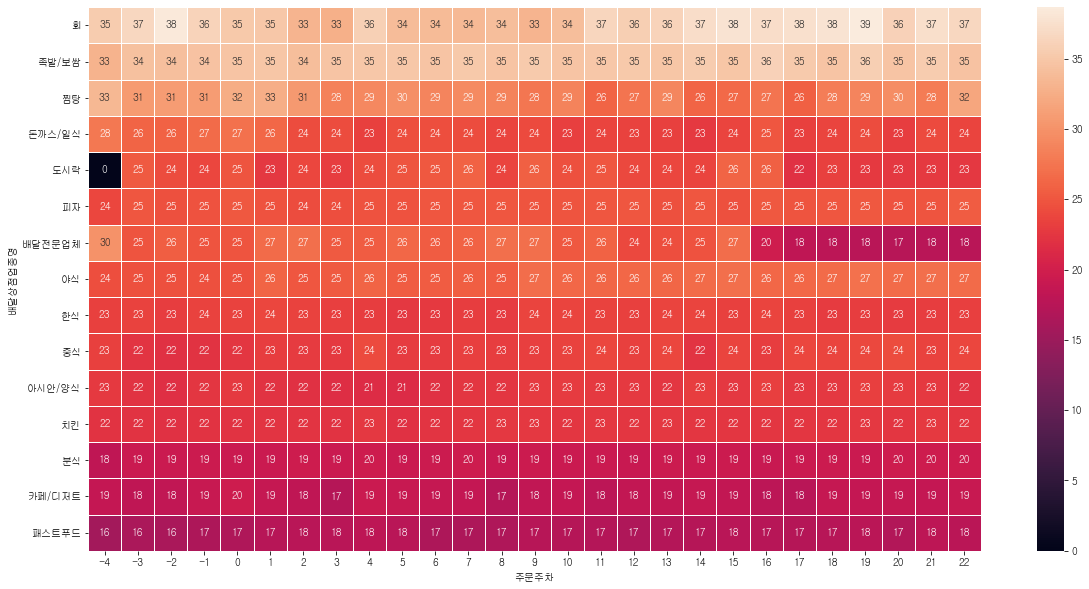

In [598]:
plt.figure(figsize=(20, 10))
sns.heatmap((dlvr_seoul_10k
             .groupby(['배달상점업종명', '주문주차'])['상품금액'].mean()
             .unstack()
             .fillna(0)
             .sort_values(by=-3, ascending=False)*0.001),
           annot=True, linewidths=.5)
plt.show()

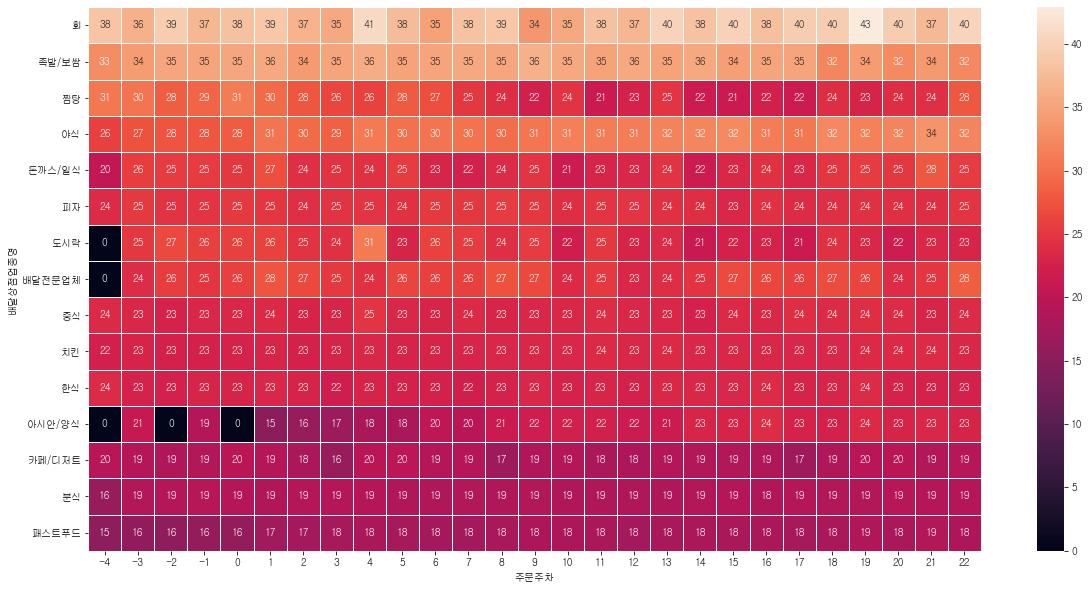

In [619]:
plt.figure(figsize=(20, 10))
sns.heatmap((dlvr_seoul_10k.loc[dlvr_seoul_10k.배달상점시군구명 == '구로구']
             .groupby(['배달상점업종명', '주문주차'])['상품금액'].mean()
             .unstack()
             .fillna(0)
             .sort_values(by=-3, ascending=False)*0.001),
           annot=True, linewidths=.5)
plt.show()

### 주차별 주문건수 추이

In [640]:
# 업종별 1개 상점당 주차별 평균 주문건수
temp = (
    dlvr_seoul_10k
    .groupby(['배달상점업종명','배달상점ID', '주문주차'])['count'].sum()
    .unstack()
    .groupby(['배달상점업종명']).mean()
)

In [654]:
temp[21].sort_values()

배달상점업종명
찜탕         20.631579
도시락        25.000000
카페/디저트     26.172840
회          29.357143
야식         40.535714
한식         48.461538
족발/보쌈      63.444444
돈까스/일식     66.526316
치킨         77.687500
피자         84.176471
중식         85.125000
분식         85.800000
아시안/양식    114.875000
패스트푸드     155.526316
배달전문업체    330.750000
Name: 21, dtype: float64

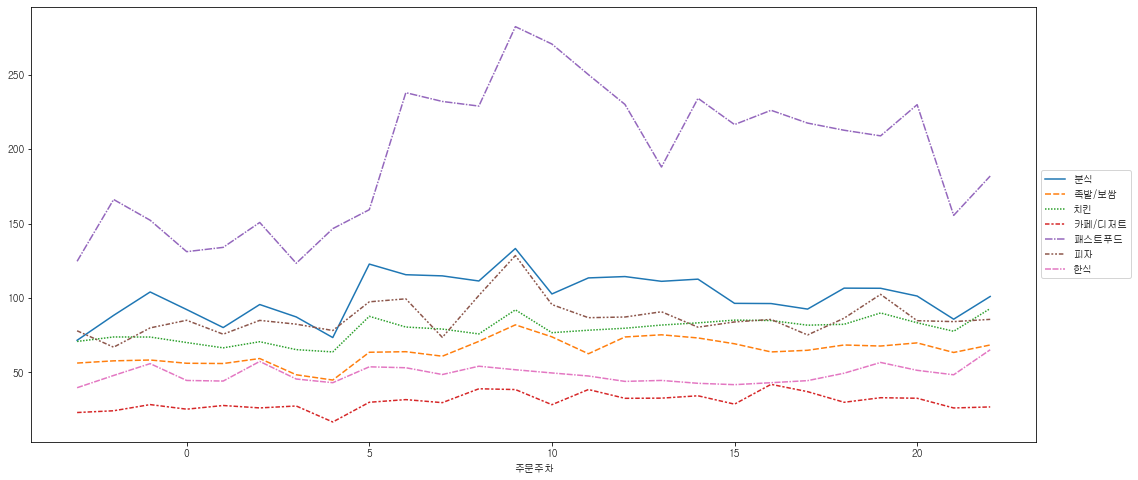

In [649]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['치킨', '분식', '패스트푸드', '카페/디저트', '족발/보쌈', '한식', '피자'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

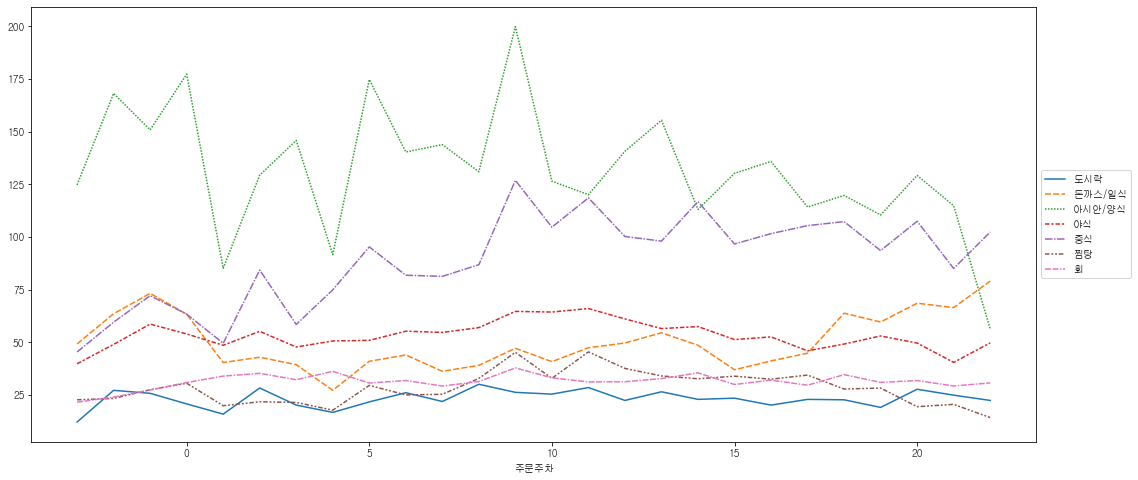

In [650]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['야식', '아시안/양식', '중식', '돈까스/일식', '회', '찜탕', '도시락'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 지역별 주차별 객단가 추이

In [684]:
# 업종별 1개 상점당 주차별 평균 주문건수
temp = (
    dlvr_seoul_10k.loc[dlvr_seoul_10k.배달상점시군구명 == '구로구']
    .groupby(['배달상점업종명','배달상점ID', '주문주차'])['count'].sum()
    .unstack()
    .groupby(['배달상점업종명']).mean()
)

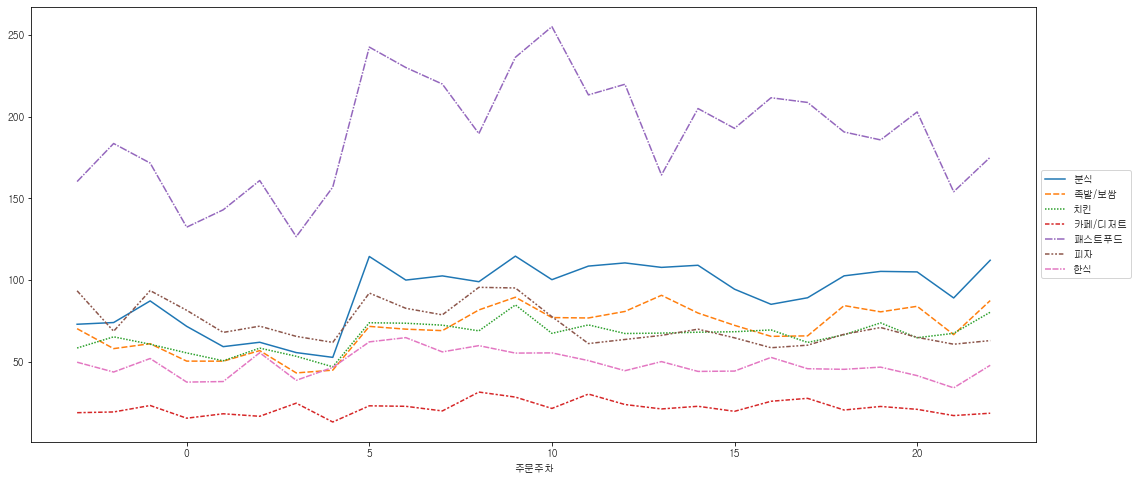

In [685]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['치킨', '분식', '패스트푸드', '카페/디저트', '족발/보쌈', '한식', '피자'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

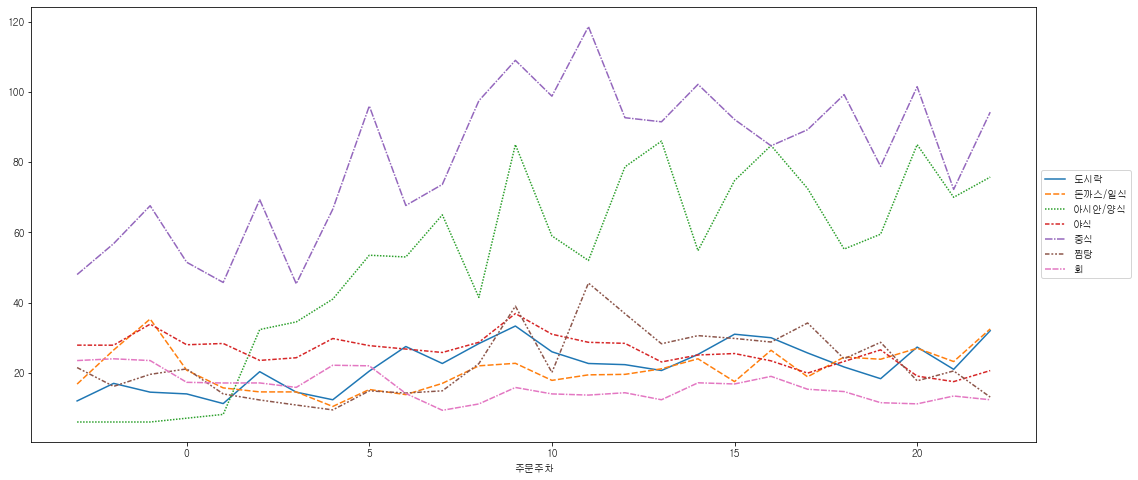

In [686]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['야식', '아시안/양식', '중식', '돈까스/일식', '회', '찜탕', '도시락'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [687]:
# 업종별 1개 상점당 주차별 평균 주문건수
temp = (
    dlvr_seoul_10k.loc[dlvr_seoul_10k.배달상점시군구명 == '영등포구']
    .groupby(['배달상점업종명','배달상점ID', '주문주차'])['count'].sum()
    .unstack()
    .groupby(['배달상점업종명']).mean()
)

In [694]:
(dlvr_seoul_10k.loc[(dlvr_seoul_10k.배달상점시군구명 == '영등포구') & (dlvr_seoul_10k.배달상점업종명 == '아시안/양식')]
    .groupby(['배달상점업종명','배달상점ID', '주문주차'])['count'].sum()
    .unstack())

주문주차               -4     -3     -2     -1      0      1      2      3   \
배달상점업종명 배달상점ID                                                            
아시안/양식  S0021941   8.0  271.0  311.0  347.0  319.0  236.0  320.0  249.0   
        S0021949   NaN    NaN    NaN    NaN    NaN  115.0   88.0    NaN   
        S0021973  34.0  462.0  461.0  432.0  532.0  516.0  499.0  432.0   

주문주차                 4      5      6      7      8      9      10     11  \
배달상점업종명 배달상점ID                                                             
아시안/양식  S0021941  273.0  338.0   75.0    NaN    NaN    NaN    NaN    NaN   
        S0021949    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        S0021973  282.0  474.0  501.0  458.0  471.0  580.0  514.0  552.0   

주문주차                 12     13     14     15     16     17     18     19  \
배달상점업종명 배달상점ID                                                             
아시안/양식  S0021941    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        S0021949    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        S0021973  487.0  560.0  503.0  515.0  506.0  398.0  516.0  454.0   

주문주차                 20     21  
배달상점업종명 배달상점ID                  
아시안/양식  S0021941    NaN    NaN  
        S0021949    NaN    NaN  
        S0021973  466.0  443.0

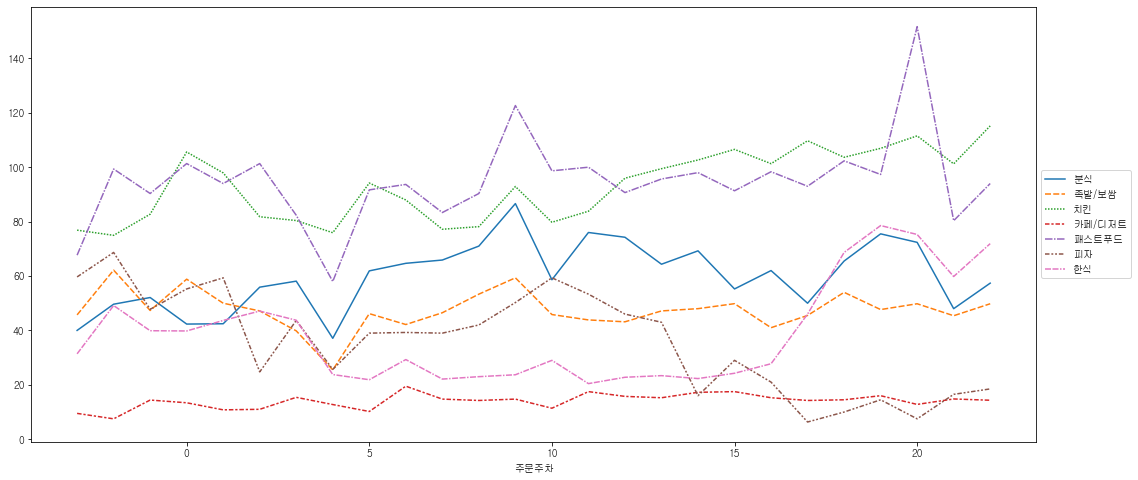

In [688]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['치킨', '분식', '패스트푸드', '카페/디저트', '족발/보쌈', '한식', '피자'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

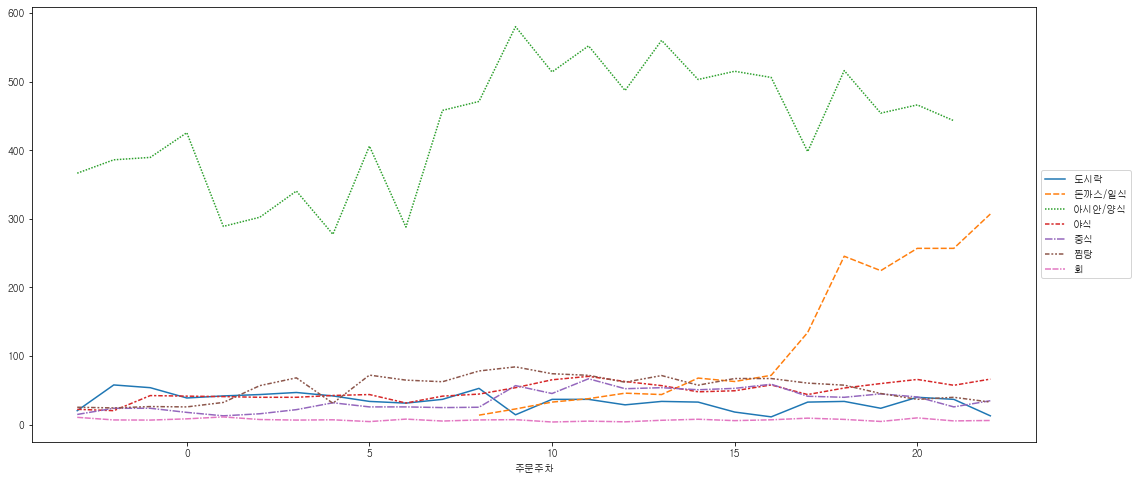

In [689]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['야식', '아시안/양식', '중식', '돈까스/일식', '회', '찜탕', '도시락'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## PATIENT

- 코로나 확진자의 증가여부는 배달주문건수에 영향을 미치는가?

In [266]:
patient = pd.read_csv(covid19_path + '\\PatientInfo.csv')

In [267]:
patient_soodokwon = patient.loc[patient.province.isin(['Seoul', 'Gyeonggi-do', 'Incheon'])]

In [268]:
patient_soodokwon = patient_soodokwon.groupby(['province', 'city', 'confirmed_date'])['patient_id'].count().reset_index()

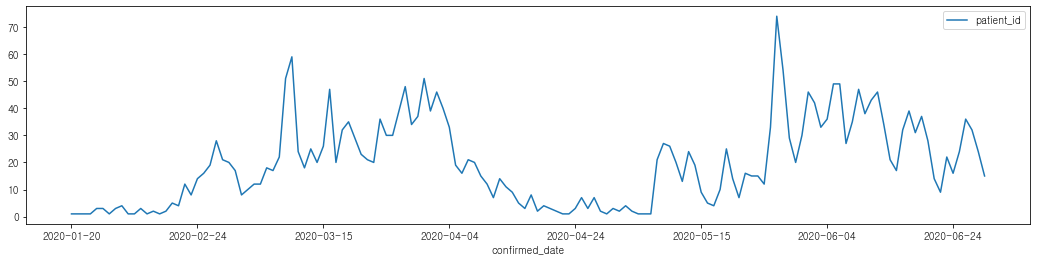

In [269]:
patient_soodokwon.groupby(['confirmed_date']).sum().plot(kind='line', figsize=(18, 4))
plt.show()

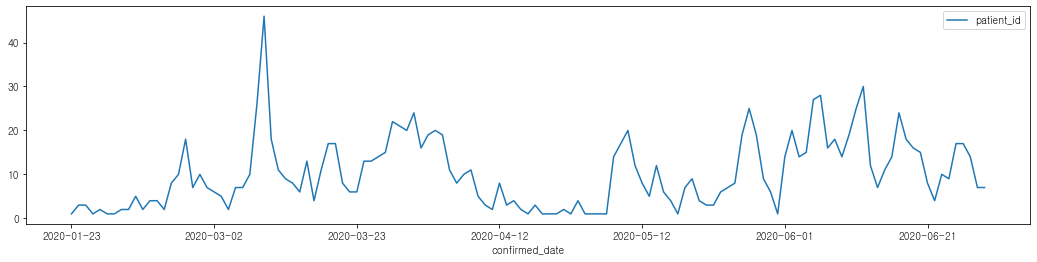

In [270]:
patient_soodokwon.loc[patient_soodokwon.province == 'Seoul'].groupby(['confirmed_date']).sum().plot(kind='line', figsize=(18, 4))
plt.show()

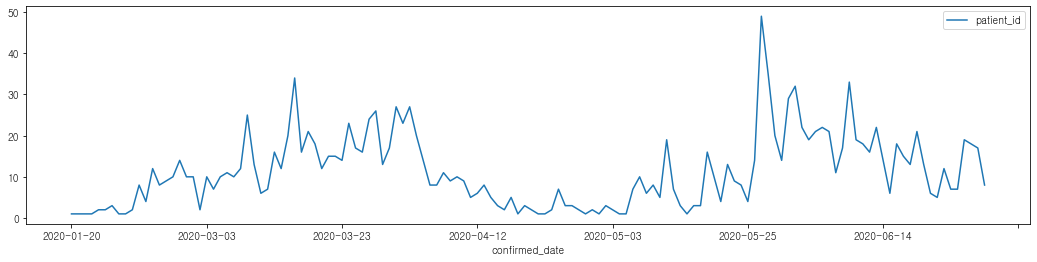

In [271]:
patient_soodokwon.loc[patient_soodokwon.province != 'Seoul'].groupby(['confirmed_date']).sum().plot(kind='line', figsize=(18, 4))
plt.show()

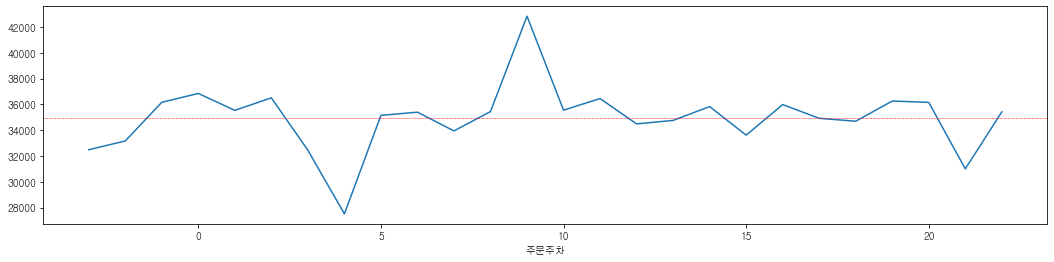

In [305]:
dlvr_seoul_uncanceled.loc[dlvr_seoul_uncanceled.주문주차 != -4].groupby(['주문주차'])['순번'].count().plot(kind='line',
                                                                                                 figsize=(18, 4))
plt.axhline(y = dlvr_seoul_uncanceled.loc[dlvr_seoul_uncanceled.주문주차 != -4].groupby(['주문주차'])['순번'].count().mean(),
            color = 'r', linestyle = '--', linewidth = 0.5)
plt.show()

- 갑자기 주문량이 폭주한 저 날은 언제인가...
- 3월 1일입니다.
- 문제는 일별 주문건수가 전혀 증가하는 추세가 아니라는 점입니다. 꾸준히 유지되고 있습니다.

In [273]:
dlvr_noseoul_uncanceled = dlvr_uncanceled.loc[dlvr_uncanceled.배달상점광역시도명 != '서울특별시']

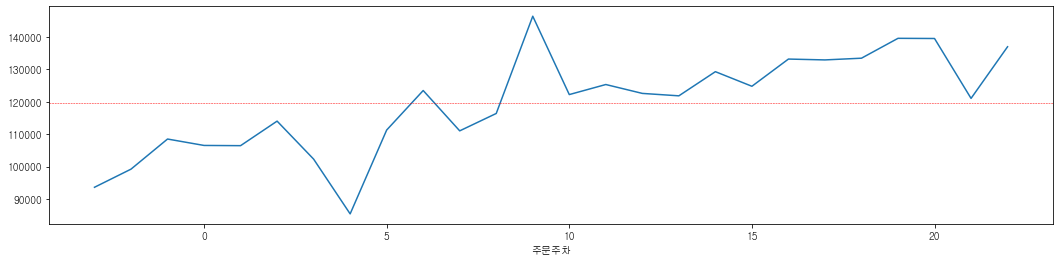

In [307]:
dlvr_noseoul_uncanceled.loc[dlvr_noseoul_uncanceled.주문주차 != -4].groupby(['주문주차'])['순번'].count().plot(kind='line',
                                                                                                     figsize=(18, 4))
plt.axhline(y = dlvr_noseoul_uncanceled.loc[dlvr_noseoul_uncanceled.주문주차 != -4].groupby(['주문주차'])['순번'].count().mean(),
            color = 'r', linestyle = '--', linewidth = 0.5)
plt.show()

- 경기도 지역은 증가하는 추세에 있습니다.

In [292]:
temp = dlvr_uncanceled.groupby(['주문월', '배달상점업종명'])['순번'].count().reset_index()
temp['주문월'] = temp.주문월.replace({12:0})

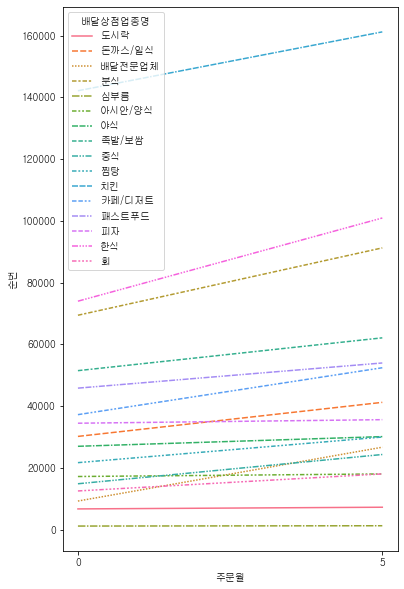

In [298]:
plt.figure(figsize=(6, 10))
sns.lineplot(data=temp.loc[temp.주문월.isin([0, 5])], x='주문월', y='순번', hue='배달상점업종명', style='배달상점업종명')
plt.xticks(ticks=[0, 5])
plt.show()

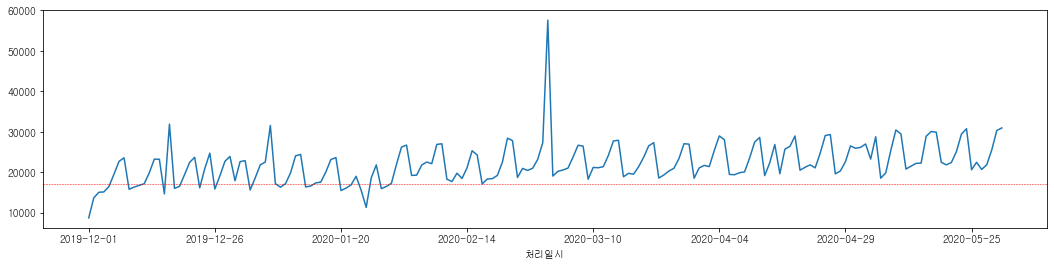

In [277]:
dlvr_uncanceled.groupby(['처리일시'])['순번'].count().plot(kind='line', figsize=(18, 4))
plt.axhline(y = dlvr_noseoul_uncanceled.groupby(['처리일시'])['순번'].count().mean(),
            color = 'r', linestyle = '--', linewidth = 0.5)
plt.show()

## CANCELED ORDER

## 지역별

In [248]:
dlvr.columns

Index(['순번', '처리일시', '배달요청업체ID', '배달요청상태값', '배달접수업체ID', '배달상점ID', '배달상점업종명',
       '배달상점법정동코드', '배달상점광역시도명', '배달상점시군구명', '배달상점법정동명', '배달상점리명', '배달상점행정동코드',
       '배달상점도로명주소코드', '배달목적지법정동코드', '배달목적지광역시도명', '배달목적지시군구명', '배달목적지법정동명',
       '배달목적지리명', '배달목적지행정동코드', '배달목적지도로명주소코드', '배달자ID', '배달금액', '호출중계수수료금액',
       '상품금액', '결제종류값', '결제카드명', '배달접수시간', '배달배차시간', '배달수령시간', '배달완료시간',
       '배달취소시간', '접수to배차', '접수to수령', '접수to완료', '배차to수령', '배차to완료', '수령to완료',
       '접수to취소', '배차to취소', '수령to취소', '완료to취소', '접수to배차minutes',
       '접수to수령minutes', '접수to완료minutes', '배차to수령minutes', '배차to완료minutes',
       '수령to완료minutes', '접수to취소minutes', '배차to취소minutes', '수령to취소minutes',
       '완료to취소minutes'],
      dtype='object')

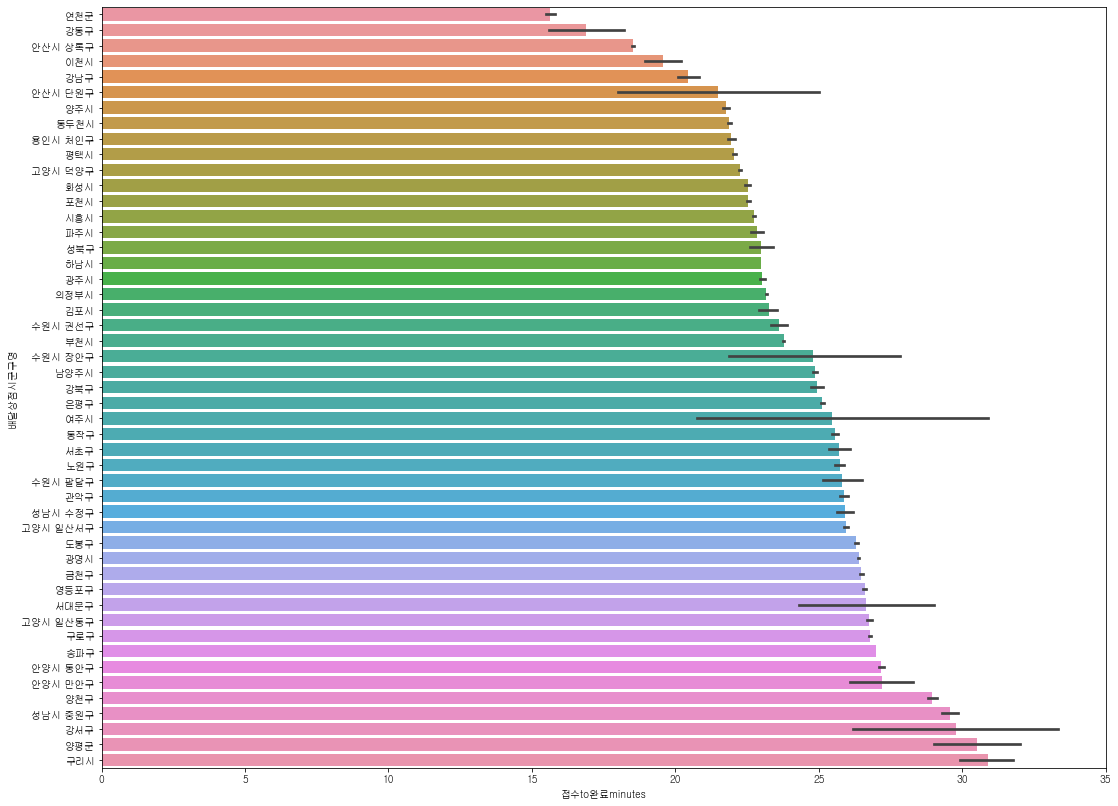

In [252]:
plt.figure(figsize=(18, 14))
sns.barplot(data=dlvr_uncanceled, y='배달상점시군구명', x='접수to완료minutes',
           order=dlvr_uncanceled.groupby(['배달상점시군구명'])['접수to완료minutes'].mean().sort_values().index)
plt.show()

# REGION OPEN CLOSE

- 1:창업 0:폐업

In [40]:
region_cols = ['인덱스','날짜','업종명','광역시도명','시군구명','읍면동','위도값','경도값','구분']
region = pd.read_csv(kt_data_path + '\\StartupOrClosing_Region_ver2.csv', header=0, names=region_cols)

In [41]:
# 1: 창업
# 0: 폐업
region.loc[region.구분 == 1, '구분'] = '창업'
region.loc[region.구분 == 0, '구분'] = '폐업'

In [44]:
region['광역시도명'] = region.광역시도명.replace({'경기도': '경기', '전라남도':'전남'})

In [46]:
region['위도값'] = region.위도값.str.replace('*','')
region['경도값'] = region.경도값.str.replace('*','')

region['위도값'] = region.위도값.astype(np.float32)
region['경도값'] = region.경도값.astype(np.float32)

In [47]:
# 업종명에 맞춰서 배달상점업종명을 만들어줍니다.
# 정말 힘들었습니다.

region.loc[region.업종명.isin(['한식', '육류.고기요리', '칼국수', '곱창.양구이', '오리고기', '냉면', '장어',
                            '한정식', '해물.생선요리', '닭갈비', '국수', '삼겹살', '돼지갈비', '게요리',
                            '낙지요리', '오징어요리', '한우고기', '쭈꾸미요리', '막국수', '두부요리', '전복요리',
                            '쌈밥', '닭요리', '순두부', '보리밥', '비빕밥', '흙돼지', '코다리전문', '오리요리',
                            '음식점-닭요리전문', '닭집', '밀면', '콩국수', '한식배달', '비빕밥', '굴요리']),
           '배달상점업종명'] = '한식'

region.loc[region.업종명.isin(['감자탕', '추어탕', '사철.영양탕', '순대.순대국', '부대찌개', '음식점-생태/동태/명태요리전문',
                            '설렁탕', '삼계탕', '해장국', '샤브샤브', '곰탕', '소머리국밥', '매운탕', '찌개.전골', '찜닭',
                            '돼지국밥', '어죽', '순대국밥', '백숙', '붕어찜', '소고기국밥', '버섯요리', '대구탕', '어죽',
                            '아귀요리', '복어요리', '조개구이']),
           '배달상점업종명'] = '찜탕'

region.loc[region.업종명.isin(['카페', '제과점', '떡집', '음료제조(종합)', '빵.과자', '떡.한과', '핫도그', '샌드위치',
                            '카페-디저트', '토스트', '전통찻집', '호두과자', '도너츠', '감자튀김', '와플전문점',
                           '케이크전문점', '오메기떡판매', '수제파이', '보리빵']),
           '배달상점업종명'] = '카페/디저트'

region.loc[region.업종명.isin(['양식', '베트남음식', '패밀리레스토랑', '퓨전음식', '태국음식', '양고기',
                            '스파게티', '이탈리아요리', '인도음식', '스페인요리', '멕시코요리', '동남아음식']),
           '배달상점업종명'] = '아시안/양식'

region.loc[region.업종명.isin(['일식', '참치요리', '돈가스', '일식튀김.꼬치', '우동', '초밥.롤', '철판구이']),
           '배달상점업종명'] = '일식'

region.loc[region.업종명.isin(['횟집', '홍어', '수산물음식점', '문어요리']),
           '배달상점업종명'] = '회'

region.loc[region.업종명.isin(['분식', '김밥', '떡볶이', '라면', '주먹밥']),
           '배달상점업종명'] = '분식'

region.loc[region.업종명.isin(['중국음식', '음식점-마라탕', '만두']), '배달상점업종명'] = '중식'
region.loc[region.업종명.isin(['치킨', '닭강정']), '배달상점업종명'] = '치킨'
region.loc[region.업종명.isin(['패스트푸드(종합)', '햄버거']), '배달상점업종명'] = '패스트푸드'
region.loc[region.업종명.isin(['닭발', '야식']), '배달상점업종명'] = '야식'
region.loc[region.업종명.isin(['피자']), '배달상점업종명'] = '피자'
region.loc[region.업종명.isin(['도시락']), '배달상점업종명'] = '도시락'
region.loc[region.업종명.isin(['족발.보쌈']), '배달상점업종명'] = '족발/보쌈'

In [48]:
region_food = region.loc[~region.배달상점업종명.isnull()].reset_index(drop=True)

In [51]:
region_food

인덱스        날짜   업종명 광역시도명       시군구명  읍면동        위도값         경도값  구분  \
0         3  20200101    한식    강원    영월군 영월읍  영흥리  37.187000  128.473007  창업   
1         5  20200101  돼지국밥    경남  창원시 마산합포구   현동  35.146999  128.557007  창업   
2         7  20200102   햄버거    경기    용인시 처인구  완장리  37.155998  127.172997  창업   
3        13  20200102  중국음식    광주         북구  용두동  35.213001  126.875999  창업   
4        15  20200102   삼계탕    제주    제주시 조천읍  함덕리  33.542999  126.654999  창업   
...     ...       ...   ...   ...        ...  ...        ...         ...  ..   
9818  67244  20200630    한식    제주      서귀포시   도순동  33.252998  126.470001  폐업   
9819  67247  20200630    치킨    부산         남구  대연동  35.151001  129.089005  폐업   
9820  67248  20200630    한식    서울        성동구  행당동  37.558998  127.040001  폐업   
9821  67249  20200630    카페    대전         서구  관저동  36.306000  127.343002  폐업   
9822  67255  20200630   떡볶이    경기    성남시 분당구  야탑동  37.411999  127.128998  폐업   

     배달상점업종명  
0         한식  
1         찜탕  
2      패스트푸드  
3         분식  
4         찜탕  
...      ...  
9818      한식  
9819      치킨  
9820      한식  
9821  카페/디저트  
9822      분식  

[9823 rows x 10 columns]

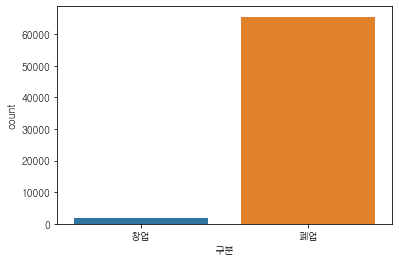

In [52]:
sns.countplot(data=region, x='구분')
plt.show()

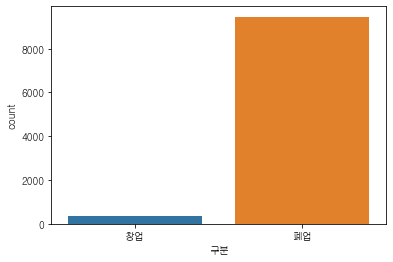

In [53]:
sns.countplot(data=region_food, x='구분')
plt.show()

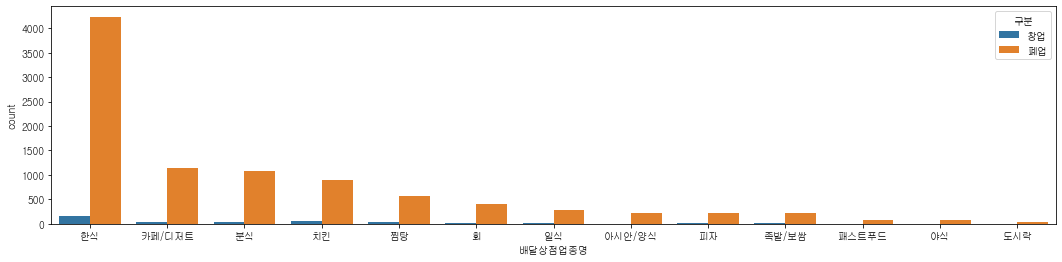

In [54]:
plt.figure(figsize=(18, 4))
sns.countplot(data=region_food, x='배달상점업종명', hue='구분',
             order=region_food.groupby(['배달상점업종명'])['인덱스'].count().sort_values(ascending=False).index)
plt.show()

- 한식은 폐업도 많지만 창업도 많습니다. 그러나 압도적으로 많은 것도 사실입니다.
- 그 뒤로 카페/디저트, 분식, 치킨, 찜탕이 뒤를 잇습니다.

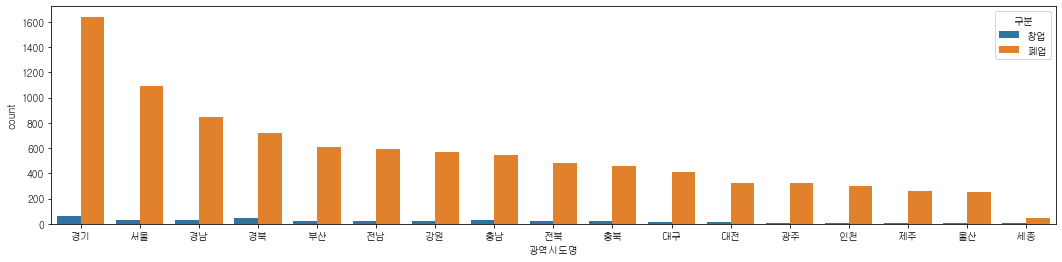

In [55]:
plt.figure(figsize=(18, 4))
sns.countplot(data=region_food, x='광역시도명', hue='구분',
             order=region_food.groupby(['광역시도명'])['인덱스'].count().sort_values(ascending=False).index)
plt.show()

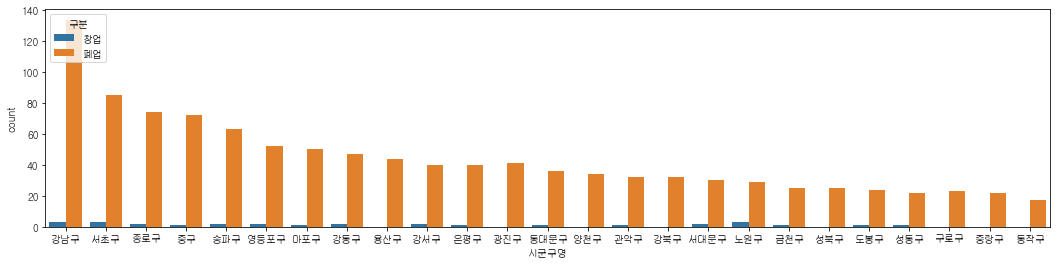

In [56]:
plt.figure(figsize=(18, 4))
sns.countplot(data=region_food.loc[region_food.광역시도명 == '서울'], x='시군구명', hue='구분', hue_order=['창업', '폐업'],
             order=region_food.loc[region_food.광역시도명 == '서울'].groupby(['시군구명'])['인덱스'].count().sort_values(ascending=False).index)
plt.show()

- 구별로 배달상점업종별 폐업건수를 살펴보고자 합니다.

In [72]:
goos = region_food.loc[region_food.광역시도명 == '서울'].groupby(['시군구명'])['인덱스'].count().sort_values(ascending=False).index

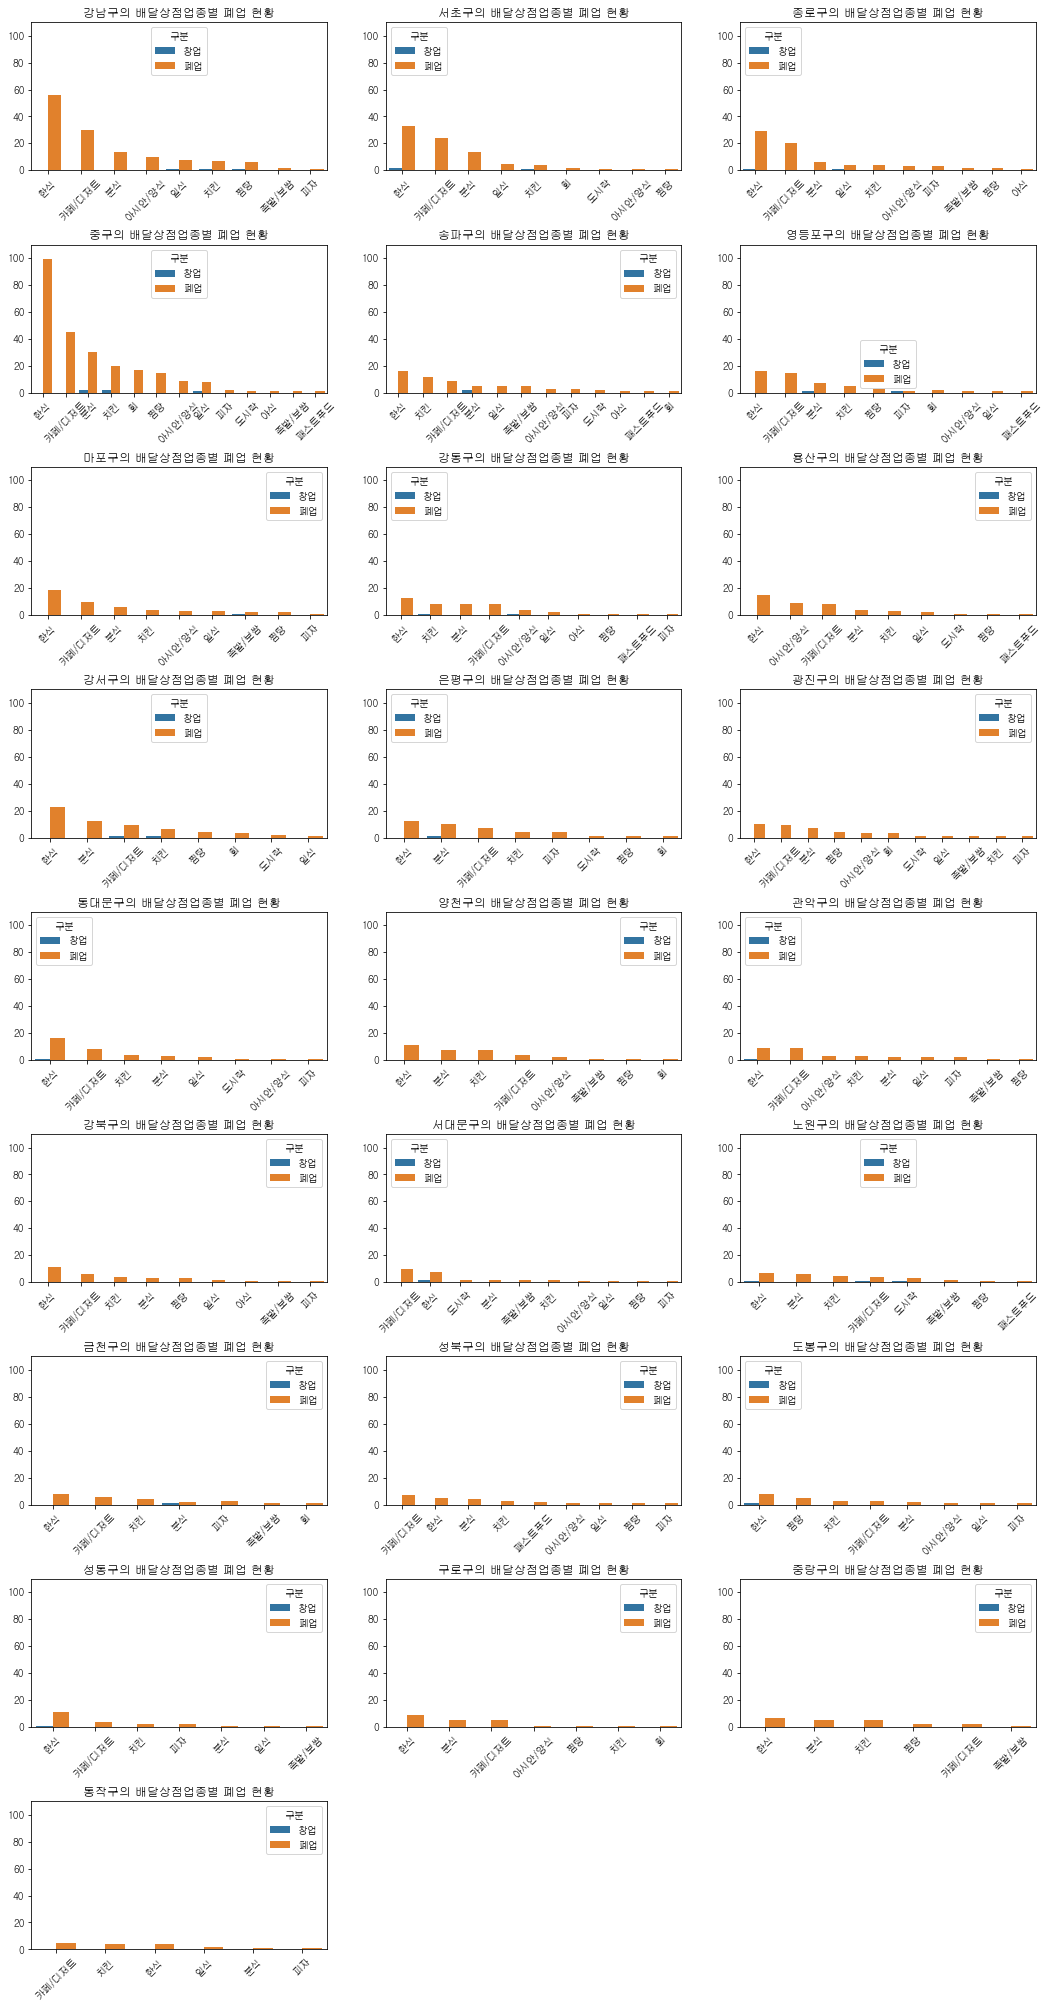

In [90]:
fig = plt.figure(figsize=(18, 60))
for i, goo in enumerate(goos):
    plt.subplot(15, 3, i+1)
    sns.countplot(data=region_food.loc[region_food.시군구명 == goo], x='배달상점업종명', hue='구분', hue_order=['창업', '폐업'],
                 order=region_food.loc[region_food.시군구명 == goo].groupby(['배달상점업종명'])['인덱스'].count().sort_values(ascending=False).index)
    plt.subplots_adjust(hspace=0.5)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('{}의 배달상점업종별 폐업 현황'.format(goo))
    plt.ylim(top = 110)
    plt.xticks(rotation=45)

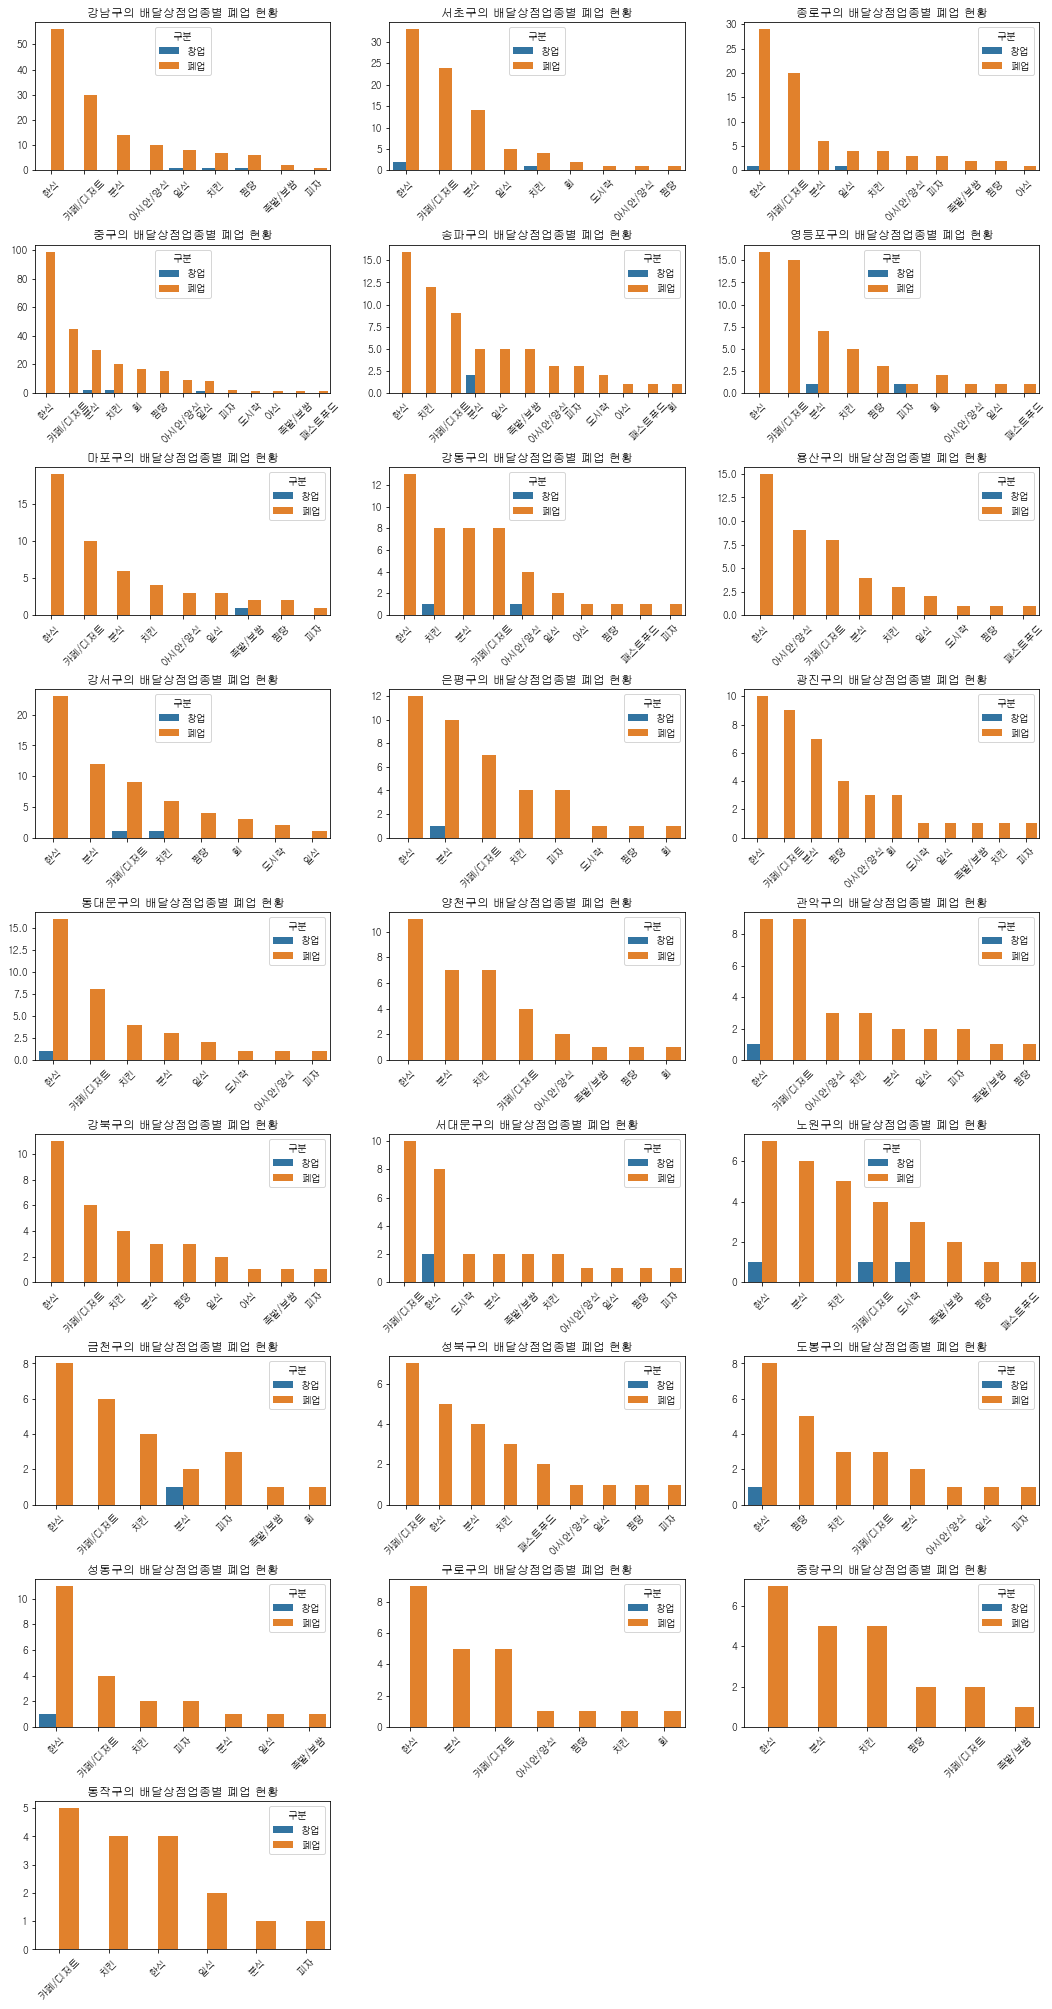

In [91]:
fig = plt.figure(figsize=(18, 60))
for i, goo in enumerate(goos):
    plt.subplot(15, 3, i+1)
    sns.countplot(data=region_food.loc[region_food.시군구명 == goo], x='배달상점업종명', hue='구분', hue_order=['창업', '폐업'],
                 order=region_food.loc[region_food.시군구명 == goo].groupby(['배달상점업종명'])['인덱스'].count().sort_values(ascending=False).index)
    plt.subplots_adjust(hspace=0.5)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('{}의 배달상점업종별 폐업 현황'.format(goo))
    #plt.ylim(top = 110)
    plt.xticks(rotation=45)

- 한식의 안에서는 도대체 무슨 일이 벌어지고 있는 것인가?

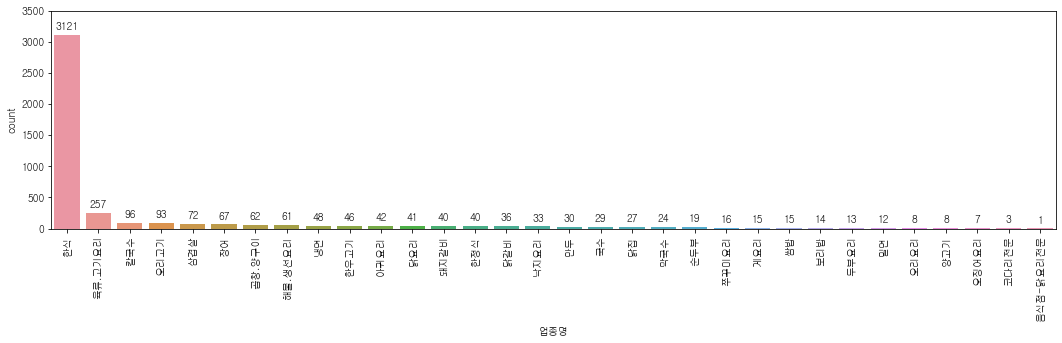

In [99]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=region_food.loc[region_food.배달상점업종명 == '한식'], x='업종명', #hue='구분', hue_order=['창업', '폐업'],
             order=region_food.loc[region_food.배달상점업종명 == '한식'].groupby(['업종명'])['인덱스'].count().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top = 3500)
plt.xticks(rotation=90)
plt.show()

- 일반 한식류가 압도적으로 높습니다. 사실 한식류 안에 다양한 세부 업종이 나뉠 것으로 보이지만, 알 수 없습니다.
- 이를 알려면 가게 이름으로 파악을 해야겠습니다.

In [100]:
region.head()

인덱스        날짜        업종명 광역시도명       시군구명  읍면동        위도값         경도값  구분  \
0    1  20200101        부동산    경기    용인시 처인구  봉명리  37.109001  127.130997  창업   
1    2  20200101  토목공학엔지니어링    인천         서구  오류동  37.598000  126.612999  창업   
2    3  20200101         한식    강원    영월군 영월읍  영흥리  37.187000  128.473007  창업   
3    4  20200101      보일러판매    대전         중구   목동  36.335999  127.403000  창업   
4    5  20200101       돼지국밥    경남  창원시 마산합포구   현동  35.146999  128.557007  창업   

  배달상점업종명  
0     NaN  
1     NaN  
2      한식  
3     NaN  
4      찜탕

In [101]:
shop.head()

인덱스        날짜         업종명            상호    업종코드  구분
0    1  20200101        CCTV       (주)실라전자  319013   1
1    2  20200101  가공식품도매(기타)  송현동1986발효이야기  452199   1
2    3  20200101    가구판매(종합)       더갤러리전주점  571100   1
3    4  20200101   가정부.파출부소개        모두인력파출  839103   1
4    5  20200101      가정부업알선        모두인력파출  839101   1

In [57]:
region_food_seoul_closed = region_food.loc[(region_food.광역시도명 == '서울') & (region_food.구분 == '폐업')].reset_index()
region_food_seoul_closed.shape

(1093, 11)

In [58]:
region_food_chicken_seoul_closed = region_food.loc[(region_food.광역시도명 == '서울')
                                                   & (region_food.구분 == '폐업')
                                                   & (region_food.배달상점업종명 == '치킨')].reset_index()
region_food_chicken_seoul_closed.shape

(105, 11)

### REGION FOLIUM

https://dailyheumsi.tistory.com/144

In [59]:
import folium

In [60]:
folium.__version__

'0.12.1'

In [62]:
m = folium.Map(location=[37.558, 126.991], zoom_start=12)

for i in range(len(region_food_chicken_seoul_closed)):
    tooltip = region_food_chicken_seoul_closed.배달상점업종명[i]
    popup = region_food_chicken_seoul_closed.업종명[i]
    folium.Marker([region_food_chicken_seoul_closed.위도값[i], region_food_chicken_seoul_closed.경도값[i]], popup=popup, tooltip=tooltip).add_to(m)

# ALL_SHOP_DATA

## PREPROCESSING

In [5]:
all_shop_df = pd.read_csv(r'C:\Users\Wyatt\wyatt37\data\ktVisual\fulldata_07_24_04_P.csv', encoding='cp949')

In [66]:
all_shop_df.shape

(1856570, 60)

In [7]:
all_shop_df.head()

번호 개방서비스명     개방서비스id  개방자치단체코드                    관리번호     인허가일자  인허가취소일자  \
0   1  일반음식점  07_24_04_P   3600000  3600000-101-2014-00100  20140508      NaN   
1   2  일반음식점  07_24_04_P   3600000  3600000-101-2014-00059  20140319      NaN   
2   3  일반음식점  07_24_04_P   3600000  3600000-101-2014-00060  20140321      NaN   
3   4  일반음식점  07_24_04_P   3610000  3610000-101-2014-00098  20140612      NaN   
4   5  일반음식점  07_24_04_P   3610000  3610000-101-2012-00009  20120119      NaN   

   영업상태구분코드  영업상태명  상세영업상태코드 상세영업상태명 폐업일자  휴업시작일자  휴업종료일자  재개업일자  \
0         1  영업/정상         1      영업  NaN     NaN     NaN    NaN   
1         1  영업/정상         1      영업  NaN     NaN     NaN    NaN   
2         1  영업/정상         1      영업  NaN     NaN     NaN    NaN   
3         1  영업/정상         1      영업  NaN     NaN     NaN    NaN   
4         1  영업/정상         1      영업  NaN     NaN     NaN    NaN   

          소재지전화   소재지면적   소재지우편번호                       소재지전체주소  \
0           NaN   99.00  502831.0     광주광역시 서구 풍암동 682-1번지 (1층)   
1           NaN   82.60  502834.0       광주광역시 서구 화정동 70-61 (1층)   
2           NaN   26.40  502837.0     광주광역시 서구 화정동 332-9번지 (1층)   
3  062 369 1582  118.98  503831.0  광주광역시 남구 월산동 1048-182번지 (1층)   
4           NaN   85.00  503822.0         광주광역시 남구 양림동 374번지 2층   

                            도로명전체주소  도로명우편번호     사업장명          최종수정시점 데이터갱신구분  \
0      광주광역시 서구 송풍로17번길 5, 1층 (풍암동)  62052.0    라캄파넬라  20170207142150       I   
1    광주광역시 서구 내방로350번길 10, 1층 (화정동)  61977.0       명가  20201230103940       U   
2  광주광역시 서구 월드컵4강로116번길 5, 1층 (화정동)  61984.0     승진이네  20191230101442       U   
3       광주광역시 남구 군분로 26-1, 1층 (월산동)  61615.0  갈비명가아라네  20200225093539       U   
4         광주광역시 남구 제중로 39, 2층 (양림동)  61643.0      뚱스넥  20190124144413       U   

                 데이터갱신일자 업태구분명        좌표정보(x)        좌표정보(y) 위생업태명  남성종사자수  \
0  2018-08-31 23:59:59.0   경양식  187771.639116  179969.196777   경양식     NaN   
1  2021-01-01 02:40:00.0    한식  188873.020499   184152.82843    한식     NaN   
2  2020-01-01 02:40:00.0    한식  188322.201767  183130.570776    한식     NaN   
3  2020-02-27 02:40:00.0    한식  190363.418899  181905.028328    한식     NaN   
4  2019-01-26 02:40:00.0    한식  192085.702260  182111.703093    한식     NaN   

   여성종사자수 영업장주변구분명 등급구분명 급수시설구분명  총종업원수  본사종업원수  공장사무직종업원수  공장판매직종업원수  \
0     NaN      NaN   NaN   상수도전용    NaN     NaN        NaN        NaN   
1     NaN      NaN   NaN   상수도전용    NaN     NaN        NaN        NaN   
2     NaN      NaN   NaN   상수도전용    NaN     NaN        NaN        NaN   
3     NaN       기타    자율     NaN    NaN     NaN        NaN        NaN   
4     2.0       기타    기타   상수도전용    NaN     NaN        NaN        NaN   

   공장생산직종업원수 건물소유구분명  보증액  월세액 다중이용업소여부   시설총규모 전통업소지정번호 전통업소주된음식  홈페이지  \
0        NaN     NaN  NaN  NaN        N   99.00      NaN      NaN   NaN   
1        NaN     NaN  NaN  NaN        N   82.60      NaN      NaN   NaN   
2        NaN     NaN  NaN  NaN        N   26.40      NaN      NaN   NaN   
3        NaN     NaN  NaN  NaN        N  118.98      NaN      NaN   NaN   
4        NaN     NaN  NaN  NaN        N   85.00      NaN      NaN   NaN   

   Unnamed: 47  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [8]:
all_shop_df.describe().T

count          mean            std           min  \
번호           1950134.0  9.750675e+05  562955.339266  1.000000e+00   
개방자치단체코드     1950134.0  4.039037e+06  864071.445201  3.000000e+06   
인허가일자        1950134.0  2.004766e+07  170370.353996  1.992000e+03   
인허가취소일자            0.0           NaN            NaN           NaN   
영업상태구분코드     1950134.0  2.302796e+00       0.953056  1.000000e+00   
상세영업상태코드     1950134.0  1.651398e+00       0.476528  1.000000e+00   
휴업시작일자             0.0           NaN            NaN           NaN   
휴업종료일자             0.0           NaN            NaN           NaN   
재개업일자              0.0           NaN            NaN           NaN   
소재지우편번호      1886166.0  4.164664e+05  205535.733557  1.000110e+05   
도로명우편번호      1102899.0  2.887881e+04   18650.174584  1.000000e+03   
좌표정보(x)      1847456.0  2.449693e+05   77036.122816 -9.184002e+03   
남성종사자수       1024796.0  1.908985e-01       1.007101 -1.000000e+00   
여성종사자수       1040118.0  3.212357e-01       1.025029 -1.000000e+00   
총종업원수          17800.0  0.000000e+00       0.000000  0.000000e+00   
본사종업원수         48796.0  0.000000e+00       0.000000  0.000000e+00   
공장사무직종업원수      48792.0  0.000000e+00       0.000000  0.000000e+00   
공장판매직종업원수      48792.0  0.000000e+00       0.000000  0.000000e+00   
공장생산직종업원수      48792.0  0.000000e+00       0.000000  0.000000e+00   
보증액            48796.0  0.000000e+00       0.000000  0.000000e+00   
시설총규모        1930612.0  7.562695e+01     200.771566  0.000000e+00   
홈페이지               0.0           NaN            NaN           NaN   
Unnamed: 47        0.0           NaN            NaN           NaN   

                      25%           50%           75%           max  
번호           4.875342e+05  9.750675e+05  1.462601e+06  1.950134e+06  
개방자치단체코드     3.290000e+06  3.820000e+06  4.640000e+06  6.520000e+06  
인허가일자        1.998041e+07  2.004102e+07  2.013113e+07  9.187061e+07  
인허가취소일자               NaN           NaN           NaN           NaN  
영업상태구분코드     1.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  
상세영업상태코드     1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  
휴업시작일자                NaN           NaN           NaN           NaN  
휴업종료일자                NaN           NaN           NaN           NaN  
재개업일자                 NaN           NaN           NaN           NaN  
소재지우편번호      2.009110e+05  4.299300e+05  6.078040e+05  7.998230e+05  
도로명우편번호      1.211200e+04  2.649400e+04  4.600800e+04  6.364400e+04  
좌표정보(x)      1.918238e+05  2.074521e+05  3.045117e+05  5.461052e+05  
남성종사자수       0.000000e+00  0.000000e+00  0.000000e+00  1.200000e+02  
여성종사자수       0.000000e+00  0.000000e+00  0.000000e+00  1.120000e+02  
총종업원수        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
본사종업원수       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
공장사무직종업원수    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
공장판매직종업원수    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
공장생산직종업원수    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
보증액          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
시설총규모        2.761000e+01  4.930000e+01  9.142000e+01  1.080480e+05  
홈페이지                  NaN           NaN           NaN           NaN  
Unnamed: 47           NaN           NaN           NaN           NaN

### DROP_NULL_COLUMNS_AND_VALUES

In [9]:
all_shop_df.drop(['인허가취소일자', '휴업시작일자', '휴업종료일자', '재개업일자', '홈페이지', 'Unnamed: 47'], axis=1, inplace=True)

In [10]:
all_shop_df.loc[all_shop_df.소재지전체주소.isnull()].도로명전체주소.apply(lambda x: x.split(' ')[0]).value_counts()

전라남도       1050
충청남도        482
충청북도        473
경기도         409
경상남도        374
전라북도        247
서울특별시       237
경상북도        224
강원도         208
울산광역시       125
제주특별자치도     123
인천광역시        86
부산광역시        46
대전광역시        27
대구광역시        25
세종특별자치시      18
광주광역시         9
Name: 도로명전체주소, dtype: int64

- 소재지전체주소의 결측치가 약 5천건 존재하는데, 서울시의 결측치가 237건이기에 drop을 해주겠습니다.
- 도로명주소를 넣어주려면 동단위까지 주소가 나오지 않기 때문에(사실 번거롭기 때문에) 제외를 해주겠습니다.

In [11]:
# 소재지전체주소에 결측치가 있는 레코드를 드랍해줍니다.
all_shop_df = all_shop_df.loc[~all_shop_df.소재지전체주소.isnull()].reset_index()

### 인허가일자

In [12]:
all_shop_df.인허가일자.max(), all_shop_df.인허가일자.min()

(91870608, 1992)

- 1086년이면 고려시대...9187년이면...인류가 멸망했을지도...

In [13]:
all_shop_df = all_shop_df.loc[(all_shop_df.인허가일자 >= 19700000) & (all_shop_df.인허가일자 <= 20210731)].reset_index(drop=True)

In [14]:
pd.to_datetime(str(all_shop_df.인허가일자[1]) + ' 00:00:00')

Timestamp('2014-03-19 00:00:00')

In [15]:
# datetime64 타입으로 변환해주겠습니다.
new_date = []
for i in tqdm(range(len(all_shop_df))):
    try:
        new_date.append(pd.to_datetime(str(all_shop_df.인허가일자[i]) + ' 00:00:00'))
    except:
        new_date.append('drop')

100%|█████████████████████████████████████████████| 1944472/1944472 [02:12<00:00, 14696.33it/s]


In [16]:
all_shop_df['new_date'] = new_date

In [17]:
all_shop_df = all_shop_df.loc[all_shop_df.new_date != 'drop'].reset_index(drop=True)

In [18]:
all_shop_df['인허가일자'] = pd.to_datetime(all_shop_df.new_date)

In [19]:
all_shop_df['인허가일자년'] = all_shop_df.인허가일자.dt.year.astype(str)
all_shop_df['인허가일자월'] = all_shop_df.인허가일자.dt.month.astype(str)
all_shop_df['인허가일자일'] = all_shop_df.인허가일자.dt.day
all_shop_df['인허가일자요일'] = all_shop_df.인허가일자.dt.weekday
all_shop_df['인허가일자주'] = all_shop_df.인허가일자.dt.weekofyear

In [20]:
# 시간연속성을위해 연월 컬럼을 만듭니다.
all_shop_df.loc[~all_shop_df.인허가일자월.isin(['10', '11', '12']), '인허가일자년월'] = all_shop_df.인허가일자년 + '0' + all_shop_df.인허가일자월
all_shop_df.loc[all_shop_df.인허가일자월.isin(['10', '11', '12']), '인허가일자년월'] = all_shop_df.인허가일자년 + all_shop_df.인허가일자월

### 폐업일자

폐업일자는 nan값이 존재하기 때문에 object로 되어 있습니다.

In [21]:
all_shop_df['폐업일자'] = all_shop_df.폐업일자.fillna(-1)

In [22]:
all_shop_df['폐업일자'] = all_shop_df.폐업일자.apply(lambda x: str(x).replace(' ', '0'))

In [23]:
all_shop_df['폐업일자'] = all_shop_df.폐업일자.astype(float)
all_shop_df['폐업일자'] = all_shop_df.폐업일자.astype(int)

In [24]:
all_shop_df.폐업일자.max(), all_shop_df.폐업일자.min()

(97020212, -1)

In [25]:
# datetime64 타입으로 변환해주겠습니다.
new_date = []
for i in tqdm(range(len(all_shop_df))):
    try:
        new_date.append(pd.to_datetime(str(all_shop_df.폐업일자[i]) + ' 00:00:00'))
    except:
        new_date.append(np.nan)

100%|█████████████████████████████████████████████| 1944453/1944453 [02:46<00:00, 11711.03it/s]


In [26]:
all_shop_df['new_date'] = new_date

In [27]:
all_shop_df['폐업일자'] = pd.to_datetime(all_shop_df.new_date)

In [28]:
all_shop_df['폐업일자년'] = all_shop_df.폐업일자.dt.year.astype(str)
all_shop_df['폐업일자월'] = all_shop_df.폐업일자.dt.month.astype(str)
all_shop_df['폐업일자일'] = all_shop_df.폐업일자.dt.day
all_shop_df['폐업일자요일'] = all_shop_df.폐업일자.dt.weekday
all_shop_df['폐업일자주'] = all_shop_df.폐업일자.dt.weekofyear

In [29]:
# 시간연속성을위해 연월 컬럼을 만듭니다.
all_shop_df.loc[~all_shop_df.폐업일자월.isin(['10', '11', '12']), '폐업일자년월'] = all_shop_df.폐업일자년 + '0' + all_shop_df.폐업일자월
all_shop_df.loc[all_shop_df.폐업일자월.isin(['10', '11', '12']), '폐업일자년월'] = all_shop_df.폐업일자년 + all_shop_df.폐업일자월

In [30]:
all_shop_df['폐업일자년월'] = all_shop_df.폐업일자년월.replace('nan0nan', np.nan)

In [31]:
all_shop_df['폐업일자년월'] = all_shop_df.폐업일자년월.apply(lambda x: str(x).replace('.0', ''))

In [35]:
# 2021-07-31 이후에 폐업한 데이터가 30건 가량 있습니다...
# 1970-01-01 이전에 폐업한 데이터도 있습니다.. 다 날려줍니다. 전부 1899 로 입력되어 있는 것으로 봐서 오류가 있었던 것 같습니다.
all_shop_df = all_shop_df.loc[~(all_shop_df.폐업일자 > '2021-07-31') & ~(all_shop_df.폐업일자 < '1970-01-01')]

### 영업기간(영업, 폐업 따로)

- 인허가일자로부터 폐업일자, 폐업하지 않았다면 2021-07-31 일자 기준으로 영업기간을 산출하겠습니다.

In [121]:
# 폐업 업체의 영업기간을 산출해보겠습니다.
all_shop_df['폐업업체영업기간'] = all_shop_df.폐업일자 - all_shop_df.인허가일자

In [135]:
# 영업 업체의 영업기간을 산출해보겠습니다.
temp = (pd.to_datetime('2021-07-31 00:00:00')
        - all_shop_df.loc[all_shop_df.상세영업상태명 == '영업'].인허가일자).to_frame().rename({'인허가일자':'영업업체영업기간'},
                                                                                axis=1)
all_shop_df = pd.concat([all_shop_df, temp], axis=1)

### 소재지전체주소

In [53]:
# nan값이 아닌데도 주소가 비어있는 친구들이 있습니다....
# 이놈들 때문에 apply lambda도 에러고, .loc 도 에러입니다...
# 어쩔 수 없이 가장 리소스 많이 먹는 for문을 돌립니다.

add_0 = [] # 광역시도
add_1 = [] # 시군구
add_2 = [] # 읍면동
add_3 = [] # 번지

for i in tqdm(range(len(all_shop_df))):
    try:
        add_0.append(all_shop_df.소재지전체주소[i].split(' ')[0])
    except:
        add_0.append(np.nan)
    try:
        add_1.append(all_shop_df.소재지전체주소[i].split(' ')[1])
    except:
        add_1.append(np.nan)
    try:
        add_2.append(all_shop_df.소재지전체주소[i].split(' ')[2])
    except:
        add_2.append(np.nan)
    try:
        add_3.append(all_shop_df.소재지전체주소[i].split(' ')[3])
    except:
        add_3.append(np.nan)

100%|█████████████████████████████████████████████| 1900147/1900147 [02:02<00:00, 15491.33it/s]


In [54]:
len(all_shop_df), len(add_0), len(add_1), len(add_2), len(add_3)

(1900147, 1900147, 1900147, 1900147, 1900147)

In [55]:
# 만든 리스트를 변수로 넣어줍니다.
all_shop_df['소재지주소광역시도'] = add_0
all_shop_df['소재지주소시군구'] = add_1
all_shop_df['소재지주소읍면동'] = add_2
all_shop_df['소재지주소번지'] = add_3

In [56]:
# 주소지가 그래도 이상한 애들이 45건 있습니다. 제거하겠습니다.
all_shop_df = all_shop_df.loc[all_shop_df.소재지주소광역시도.isin(['서울특별시', '경기도', '경상남도', '부산광역시', '경상북도', '인천광역시',
                                           '강원도', '대구광역시', '충청남도', '전라남도', '충청북도', '전라북도', '대전광역시',
                                           '광주광역시', '울산광역시', '제주특별자치도', '세종특별자치시'])]

### 업태구분명

- 업태구분명 중에 음식점이 아닌 업종이 있습니다. 제거하겠습니다.
- 주로 술집...이동판매...뷔페...음식점과 상관없는 업종을 제거하겠습니다.

In [46]:
all_shop_df = all_shop_df.loc[~all_shop_df.업태구분명.isin(['정종/대포집/소주방', '감성주점', '기타 휴게음식점',
                                                       '룸살롱', '이동조리', '식품자동판매기영업', '전화권유판매',
                                                       '식품등 수입판매업', '관광호텔', '편의점', '즉석판매제조가공업',
                                                       '도매업(유통)', '방문판매', '집단급식소 식품판매업', '간이주점',
                                                       '식품소분업', '식품제조가공업', '193959.150482967', '식품첨가물제조업',
                                                       '제과점영업', '다방', '커피숍', '일반조리판매'])]

In [294]:
all_shop_df.업태구분명.unique()

array(['경양식', '한식', '기타', '김밥(도시락)', '중국식', '까페', '뷔페식', '호프/통닭', '분식',
       '일식', '패밀리레스트랑', '외국음식전문점(인도,태국등)', '식육(숯불구이)', '횟집', '통닭(치킨)',
       '패스트푸드', '회집', '탕류(보신용)', '전통찻집', '라이브카페', '복어취급', '출장조리', '냉면집',
       nan, '키즈카페'], dtype=object)

- 일부 겹치는 업종명이 있습니다. 정리를 해주겠습니다.
- 회집 -> 횟집

In [296]:
all_shop_df.loc[all_shop_df.업태구분명 == '회집', '업태구분명'] = '횟집'

### 마무리

In [511]:
# 쓰잘데기 없는 컬럼이 너무 많습니다. 일단 지워줍니다.
all_shop_df.drop(['개방서비스명', '개방서비스id', '영업상태구분코드', '영업상태명', '상세영업상태코드', '소재지전화',
                  '소재지전체주소', '도로명전체주소', '급수시설구분명'], axis=1, inplace=True)

In [52]:
all_shop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900147 entries, 0 to 1944452
Data columns (total 56 columns):
 #   Column     Dtype         
---  ------     -----         
 0   index      int64         
 1   번호         int64         
 2   개방서비스명     object        
 3   개방서비스id    object        
 4   개방자치단체코드   int64         
 5   관리번호       object        
 6   인허가일자      datetime64[ns]
 7   영업상태구분코드   int64         
 8   영업상태명      object        
 9   상세영업상태코드   int64         
 10  상세영업상태명    object        
 11  폐업일자       datetime64[ns]
 12  소재지전화      object        
 13  소재지면적      object        
 14  소재지우편번호    float64       
 15  소재지전체주소    object        
 16  도로명전체주소    object        
 17  도로명우편번호    float64       
 18  사업장명       object        
 19  최종수정시점     object        
 20  데이터갱신구분    object        
 21  데이터갱신일자    object        
 22  업태구분명      object        
 23  좌표정보(x)    float64       
 24  좌표정보(y)    object        
 25  위생업태명      object        
 26  남성종사자수     flo

In [513]:
all_shop_df.head(1)

index  번호  개방자치단체코드                    관리번호      인허가일자 상세영업상태명 폐업일자  소재지면적  \
0      0   1   3600000  3600000-101-2014-00100 2014-05-08      영업  NaT  99.00   

    소재지우편번호  도로명우편번호   사업장명          최종수정시점 데이터갱신구분                데이터갱신일자  \
0  502831.0  62052.0  라캄파넬라  20170207142150       I  2018-08-31 23:59:59.0   

  업태구분명        좌표정보(x)        좌표정보(y) 위생업태명  남성종사자수  여성종사자수 영업장주변구분명 등급구분명  \
0   경양식  187771.639116  179969.196777   경양식     NaN     NaN      NaN   NaN   

   총종업원수  본사종업원수  공장사무직종업원수  공장판매직종업원수  공장생산직종업원수 건물소유구분명  보증액  월세액 다중이용업소여부  \
0    NaN     NaN        NaN        NaN        NaN     NaN  NaN  NaN        N   

   시설총규모 전통업소지정번호 전통업소주된음식 new_date 인허가일자년 인허가일자월  인허가일자일  인허가일자요일  인허가일자주  \
0   99.0      NaN      NaN      NaT   2014      5       8        3      19   

  인허가일자년월 폐업일자년 폐업일자월  폐업일자일  폐업일자요일  폐업일자주 폐업일자년월 소재지주소광역시도 소재지주소시군구  \
0  201405   nan   nan    NaN     NaN    NaN    nan     광주광역시       서구   

  소재지주소읍면동  소재지주소번지  
0      풍암동  682-1번지

In [73]:
all_shop_df.loc[all_shop_df.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df.loc[all_shop_df.상세영업상태명 == '폐업', 'OC'] = 1

## VISUALIZATION

### 전기간 폐업률(1970~)

In [472]:
all_shop_df.columns

Index(['index', '번호', '개방자치단체코드', '관리번호', '인허가일자', '상세영업상태명', '폐업일자', '소재지면적',
       '소재지우편번호', '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명',
       '좌표정보(x)', '좌표정보(y)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명',
       '총종업원수', '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명',
       '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', 'new_date',
       '인허가일자년', '인허가일자월', '인허가일자일', '인허가일자요일', '인허가일자주', '인허가일자년월', '폐업일자년',
       '폐업일자월', '폐업일자일', '폐업일자요일', '폐업일자주', '폐업일자년월', '소재지주소광역시도', '소재지주소시군구',
       '소재지주소읍면동', '소재지주소번지'],
      dtype='object')

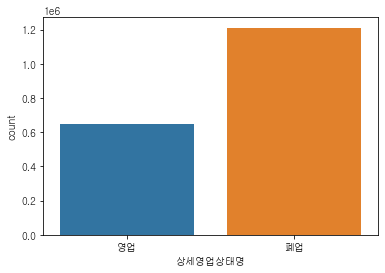

In [60]:
sns.countplot(data = all_shop_df, x='상세영업상태명')
plt.show()

#### 광역시도별 폐업률(1970~)

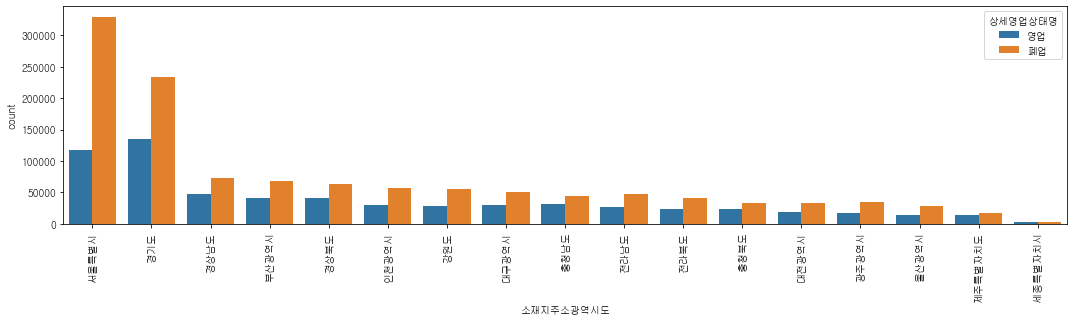

In [102]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df, x='소재지주소광역시도', hue='상세영업상태명',
             order = all_shop_df.groupby(['소재지주소광역시도'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

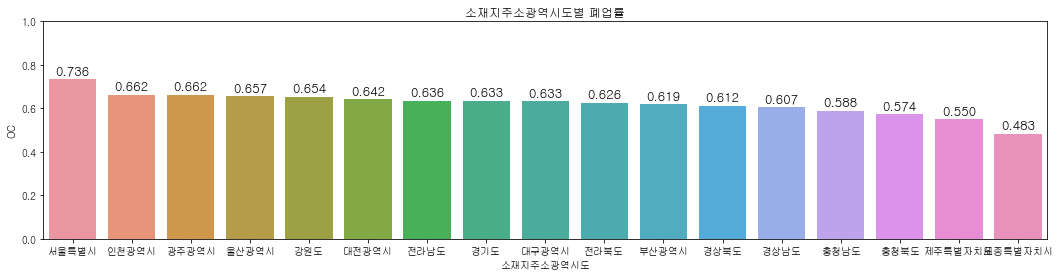

In [98]:
# pivot_table을 통해 폐업률을 추출합니다.
# 폐업률은 폐업한 점포의 수를 전체 인허가 점포 수로 나눈 값입니다. 즉, 오픈한 점포에 대해 폐업을 한 비율입니다.
plot = pd.pivot_table(all_shop_df, index="소재지주소광역시도", values="OC").sort_values(by=['OC'], ascending=False)

plt.figure(figsize=(18, 4))
plots = sns.barplot(data=plot, x=plot.index, y='OC')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.3f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top = 1)
plt.title('소재지주소광역시도별 폐업률')
plt.show()

#### 서울시 폐업률(1970~)

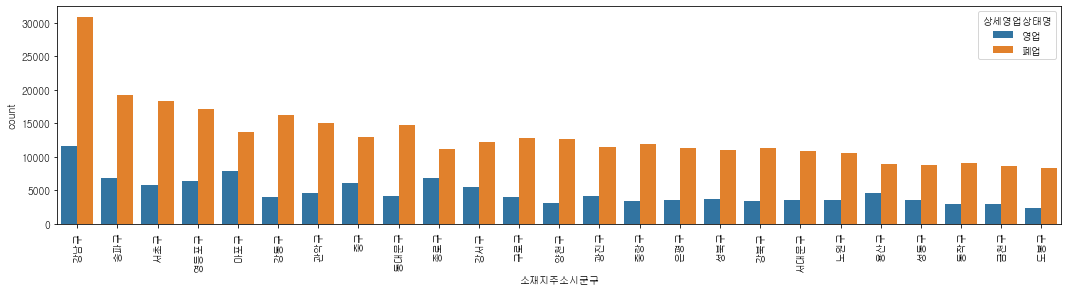

In [58]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df.loc[all_shop_df.소재지주소광역시도 == '서울특별시'], x='소재지주소시군구', hue='상세영업상태명',
             order = all_shop_df.loc[all_shop_df.소재지주소광역시도 == '서울특별시'].groupby(['소재지주소시군구'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

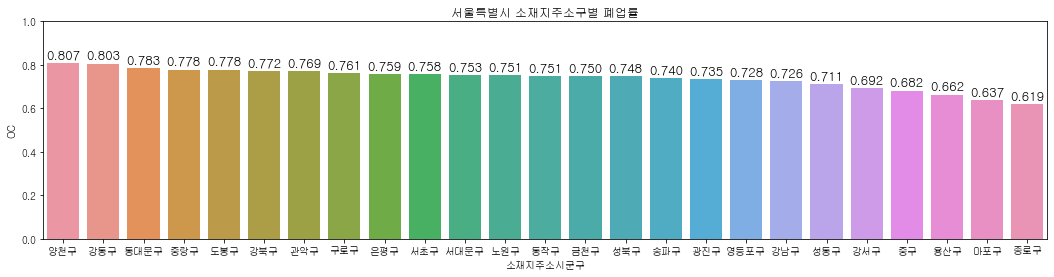

In [104]:
# pivot_table을 통해 폐업률을 추출합니다.
# 폐업률은 폐업한 점포의 수를 전체 인허가 점포 수로 나눈 값입니다. 즉, 오픈한 점포에 대해 폐업을 한 비율입니다.
plot = pd.pivot_table(all_shop_df.loc[all_shop_df.소재지주소광역시도 == '서울특별시'],
                      index="소재지주소시군구", values="OC").sort_values(by=['OC'], ascending=False)

plt.figure(figsize=(18, 4))
plots = sns.barplot(data=plot, x=plot.index, y='OC')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.3f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top = 1)
plt.title('서울특별시 소재지주소구별 폐업률')
plt.show()

#### 경기도 폐업률(1970~)

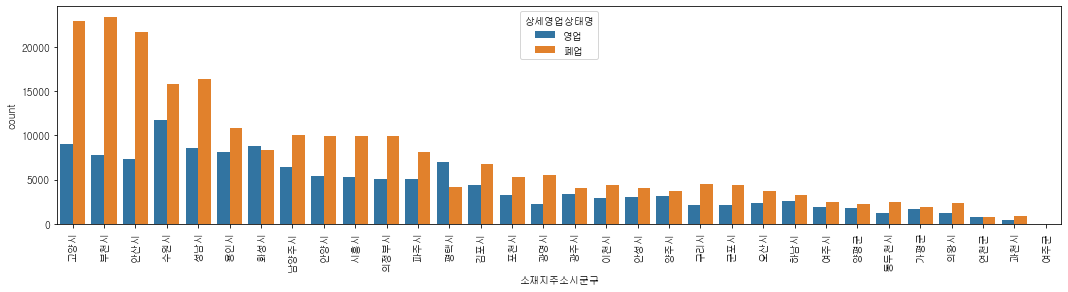

In [59]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df.loc[all_shop_df.소재지주소광역시도 == '경기도'], x='소재지주소시군구', hue='상세영업상태명',
             order = all_shop_df.loc[all_shop_df.소재지주소광역시도 == '경기도'].groupby(['소재지주소시군구'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

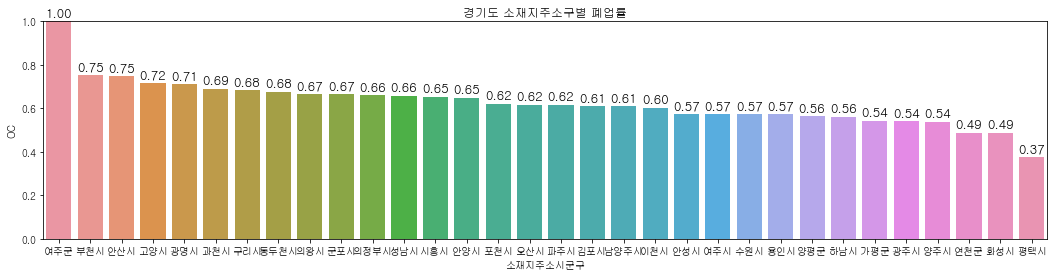

In [106]:
# pivot_table을 통해 폐업률을 추출합니다.
# 폐업률은 폐업한 점포의 수를 전체 인허가 점포 수로 나눈 값입니다. 즉, 오픈한 점포에 대해 폐업을 한 비율입니다.
plot = pd.pivot_table(all_shop_df.loc[all_shop_df.소재지주소광역시도 == '경기도'],
                      index="소재지주소시군구", values="OC").sort_values(by=['OC'], ascending=False)

plt.figure(figsize=(18, 4))
plots = sns.barplot(data=plot, x=plot.index, y='OC')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top = 1)
plt.title('경기도 소재지주소구별 폐업률')
plt.show()

#### 인허가일자년별 폐업추이(1970~)

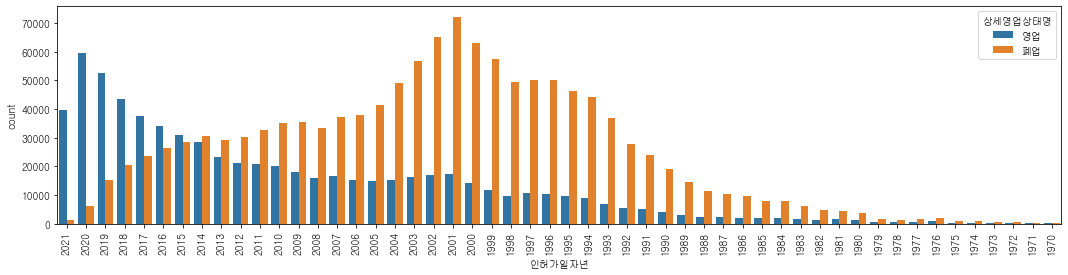

In [520]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df, x='인허가일자년', hue='상세영업상태명',
             order = all_shop_df.groupby(['인허가일자년'])['관리번호'].count().sort_index(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

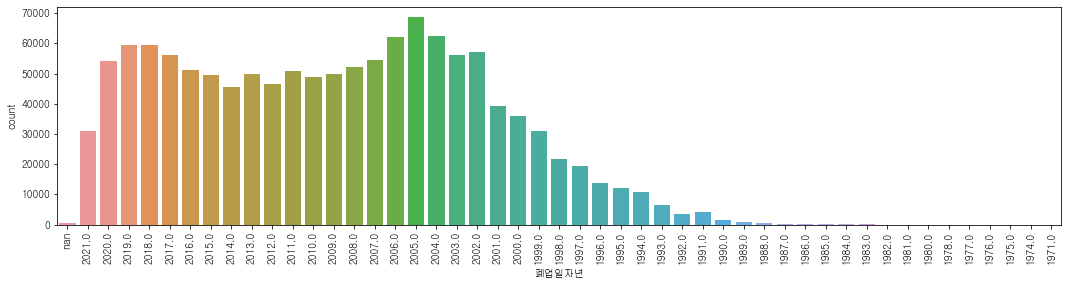

In [36]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df.loc[all_shop_df.상세영업상태명 == '폐업'], x='폐업일자년',
             order = all_shop_df.groupby(['폐업일자년'])['관리번호'].count().sort_index(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

#### 업태별 폐업률(1970~)

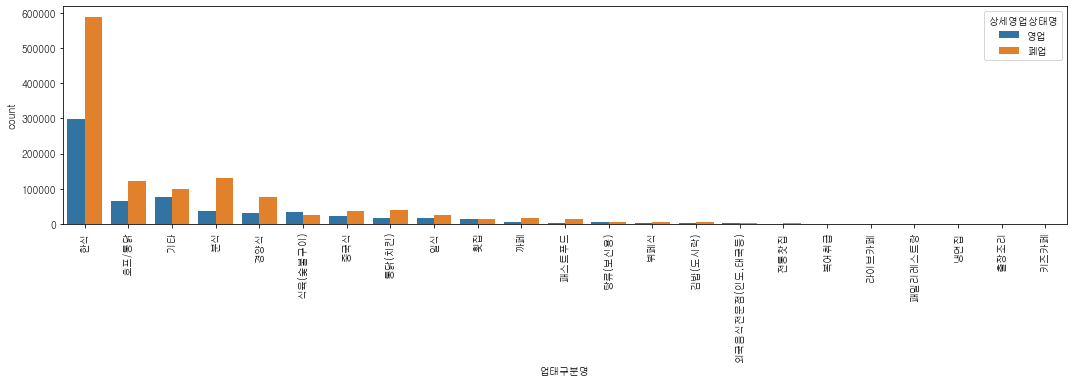

In [297]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df, x='업태구분명', hue='상세영업상태명',
             order = all_shop_df.groupby(['업태구분명'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

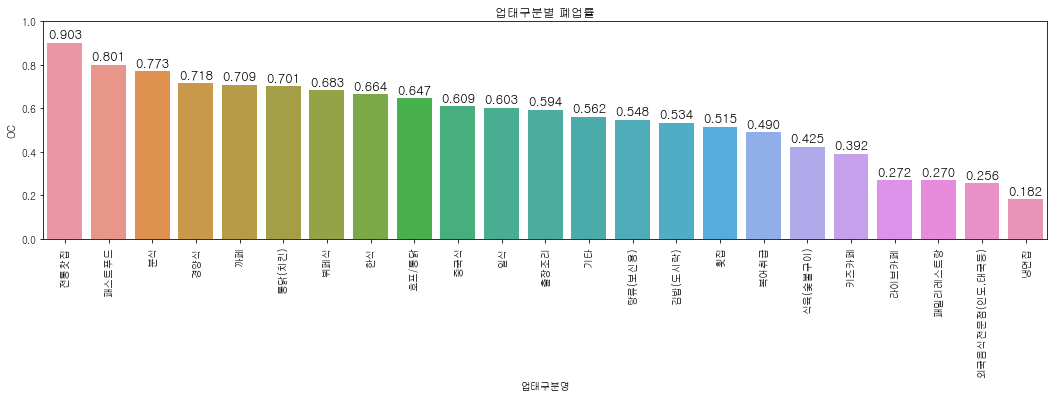

In [298]:
# pivot_table을 통해 폐업률을 추출합니다.
# 폐업률은 폐업한 점포의 수를 전체 인허가 점포 수로 나눈 값입니다. 즉, 오픈한 점포에 대해 폐업을 한 비율입니다.
plot = pd.pivot_table(all_shop_df, index="업태구분명", values="OC").sort_values(by=['OC'], ascending=False)

plt.figure(figsize=(18, 4))
plots = sns.barplot(data=plot, x=plot.index, y='OC')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.3f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top = 1)
plt.title('업태구분별 폐업률')
plt.xticks(rotation=90)
plt.show()

### ★코로나 이전 이후 폐업률 비교

- 기본적으로 폐업률은 해당 기간 이전에 폐업한 업체는 제외하고 영업중이던 업체만 기준으로 진행합니다.
- 비교를 위해서 동기간의 테이블을 추가로 만들고 두 기간을 비교하겠습니다.

In [301]:
# 2019년 12월 31일 이전에 폐업을 한 점포를 제거합니다.
# 2020.01.01 ~ 2021.07.31 까지
all_shop_df_after = all_shop_df.loc[~(all_shop_df.폐업일자 <= '2019-12-31')]

In [302]:
all_shop_df_after.loc[all_shop_df_after.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_after.loc[all_shop_df_after.상세영업상태명 == '폐업', 'OC'] = 1

In [303]:
# 기본적으로 인허가일자가 2019년 7월 31일 이후의 점포를 제거합니다.
# 그리고 폐업일자가 2017년 12월 31일 이전의 점포를 제거합니다.

# 2018.01.01 ~ 2019.07.31 까지
all_shop_df_before = all_shop_df.loc[~(all_shop_df.폐업일자 <= '2017-12-31') & (all_shop_df.인허가일자 <= '2019-07-31')]

# 2019년 7월 31일 이후로 폐업한 가게는 영업중인 것으로 바꿔줍니다.
all_shop_df_before.loc[all_shop_df_before.폐업일자 > '2019-07-31', '상세영업상태명'] = '영업'

# 마찬가지로 폐업일자도 바꿔줍니다.
all_shop_df_before.loc[all_shop_df_before.폐업일자 > '2019-07-31', '폐업일자'] = np.nan

In [304]:
all_shop_df_before.loc[all_shop_df_before.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_before.loc[all_shop_df_before.상세영업상태명 == '폐업', 'OC'] = 1

In [305]:
# 비교용으로 하나를 더 만들겠습니다.
# 기본적으로 인허가일자가 2017년 7월 31일 이후의 점포를 제거합니다.
# 그리고 폐업일자가 2015년 12월 31일 이전의 점포를 제거합니다.

# 2018.01.01 ~ 2019.07.31 까지
all_shop_df_before2 = all_shop_df.loc[~(all_shop_df.폐업일자 <= '2015-12-31') & (all_shop_df.인허가일자 <= '2017-07-31')]

# 2019년 7월 31일 이후로 폐업한 가게는 영업중인 것으로 바꿔줍니다.
all_shop_df_before2.loc[all_shop_df_before2.폐업일자 > '2017-07-31', '상세영업상태명'] = '영업'

# 마찬가지로 폐업일자도 바꿔줍니다.
all_shop_df_before2.loc[all_shop_df_before2.폐업일자 > '2017-07-31', '폐업일자'] = np.nan

In [306]:
all_shop_df_before2.loc[all_shop_df_before2.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_before2.loc[all_shop_df_before2.상세영업상태명 == '폐업', 'OC'] = 1

#### 광역시도별 폐업률

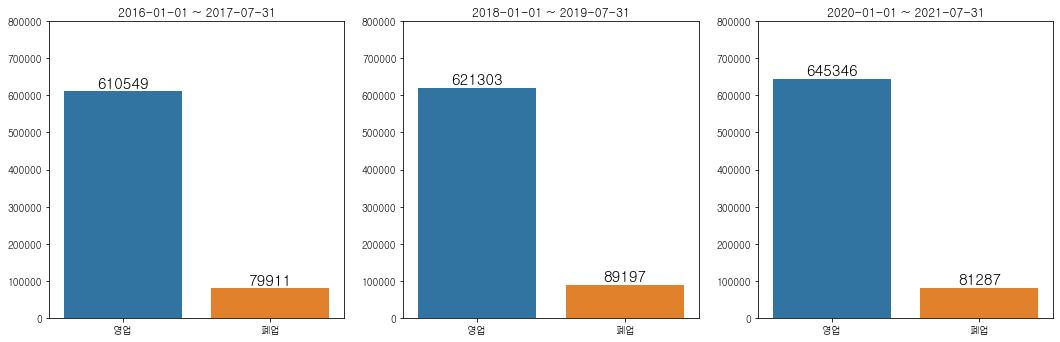

In [307]:
fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2, x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=800000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before, x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=800000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after, x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=800000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [308]:
print((len(all_shop_df_before2.loc[all_shop_df_before2.상세영업상태명 == '폐업']) / len(all_shop_df_before2))*100)
print((len(all_shop_df_before.loc[all_shop_df_before.상세영업상태명 == '폐업']) / len(all_shop_df_before))*100)
print((len(all_shop_df_after.loc[all_shop_df_after.상세영업상태명 == '폐업']) / len(all_shop_df_after))*100)

11.573588622078034
12.55411681914145
11.18680269131735


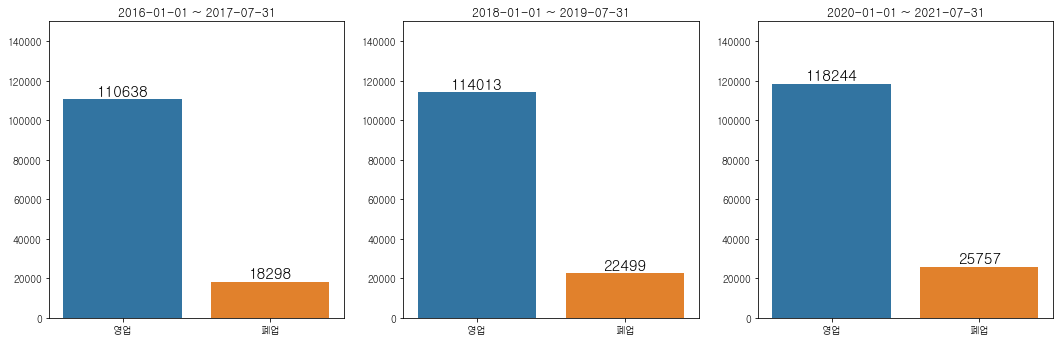

In [309]:
# 서울특별시

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '서울특별시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '서울특별시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '서울특별시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [310]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '서울특별시')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '서울특별시']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '서울특별시')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '서울특별시']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '서울특별시')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '서울특별시']))*100)

14.191536886517342
16.48133497421472
17.886681342490675


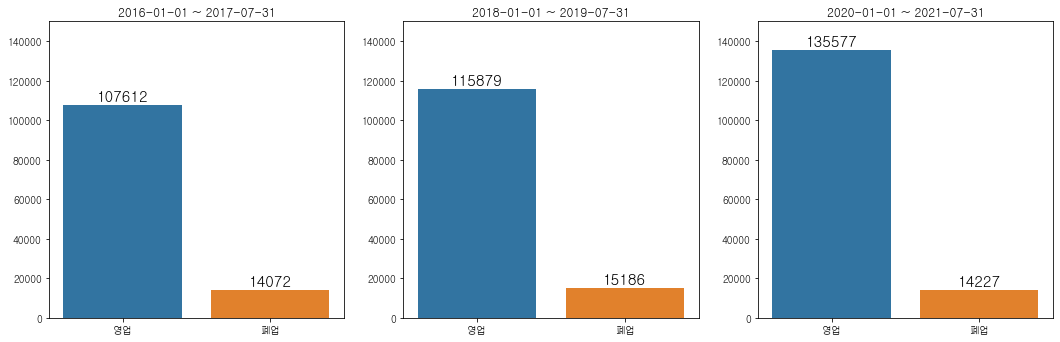

In [311]:
# 경기도

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '경기도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '경기도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '경기도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [312]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '경기도')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '경기도']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '경기도')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '경기도']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '경기도')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '경기도']))*100)

11.564379869169324
11.586617327280358
9.497076179541267


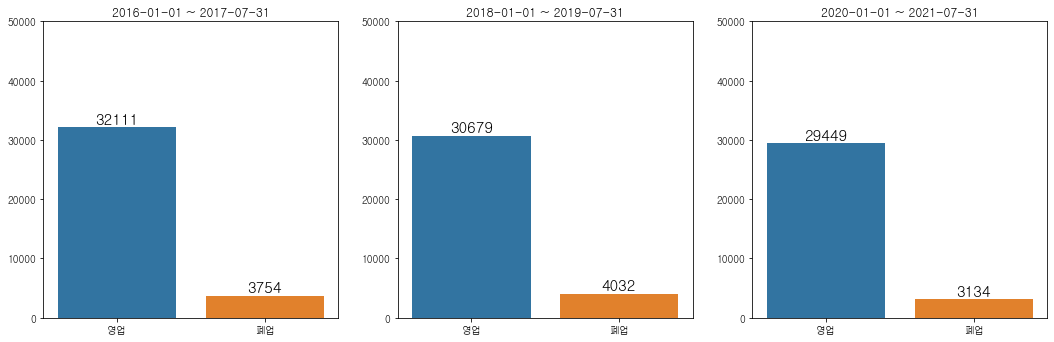

In [313]:
# 대구광역시

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '대구광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=50000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '대구광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=50000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '대구광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=50000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [314]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '대구광역시')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '대구광역시']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '대구광역시')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '대구광역시']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '대구광역시')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '대구광역시']))*100)

10.467029137041683
11.61591426348996
9.618512721357764


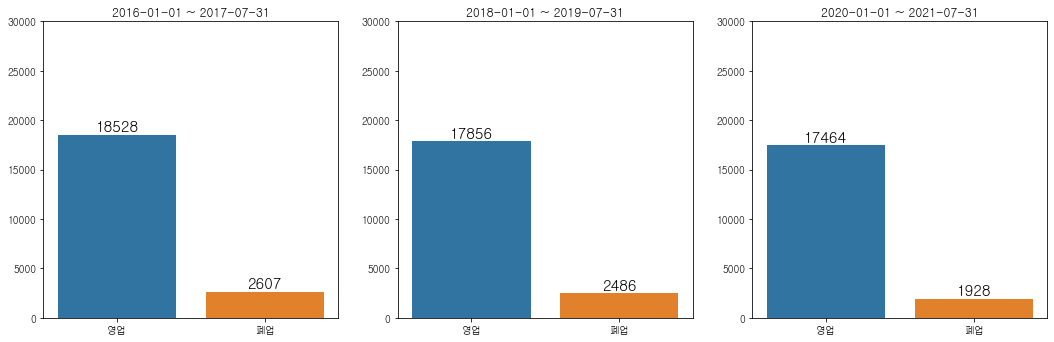

In [315]:
# 광주광역시

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '광주광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=30000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '광주광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=30000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '광주광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=30000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [316]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '광주광역시')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '광주광역시']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '광주광역시')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '광주광역시']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '광주광역시')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '광주광역시']))*100)

12.33498935415188
12.221020548618622
9.942244224422442


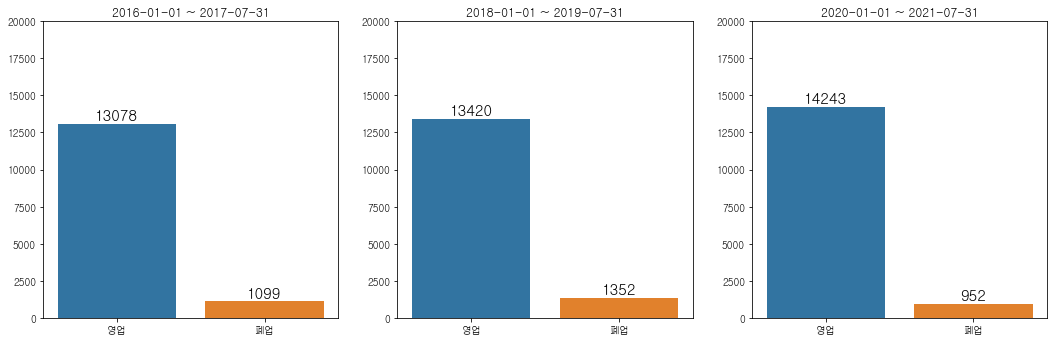

In [317]:
# 제주도

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '제주특별자치도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=20000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '제주특별자치도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=20000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '제주특별자치도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=20000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [318]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '제주특별자치도')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '제주특별자치도']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '제주특별자치도')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '제주특별자치도']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '제주특별자치도')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '제주특별자치도']))*100)

7.7519926641743675
9.152450582182507
6.265218821980915


#### 서울특별시_업종별

In [319]:
df_seoul_before2 = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '서울특별시']
df_seoul_before = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '서울특별시']
df_seoul_after = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '서울특별시']

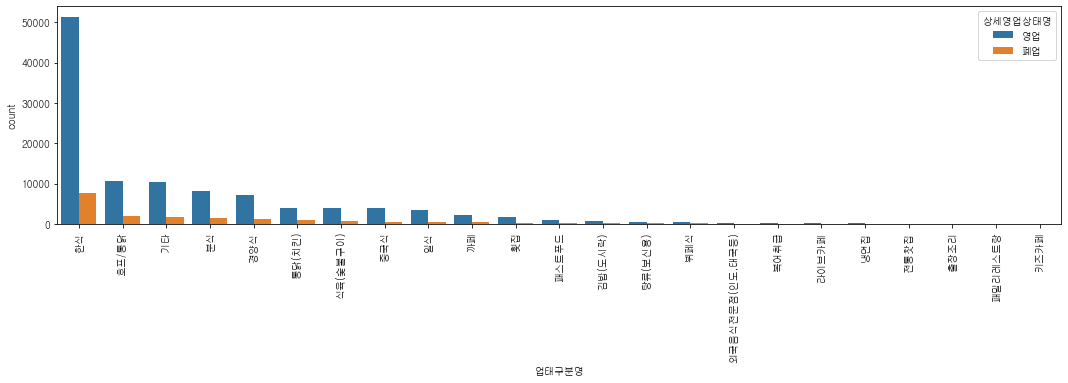

In [320]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_before2, x='업태구분명', hue='상세영업상태명',
             order=df_seoul_before2.groupby(['업태구분명'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

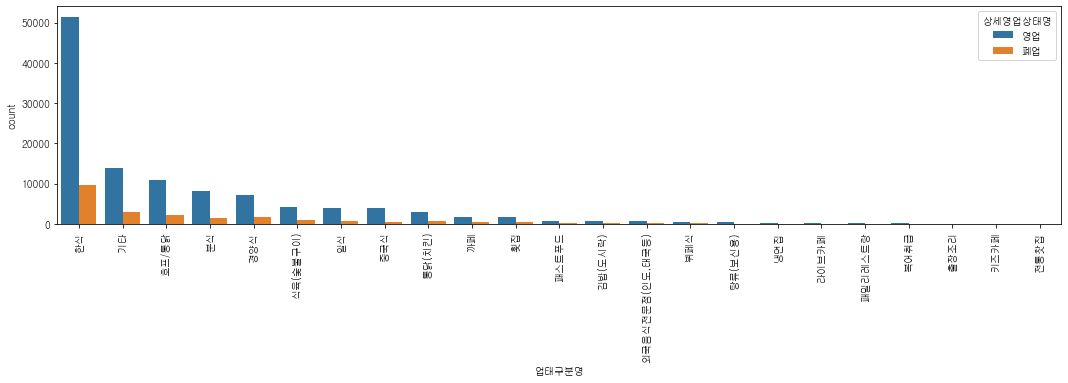

In [321]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_before, x='업태구분명', hue='상세영업상태명',
             order=df_seoul_before.groupby(['업태구분명'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

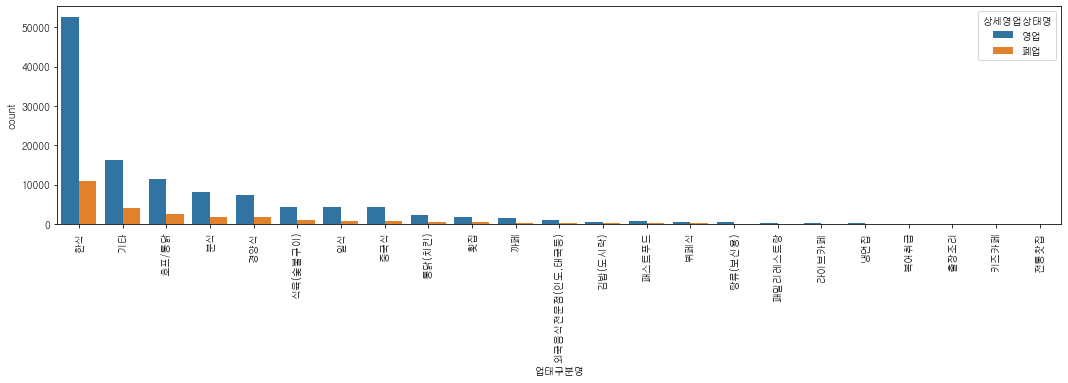

In [322]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_after, x='업태구분명', hue='상세영업상태명',
             order=df_seoul_after.groupby(['업태구분명'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

In [546]:
temp = pd.concat([pd.pivot_table(df_seoul_after,
                          index='업태구분명',
                          values='OC').sort_values('OC', ascending=False).round(3).rename({'OC':'after'}, axis=1),
           pd.pivot_table(df_seoul_before2,
                          index='업태구분명',
                          values='OC').sort_values('OC', ascending=False).round(3).rename({'OC':'before'}, axis=1),
           pd.pivot_table(df_seoul_before,
                          index='업태구분명',
                          values='OC').sort_values('OC', ascending=False).round(3).rename({'OC':'before2'}, axis=1)], axis=1)
temp

after  before  before2
업태구분명                                  
뷔페식              0.243   0.178    0.187
전통찻집             0.238   0.234    0.304
키즈카페             0.228   0.050    0.133
라이브카페            0.221   0.112    0.090
김밥(도시락)          0.214   0.156    0.165
식육(숯불구이)         0.204   0.151    0.183
기타               0.200   0.145    0.171
외국음식전문점(인도,태국등)  0.194   0.090    0.152
횟집               0.190   0.141    0.199
복어취급             0.186   0.102    0.137
호프/통닭            0.184   0.157    0.171
경양식              0.184   0.149    0.184
분식               0.178   0.146    0.161
패스트푸드            0.175   0.194    0.210
출장조리             0.175   0.114    0.198
통닭(치킨)           0.175   0.192    0.187
패밀리레스트랑          0.174   0.079    0.086
한식               0.170   0.130    0.159
까페               0.164   0.193    0.204
탕류(보신용)          0.163   0.174    0.140
일식               0.160   0.124    0.139
중국식              0.158   0.129    0.125
냉면집              0.155   0.038    0.069

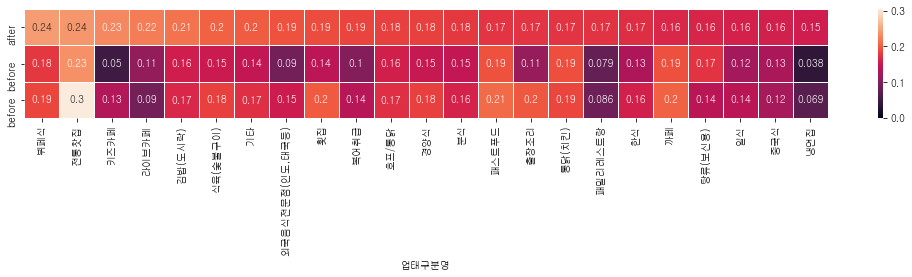

In [347]:
plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.show()

- 드라마틱하게 폐업률이 증가한 업종은 횟집, 키즈카페, 냉면집, 외국음식전문점, 뷔페 정도라고 할 수 있습니다.
- 폐업률이 감소한 업종은 패스트푸드, 카페, 치킨 정도입니다.

#### 서울특별시_지역별

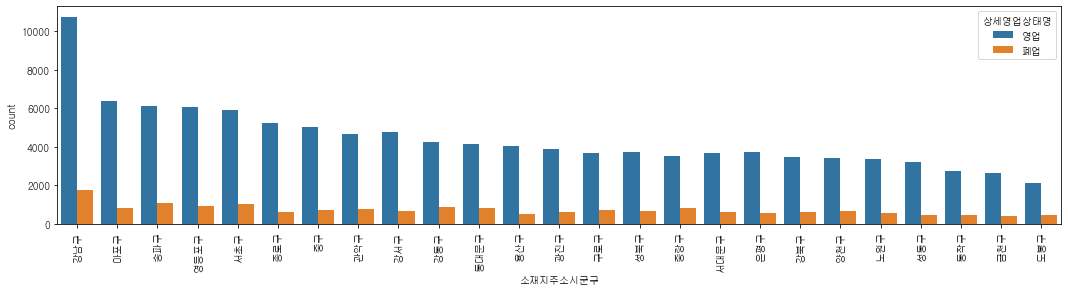

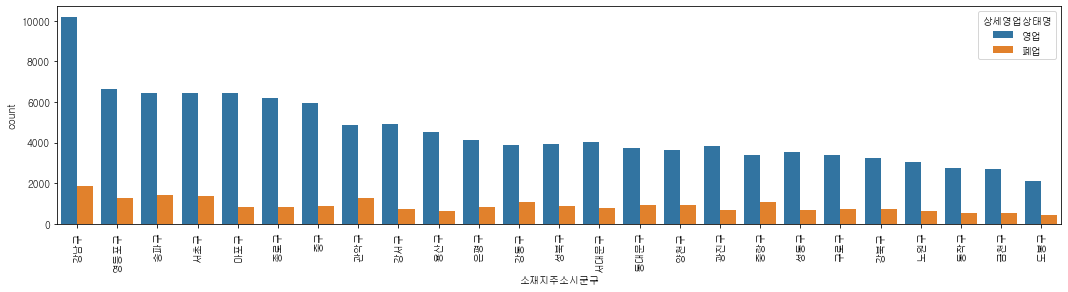

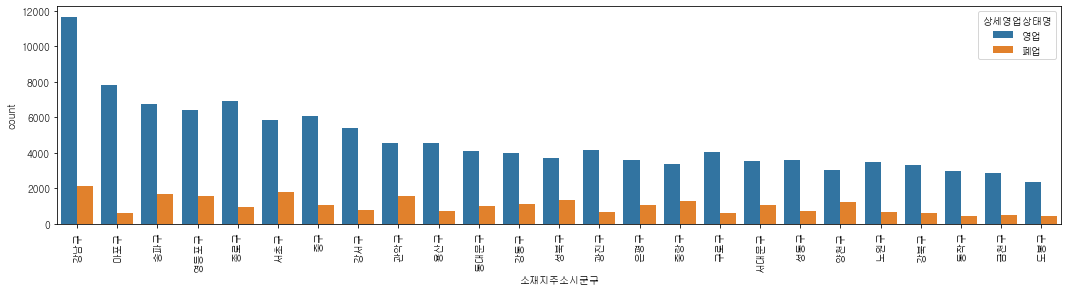

In [329]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_before2, x='소재지주소시군구', hue='상세영업상태명',
             order=df_seoul_before2.groupby(['소재지주소시군구'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_before, x='소재지주소시군구', hue='상세영업상태명',
             order=df_seoul_before.groupby(['소재지주소시군구'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_after, x='소재지주소시군구', hue='상세영업상태명',
             order=df_seoul_after.groupby(['소재지주소시군구'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.show()

In [348]:
temp2 = pd.concat([(pd.pivot_table(df_seoul_after, index='소재지주소시군구', values='OC')
                    .sort_values('OC', ascending=False)
                    .round(3)
                    .rename({'OC':'after'}, axis=1)),
                   
                   (pd.pivot_table(df_seoul_before, index='소재지주소시군구', values='OC')
                    .sort_values('OC', ascending=False)
                    .round(3)
                    .rename({'OC':'before'}, axis=1)),
                   
                   (pd.pivot_table(df_seoul_before2, index='소재지주소시군구', values='OC')
                    .sort_values('OC', ascending=False)
                    .round(3)
                    .rename({'OC':'before2'}, axis=1))], axis=1)
temp2.T

소재지주소시군구    양천구    중랑구    성북구    관악구    서초구   서대문구    은평구    강동구   영등포구  \
after     0.290  0.277  0.265  0.259  0.235  0.232  0.229  0.220  0.199   
before    0.202  0.236  0.179  0.208  0.174  0.160  0.169  0.215  0.160   
before2   0.161  0.187  0.157  0.141  0.149  0.146  0.130  0.167  0.135   

소재지주소시군구   동대문구    송파구    성동구    도봉구    노원구    강북구    강남구     중구    금천구  \
after     0.199  0.196  0.168  0.161  0.159  0.156  0.155  0.150  0.148   
before    0.196  0.183  0.166  0.166  0.167  0.180  0.156  0.128  0.169   
before2   0.168  0.151  0.130  0.170  0.144  0.152  0.142  0.123  0.139   

소재지주소시군구    용산구    구로구    광진구    동작구    강서구    종로구    마포구  
after     0.138  0.136  0.134  0.130  0.127  0.120  0.071  
before    0.125  0.176  0.150  0.161  0.133  0.118  0.114  
before2   0.110  0.165  0.133  0.150  0.124  0.102  0.116

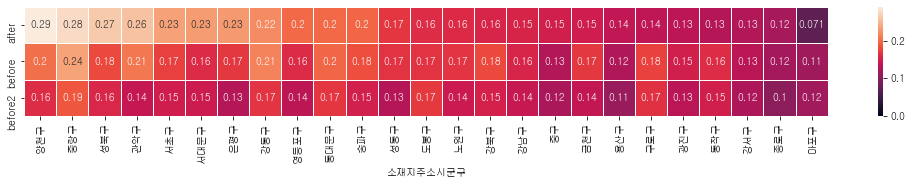

In [349]:
plt.figure(figsize=(18, 2))
sns.heatmap(temp2.T, annot=True, linewidths=.5, vmin=0)
plt.show()

- 드라마틱하게 폐업률이 증가한 지역은 중랑구, 양천구, 성북구, 서초구, 서대문구, 관악구, 은평구
- 폐업률이 오히려 감소한 지역은 구로구, 동작구, 마포구

##### 중랑구, 양천구, 서초구

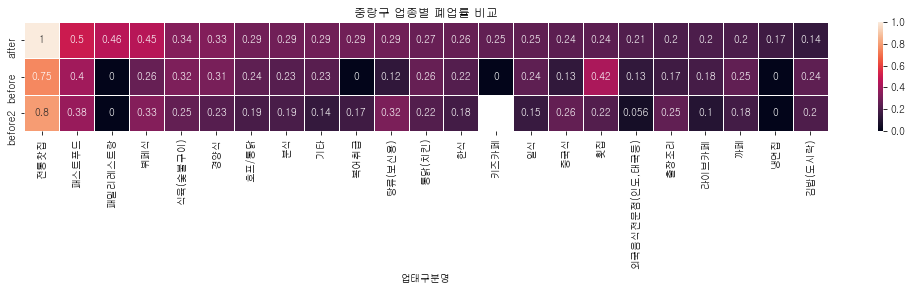

In [350]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '중랑구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '중랑구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '중랑구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('중랑구 업종별 폐업률 비교')
plt.show()

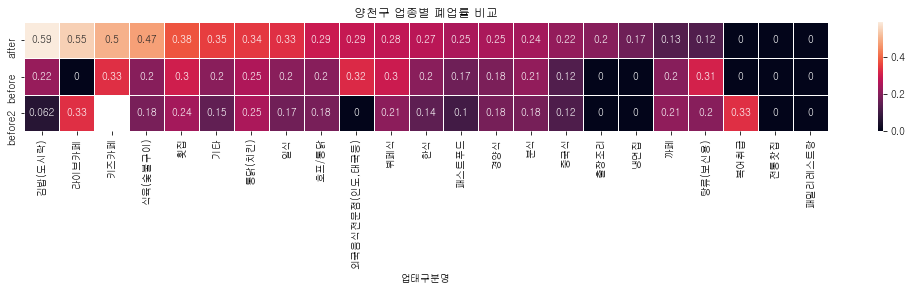

In [351]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '양천구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '양천구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '양천구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('양천구 업종별 폐업률 비교')
plt.show()

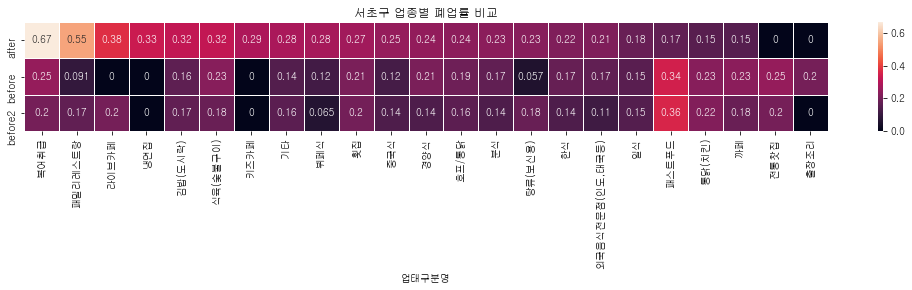

In [353]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '서초구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '서초구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '서초구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('서초구 업종별 폐업률 비교')
plt.show()

##### 구로구, 동작구, 마포구

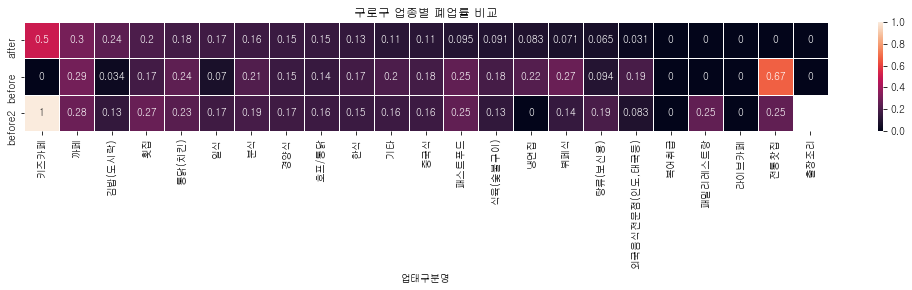

In [354]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '구로구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '구로구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '구로구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('구로구 업종별 폐업률 비교')
plt.show()

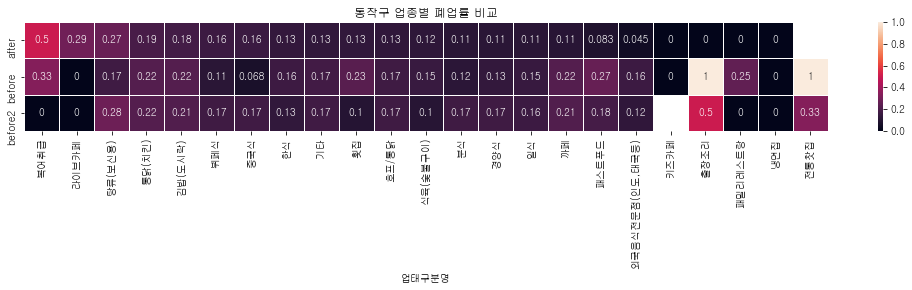

In [355]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '동작구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '동작구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '동작구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('동작구 업종별 폐업률 비교')
plt.show()

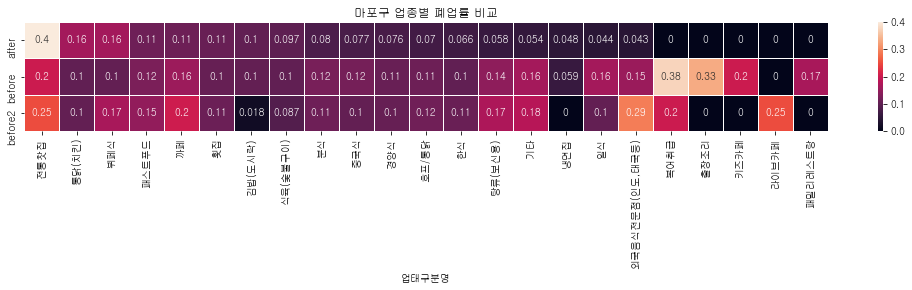

In [356]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '마포구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '마포구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '마포구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('마포구 업종별 폐업률 비교')
plt.show()

### ★지역별, 업종별 경쟁업체수

- 경쟁업체수는 절대적 수치보다는 인구대비 점포수로 비교하는 게 더 정확합니다.
- 따라서 해당 지역의 인구 데이터가 필요합니다.
- 인구 데이터는 통계청 KOSIS 국가통계포털에서 구했습니다.
- https://kosis.kr/index/index.do

In [698]:
temp = (
    df_seoul_after
    .loc[df_seoul_after.상세영업상태명 == '영업']
    .groupby(['소재지주소시군구', '소재지주소읍면동', '업태구분명', '상세영업상태명'])['관리번호']
    .count()
    .reset_index()
)

In [699]:
temp.head()

소재지주소시군구 소재지주소읍면동    업태구분명 상세영업상태명  관리번호
0      강남구      개포동      경양식      영업    25
1      강남구      개포동       기타      영업    42
2      강남구      개포동  김밥(도시락)      영업     2
3      강남구      개포동       까페      영업     4
4      강남구      개포동       분식      영업    28

In [701]:
temp.groupby(['소재지주소시군구', '업태구분명'])['관리번호'].sum().reset_index()

소재지주소시군구    업태구분명  관리번호
0        강남구      경양식   729
1        강남구       기타  1503
2        강남구  김밥(도시락)    57
3        강남구       까페    98
4        강남구      냉면집    20
..       ...      ...   ...
560      중랑구  패밀리레스트랑     6
561      중랑구    패스트푸드     7
562      중랑구       한식  1446
563      중랑구    호프/통닭   315
564      중랑구       횟집    41

[565 rows x 3 columns]

# WAREHOUSE